In [1]:
import analyzer.plotting
import peakquality as pq
import pickle
import analyzer
from analyzer.datasets import SampleManager
from analyzer.core import AnalysisResult
import numpy as np
import matplotlib.pyplot as plt
from analyzer.plotting import PlotObject, drawAs1DHist, drawAs2DHist
from hist import Hist

In [2]:
SIGNAL_NAMES = ['signal_312_1000_400',
                'signal_312_1000_600',
                'signal_312_1000_700',
                'signal_312_1000_800',
                'signal_312_1000_900',
                'signal_312_1200_400',
                'signal_312_1200_600',
                'signal_312_1200_700',
                'signal_312_1200_800',
                'signal_312_1200_900',
                'signal_312_1200_1000',
                'signal_312_1200_1100',
                'signal_312_1300_400',
                'signal_312_1300_600',
                'signal_312_1300_1200',
                'signal_312_1400_400',
                'signal_312_1400_600',
                'signal_312_1400_1300',
                'signal_312_1500_400',
                'signal_312_1500_600',
                'signal_312_1500_900',
                'signal_312_1500_1000',
                'signal_312_1500_1100',
                'signal_312_1500_1200',
                'signal_312_1500_1300',
                'signal_312_1500_1350',
                'signal_312_1500_1400',
                'signal_312_1500_1450',
                'signal_312_2000_400',
                'signal_312_2000_600',
                'signal_312_2000_900',
                'signal_312_2000_1200',
                'signal_312_2000_1300',
                'signal_312_2000_1400',
                'signal_312_2000_1500',
                'signal_312_2000_1600',
                'signal_312_2000_1700',
                'signal_312_2000_1900']

In [3]:
s = SampleManager()
s.loadSamplesFromDirectory("datasets/")

In [4]:
a = AnalysisResult.fromFile("output_signal.pkl")
a_background = AnalysisResult.fromFile("output_background.pkl")
# hists = a.getMergedHistograms(s)
bg_hists = a_background.getMergedHistograms(s)

In [5]:
background_style = s.getCollection("Skim_QCDInclusive2018").style
window_width = 300

In [6]:
m13_m_points = []
m24_m_points = []
m3_top_3_no_lead_b_points = []
m14_m_points = []

/srv/peakquality.py:21: RuntimeWarning: invalid value encountered in divide
  s_over_root_b_points = np.nan_to_num(signal_data/sqrt_b)
/tmp/ipykernel_2149775/1323949779.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


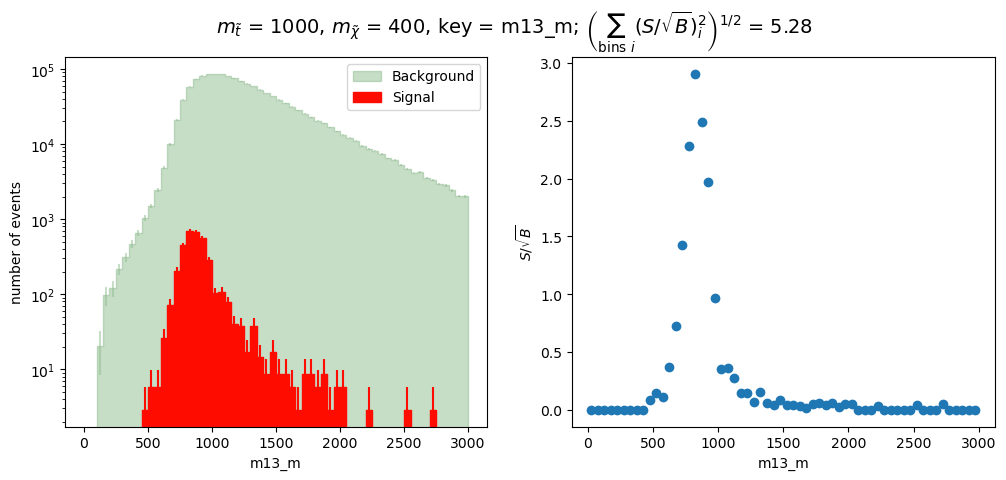

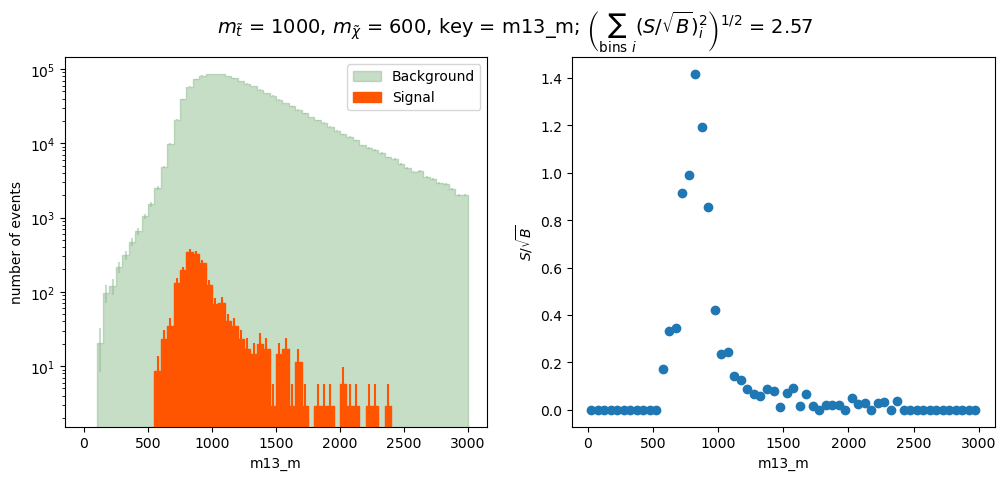

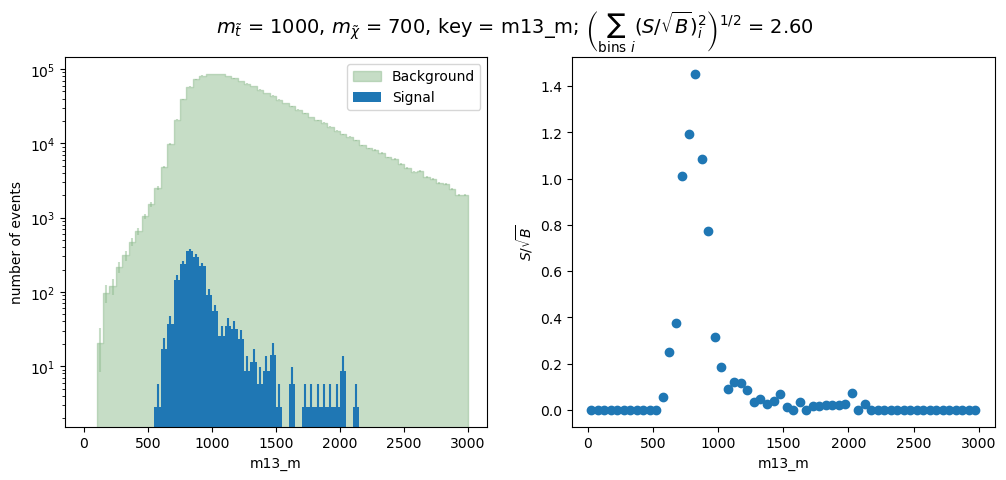

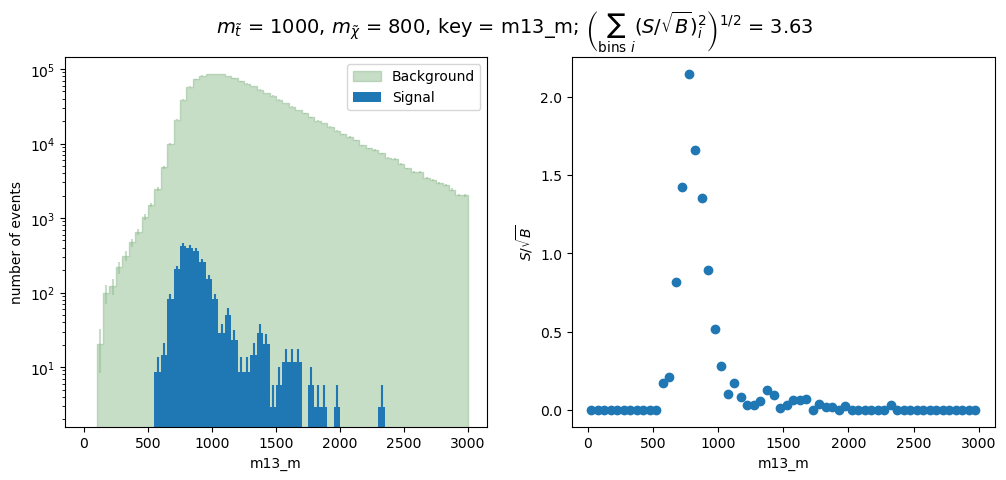

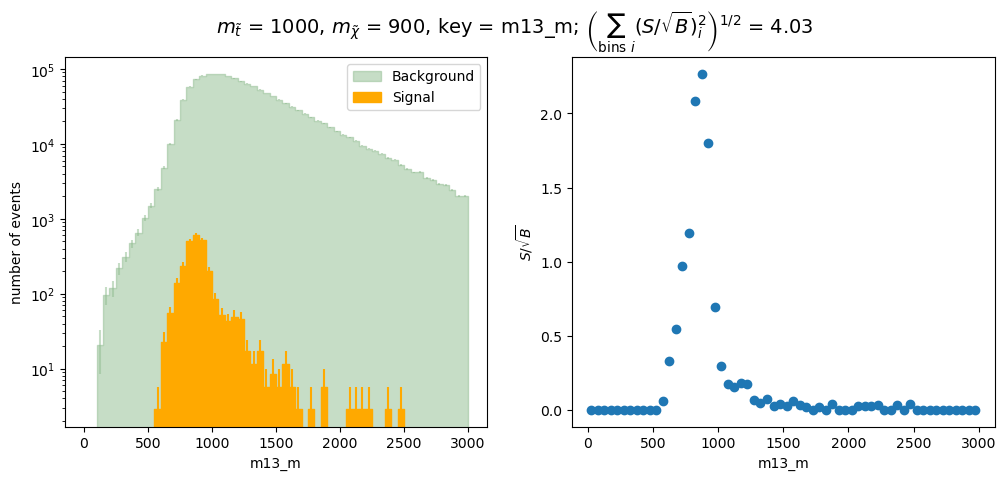

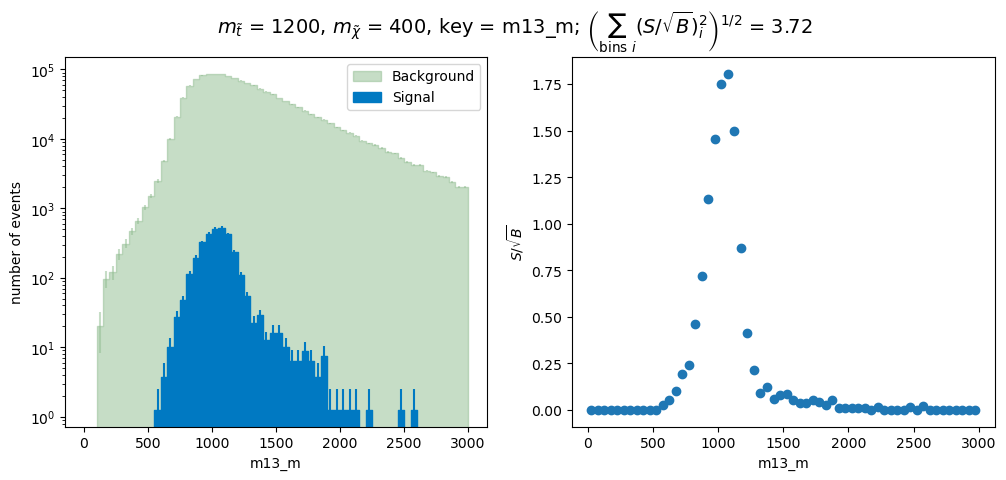

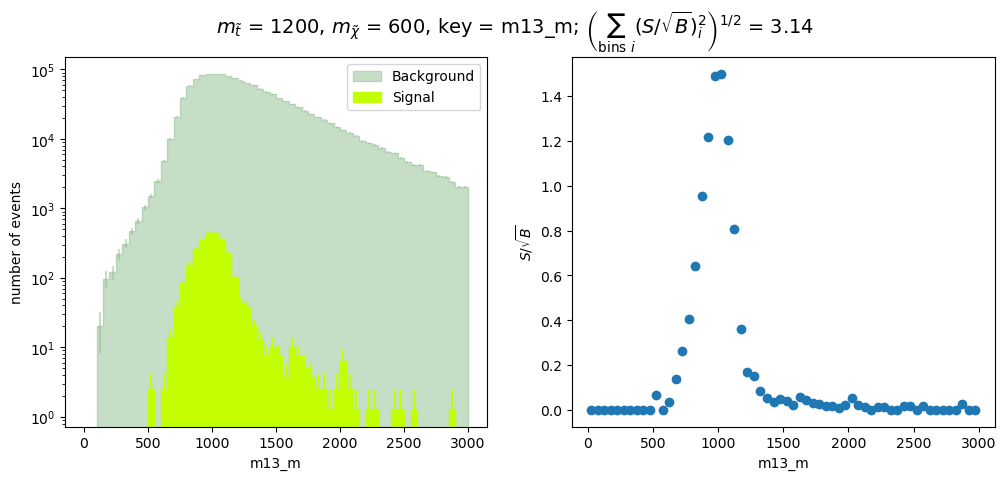

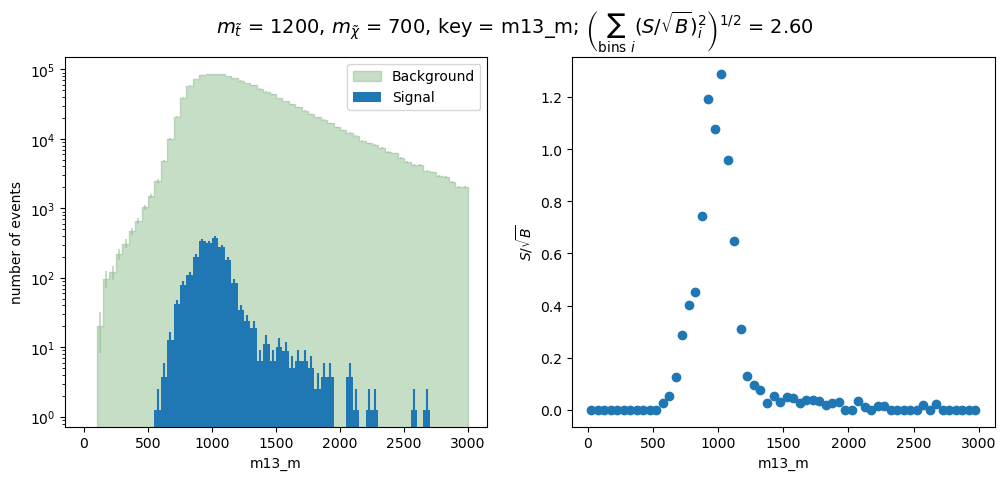

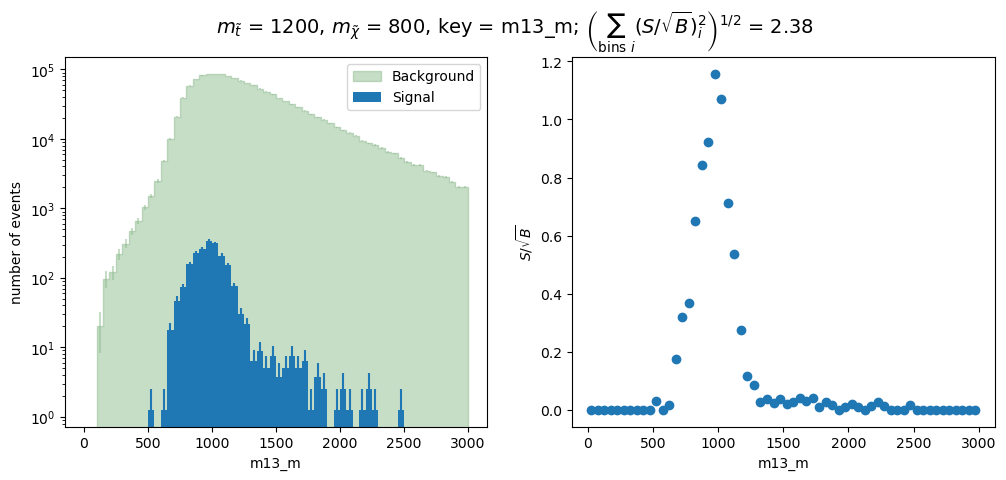

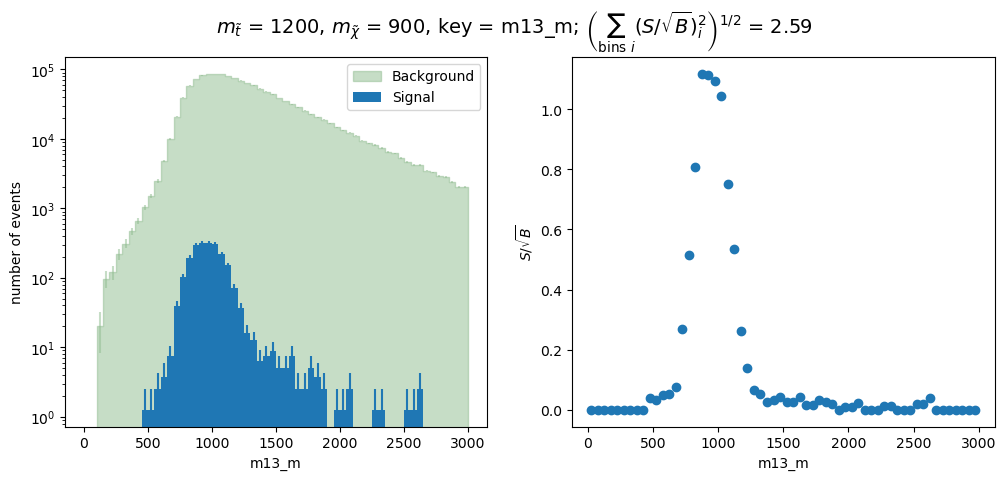

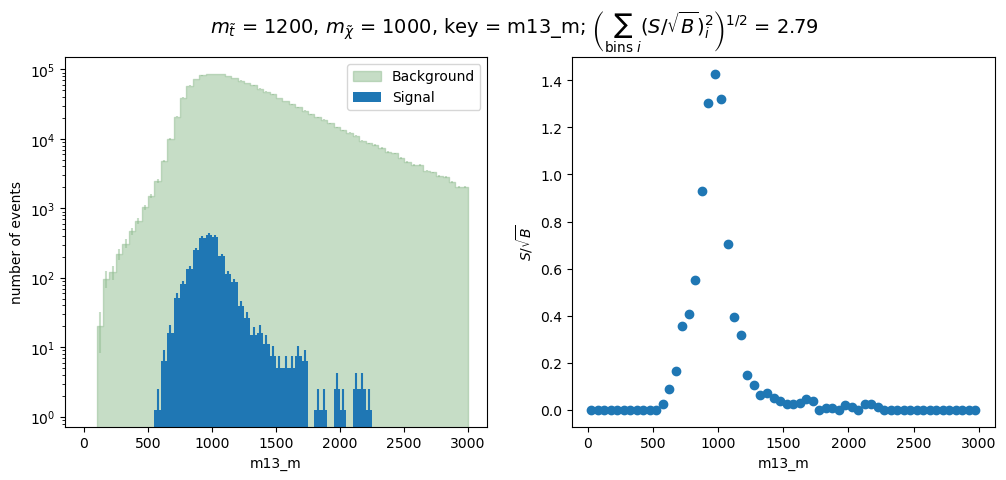

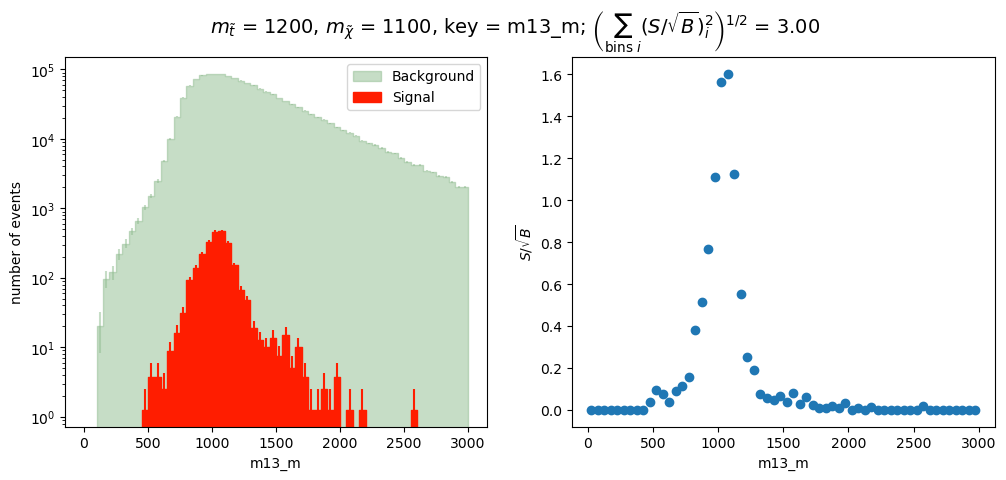

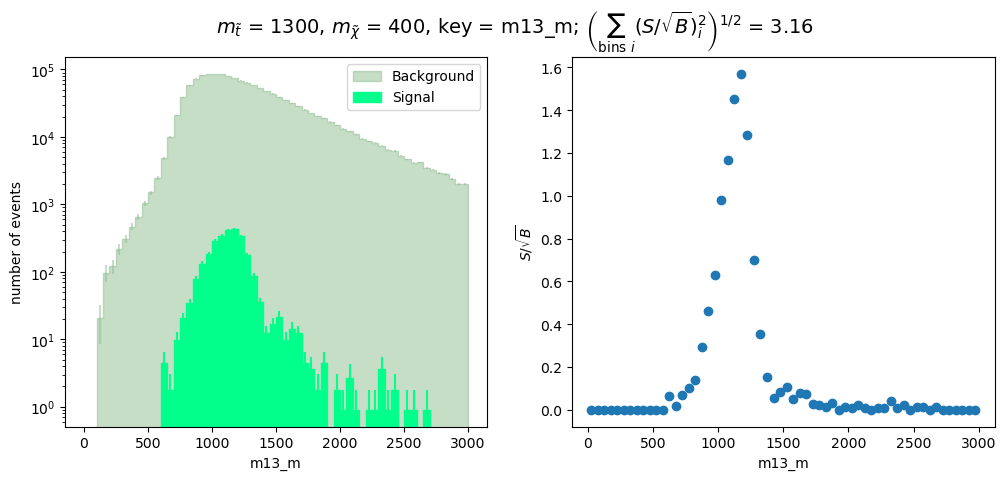

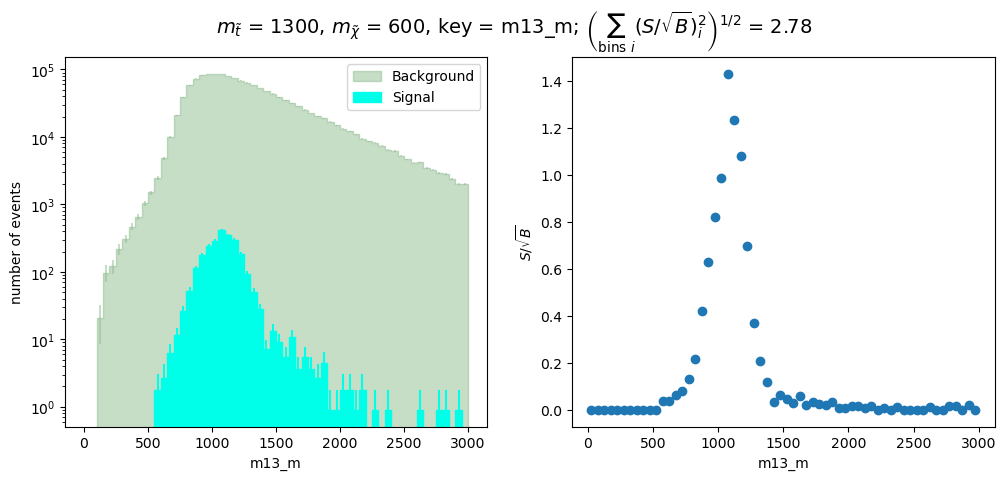

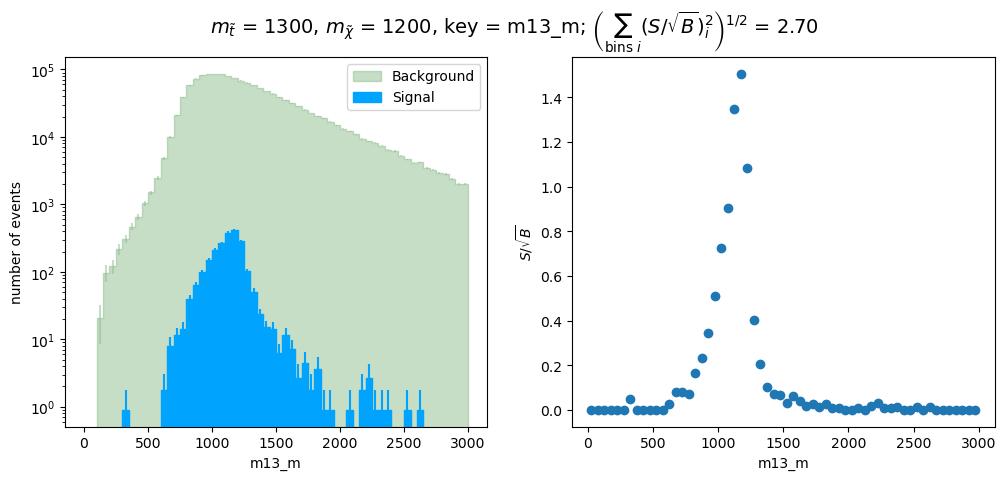

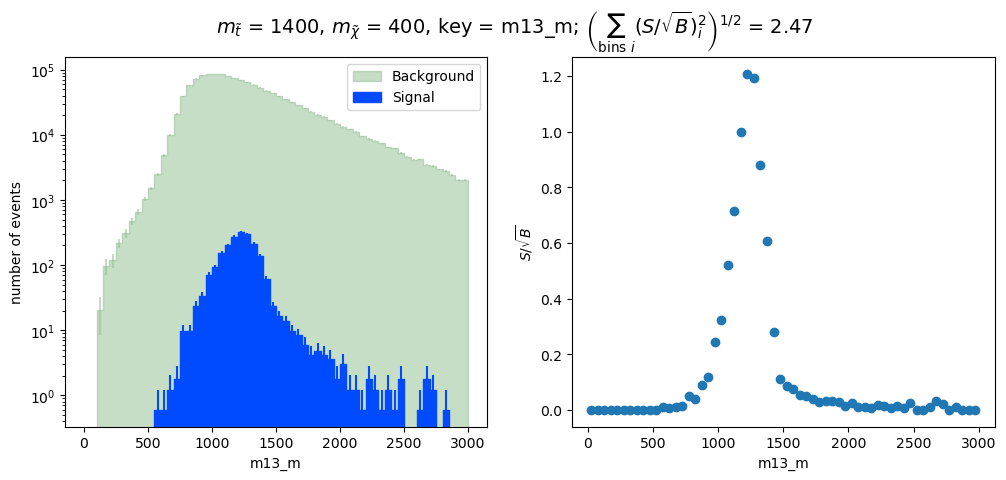

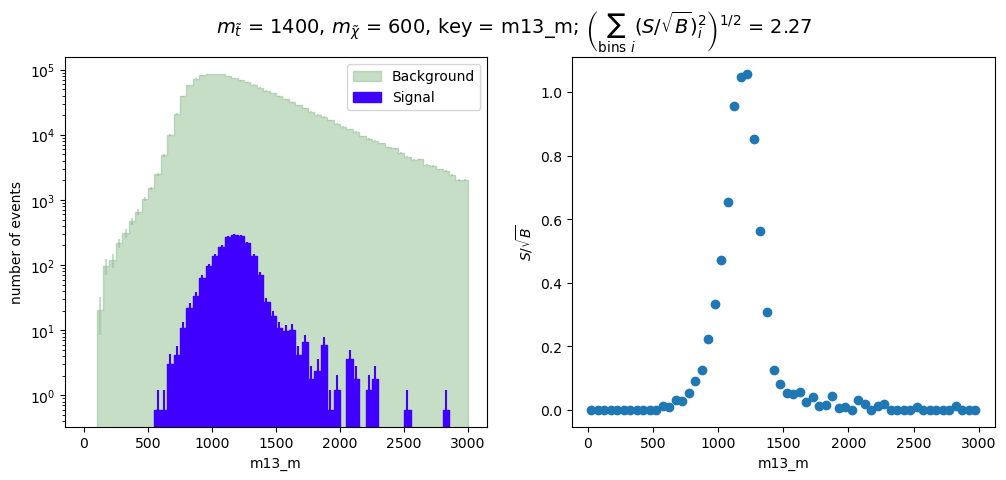

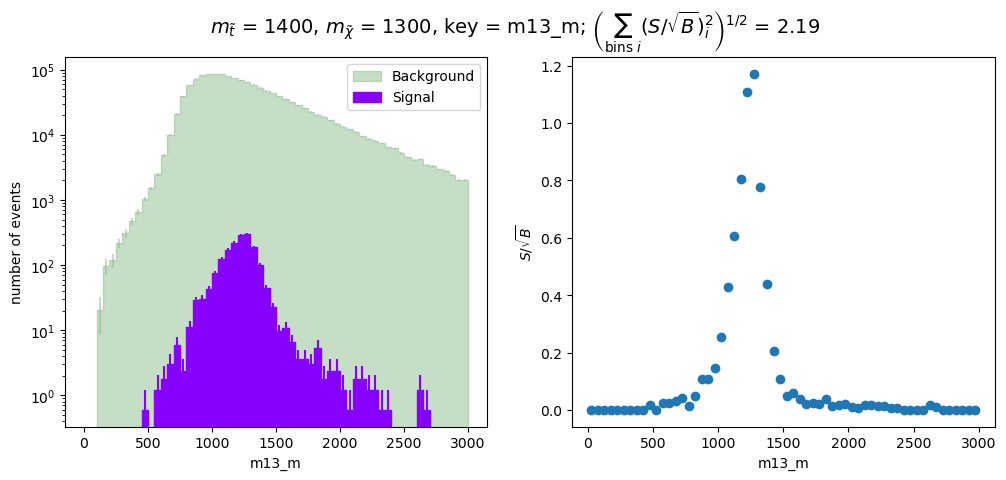

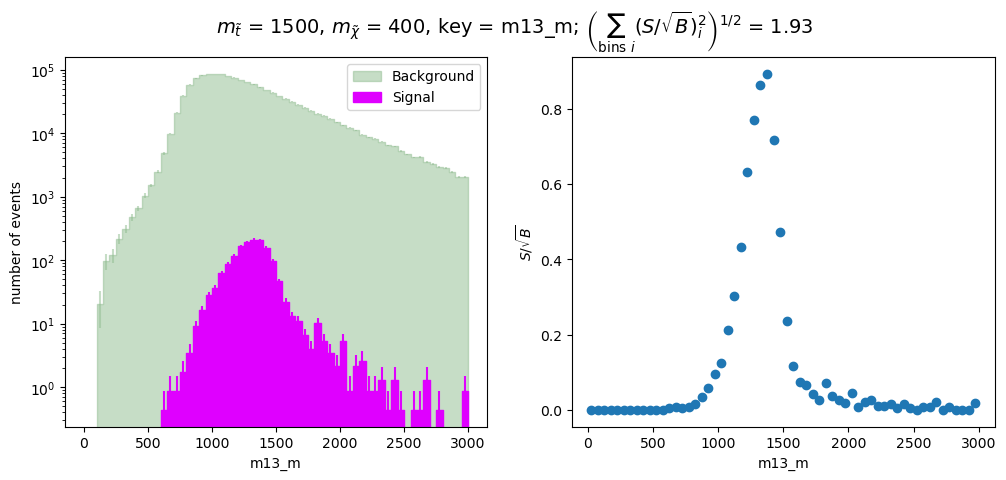

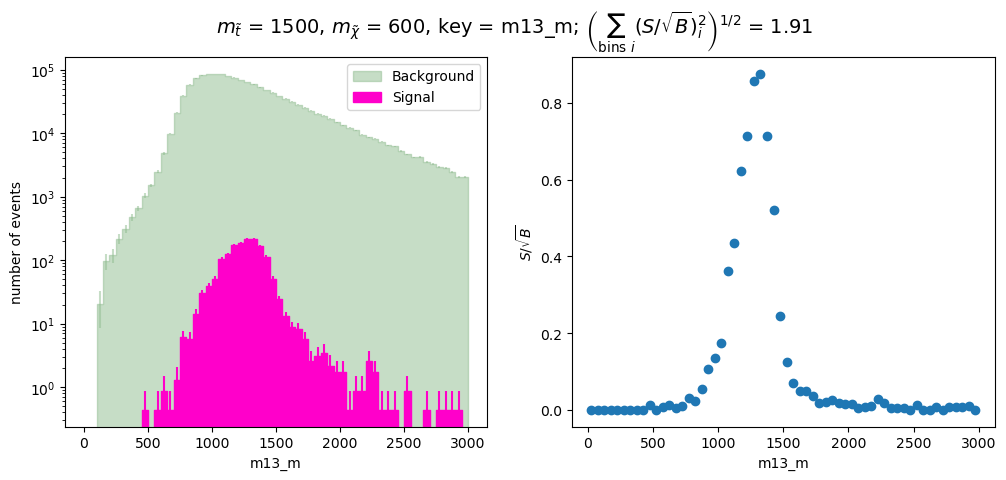

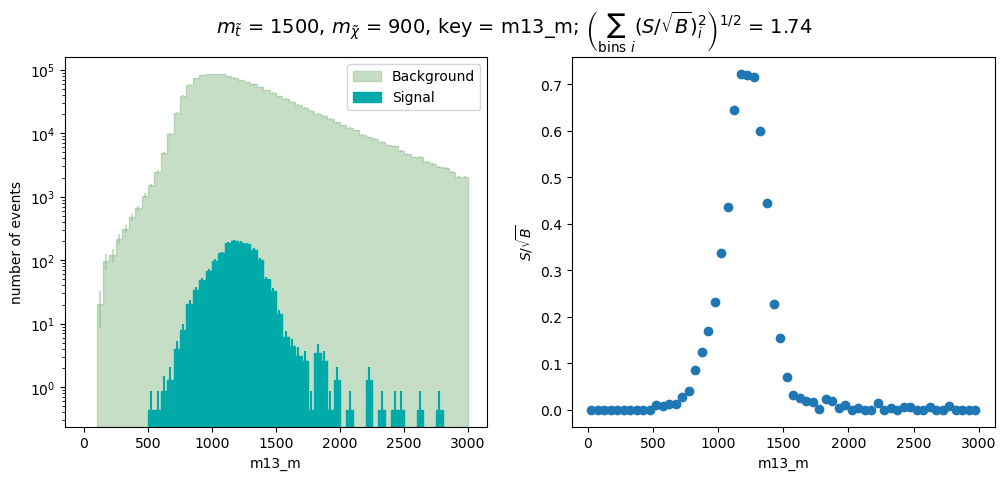

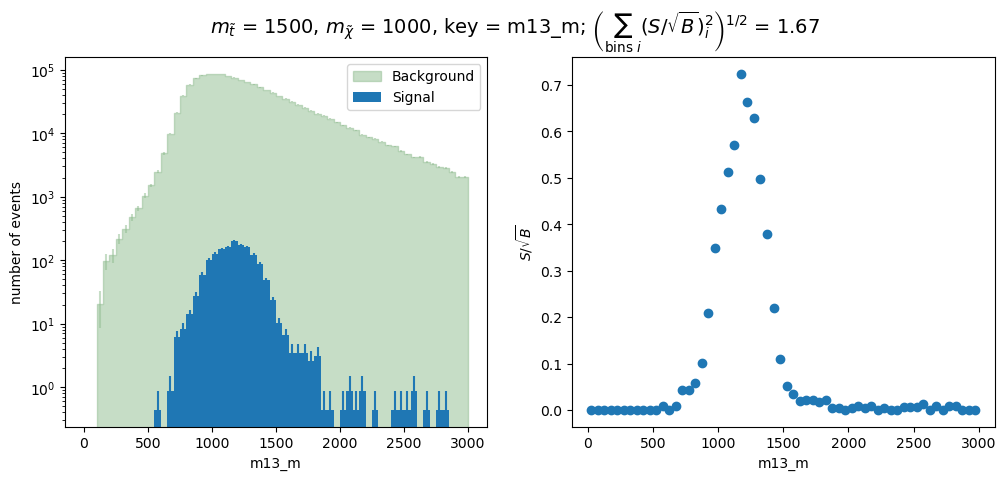

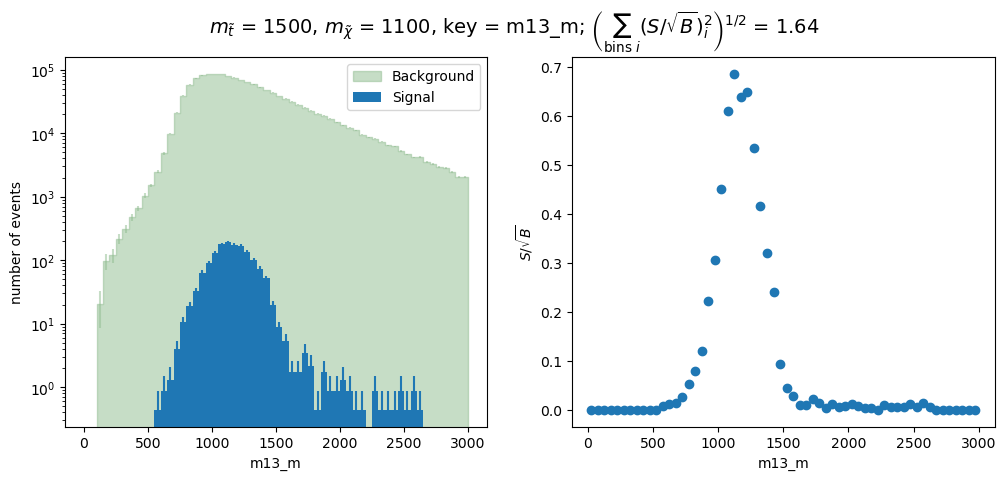

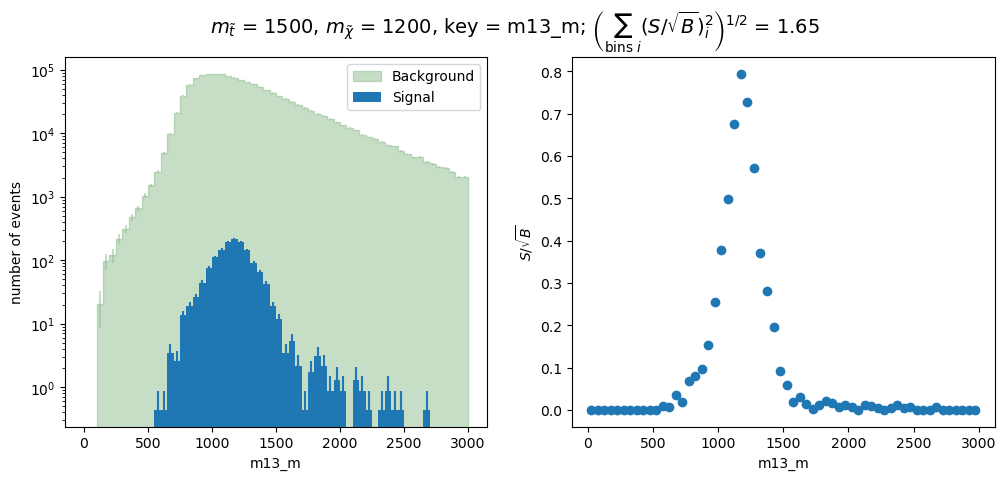

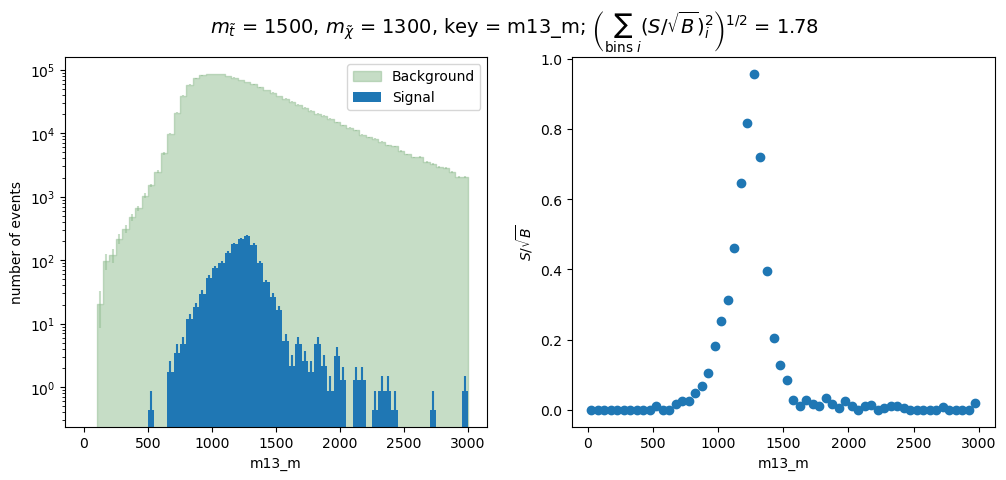

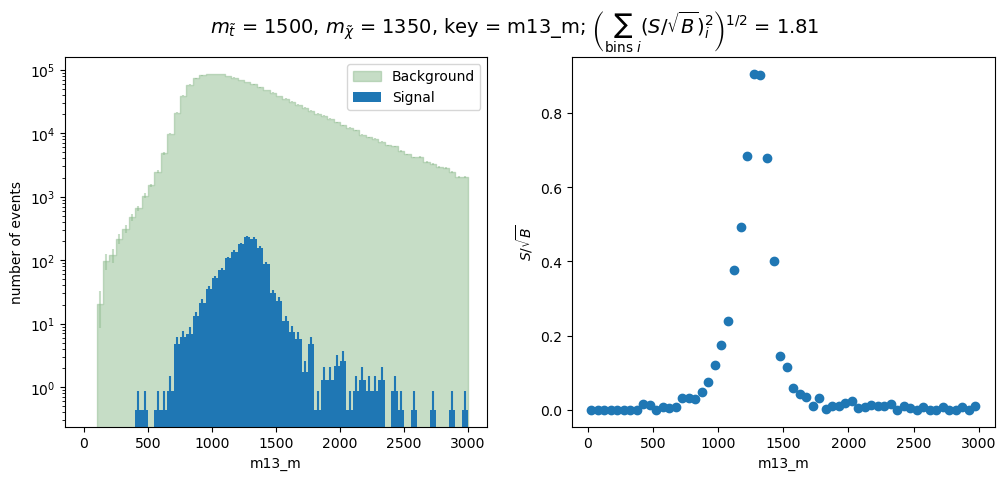

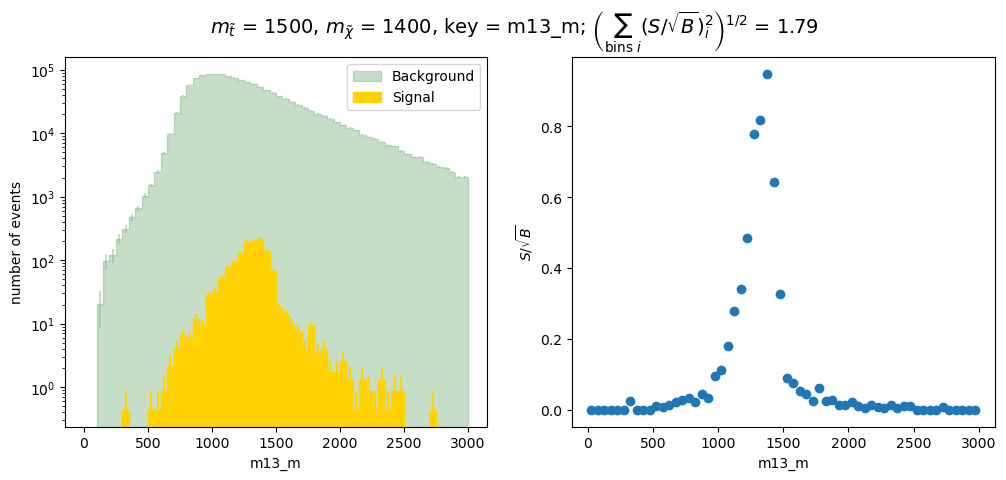

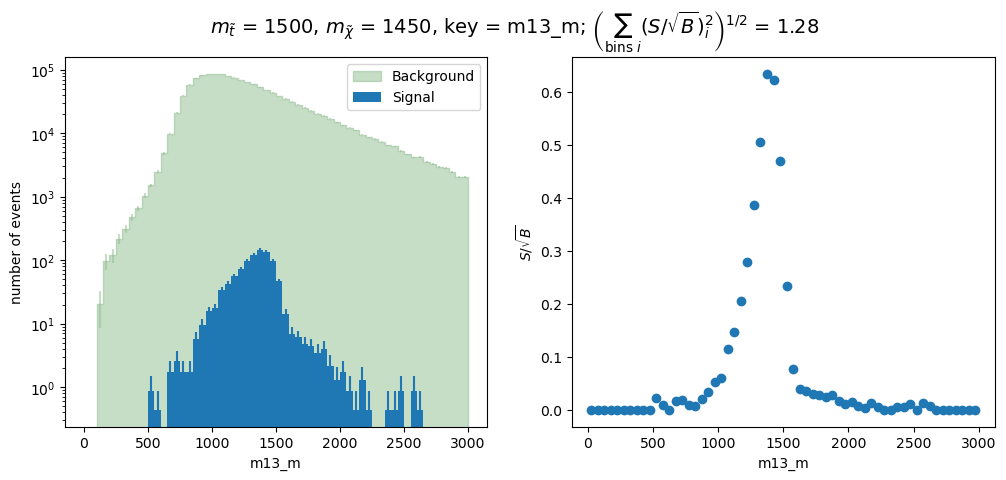

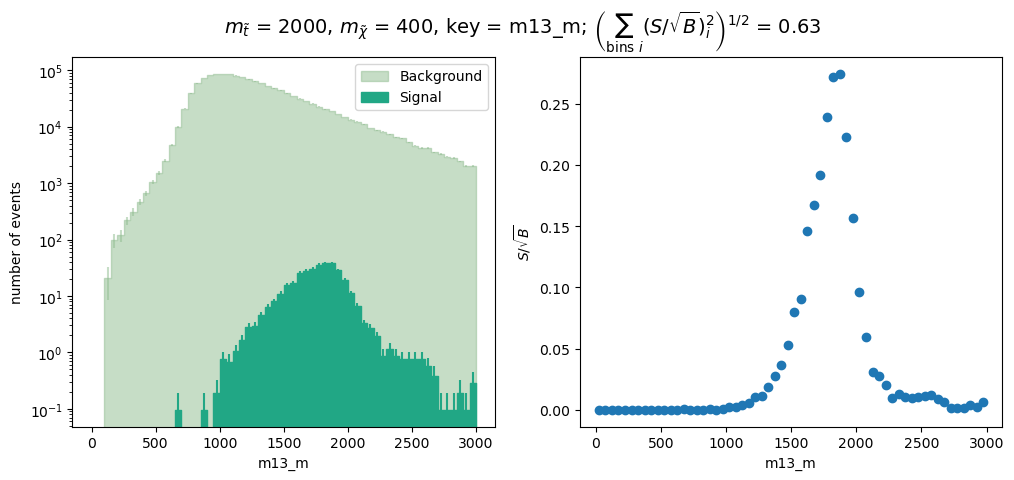

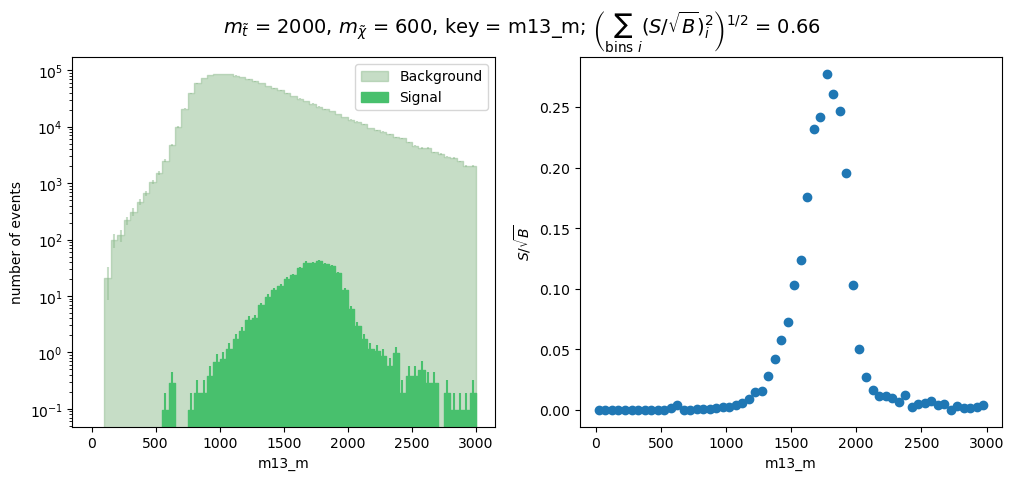

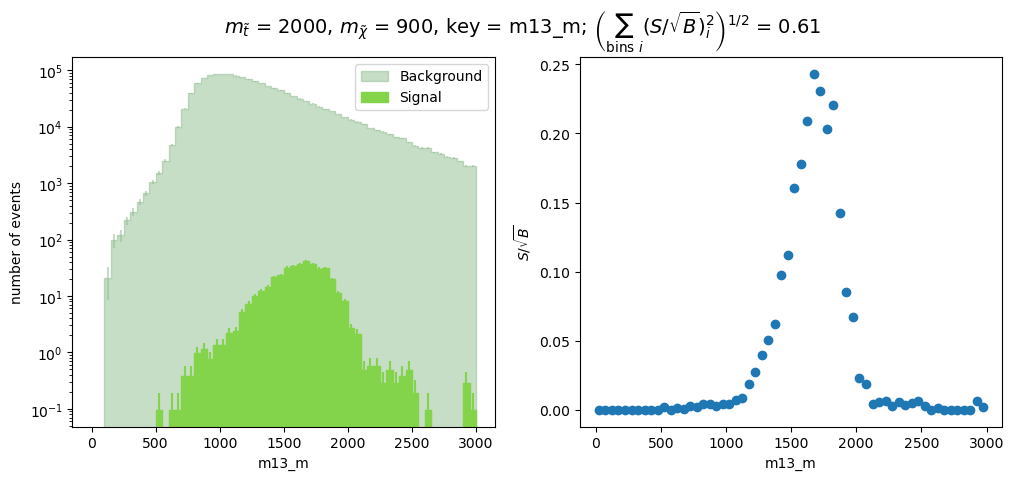

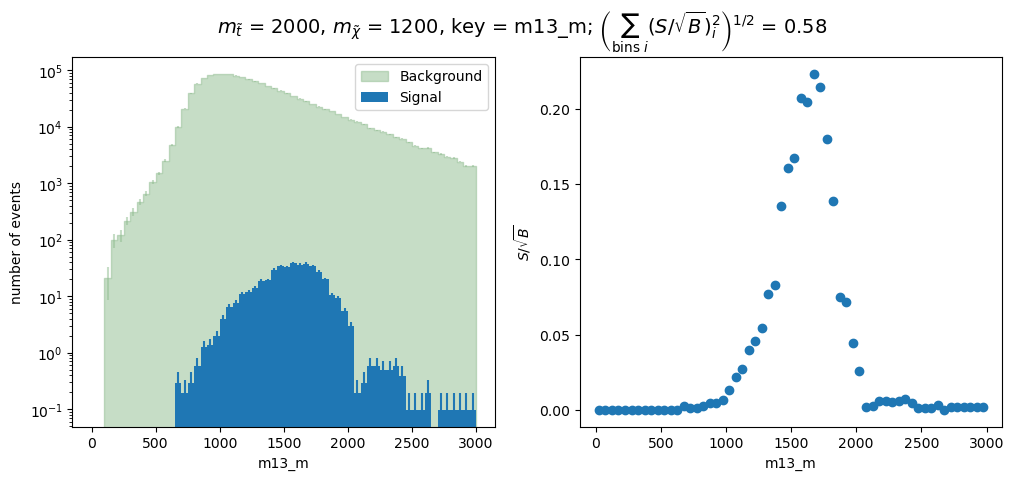

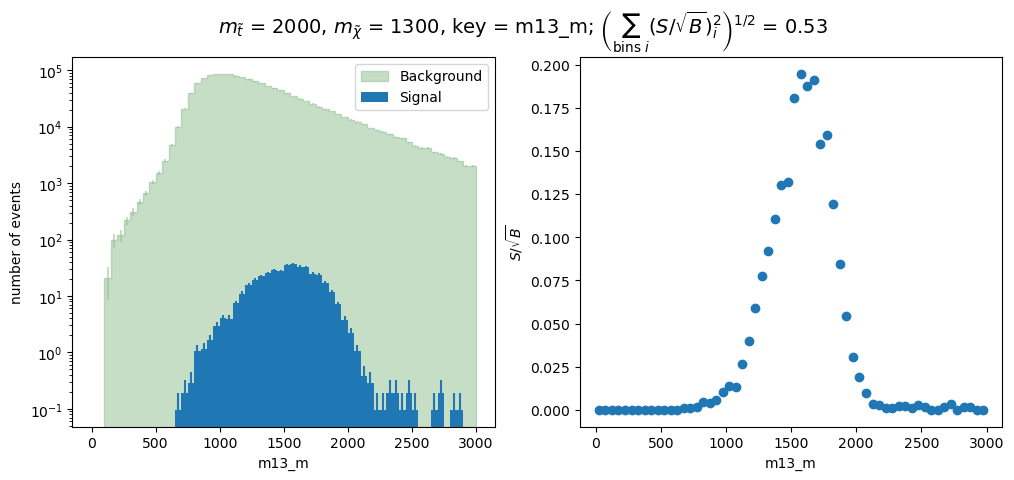

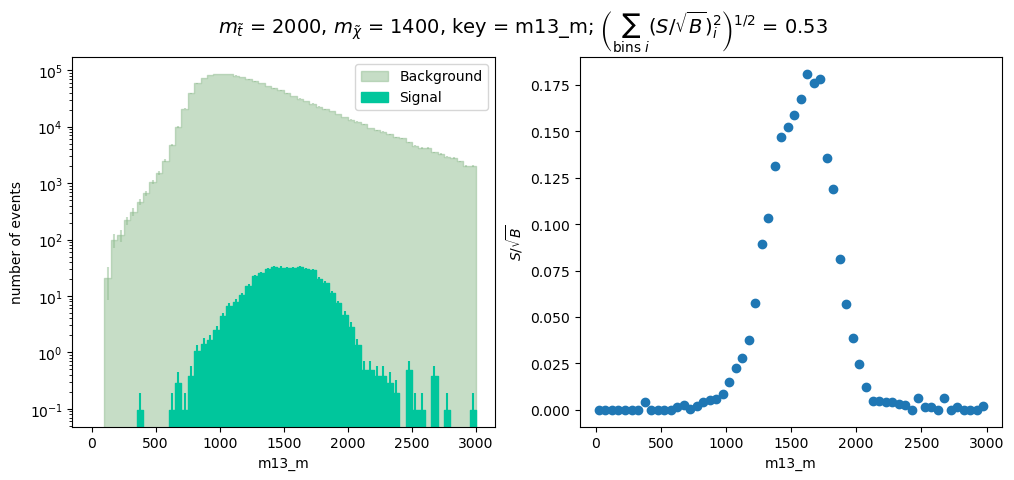

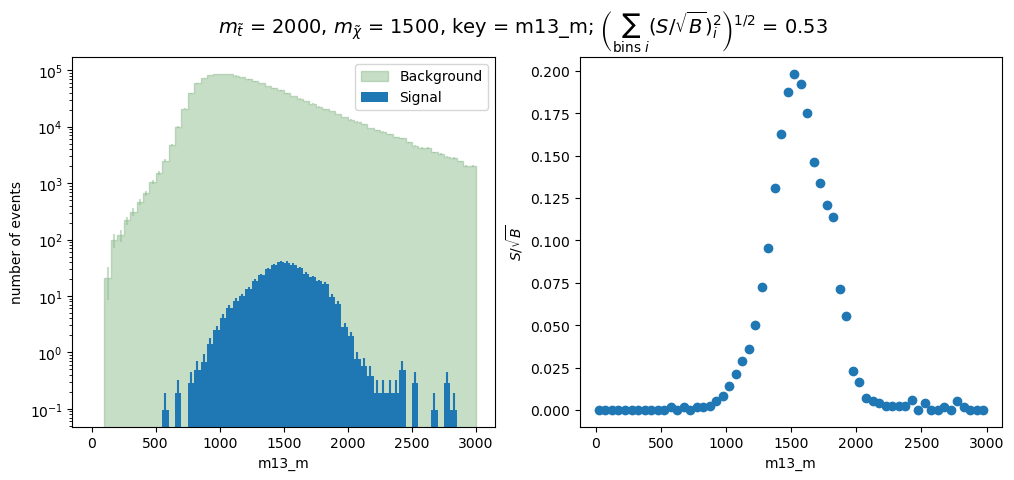

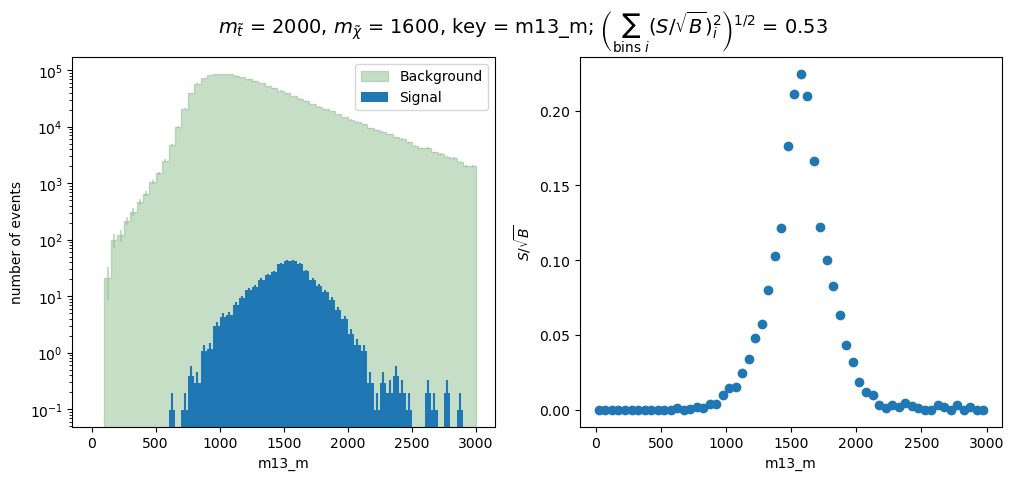

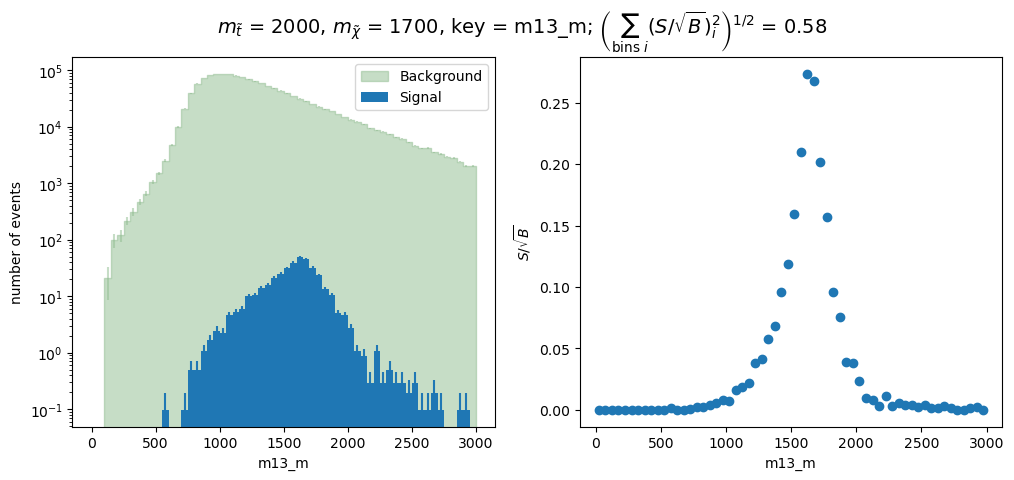

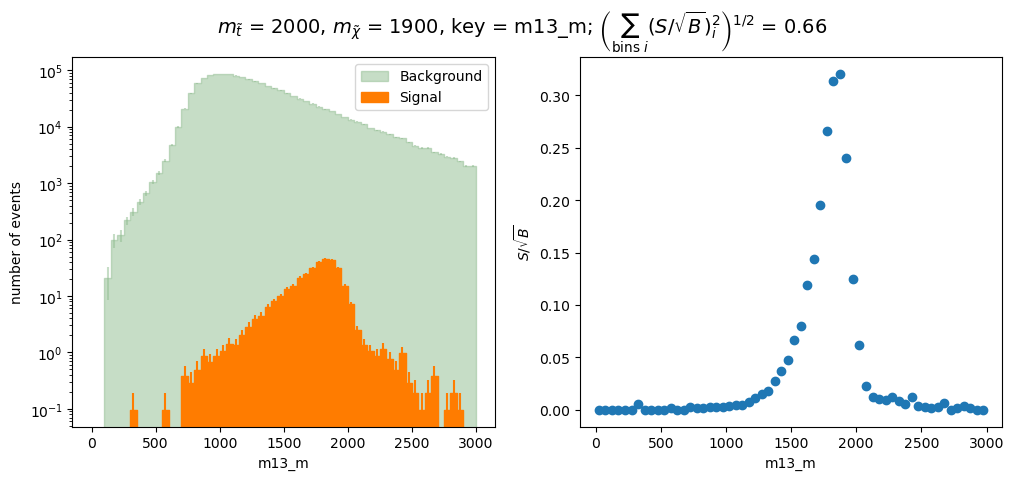

In [8]:
xvar = 'm13_m'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi)

    m13_m_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\left(\sum_{{\\text{{bins }} i}} (S/\sqrt{{B}})_i^2\\right)^{{1/2}}$ = {s_over_root_b:.2f}", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    # ax[0].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, 10000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    # ax[1].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    # ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")

/tmp/ipykernel_2140116/3315977719.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


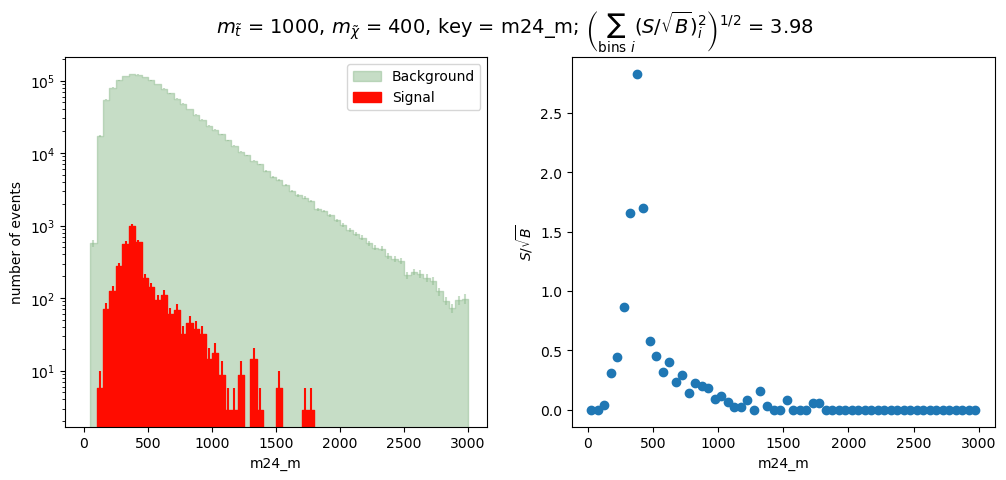

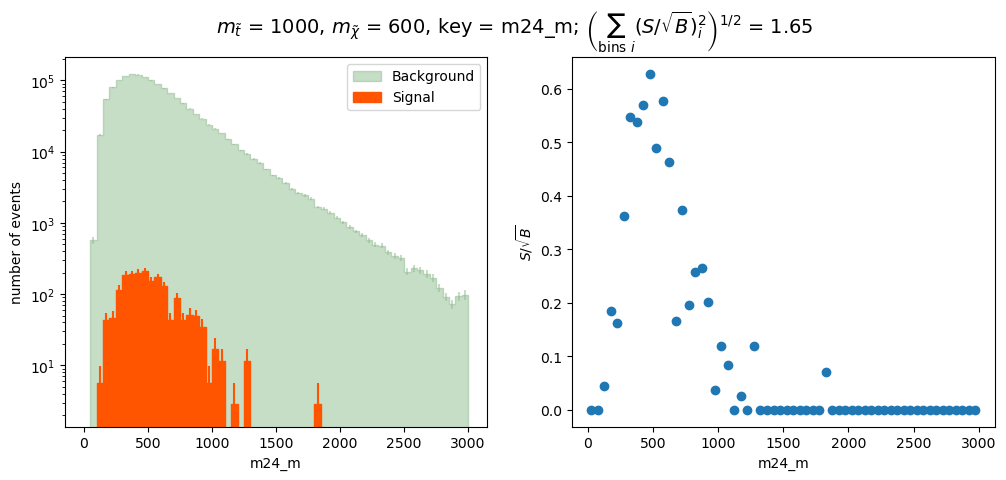

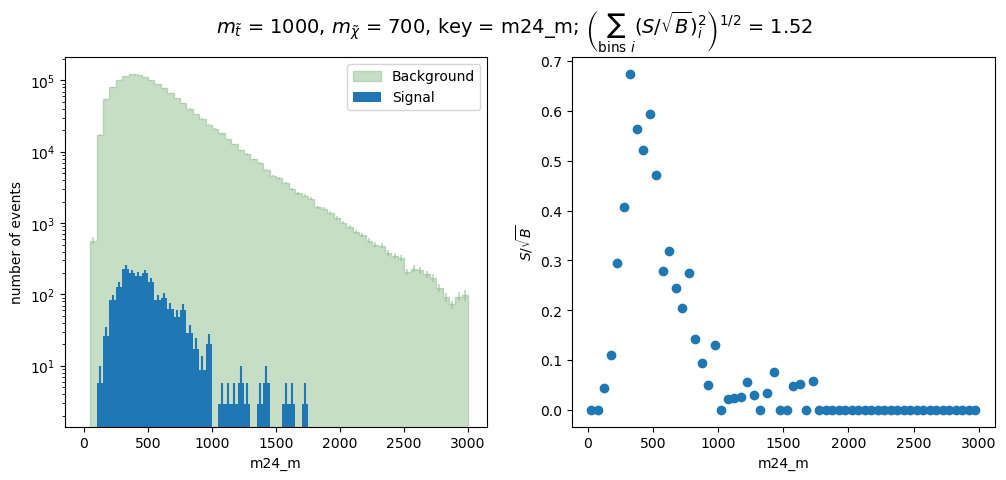

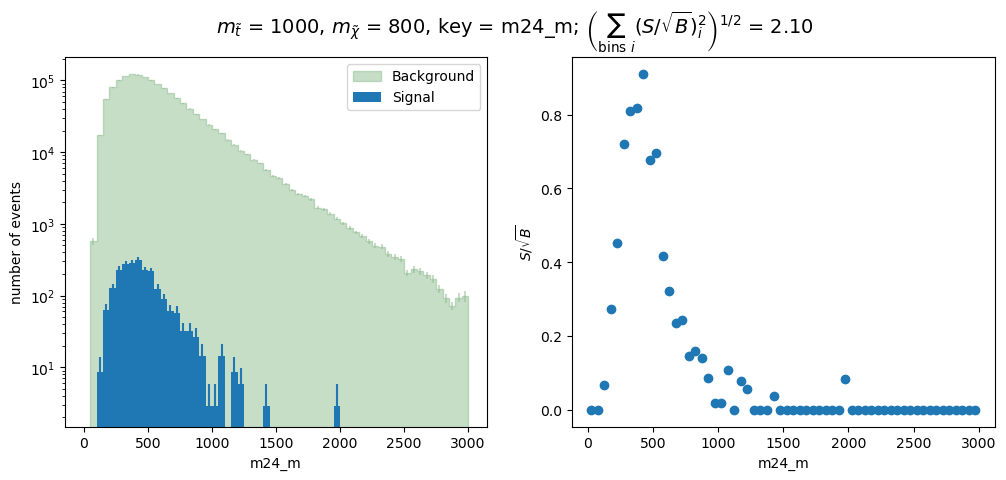

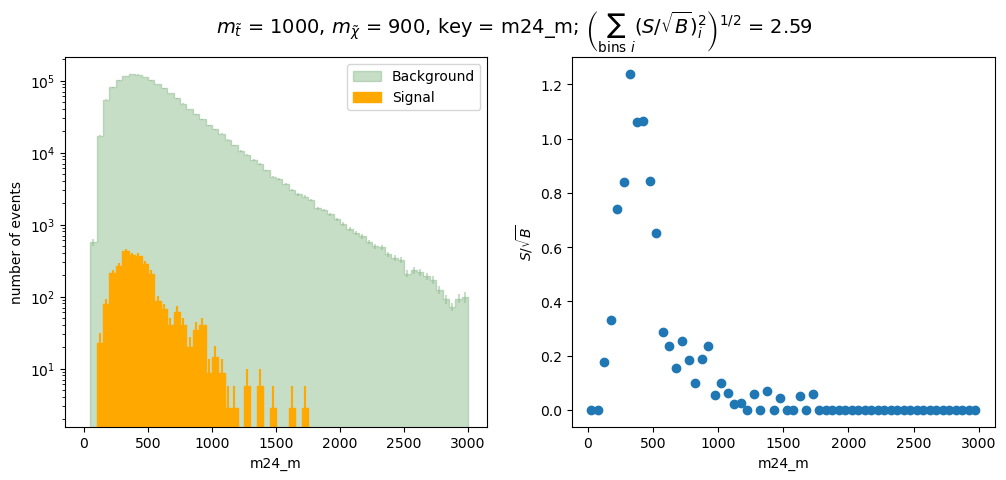

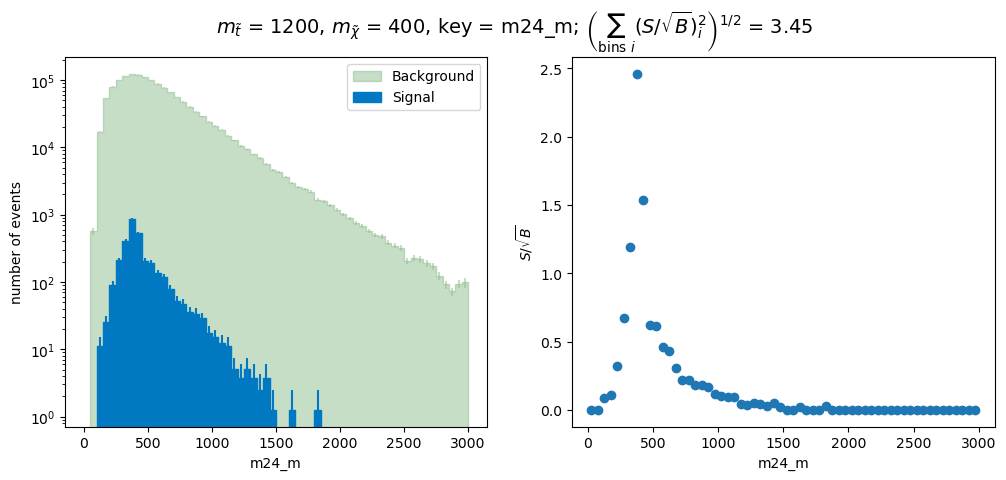

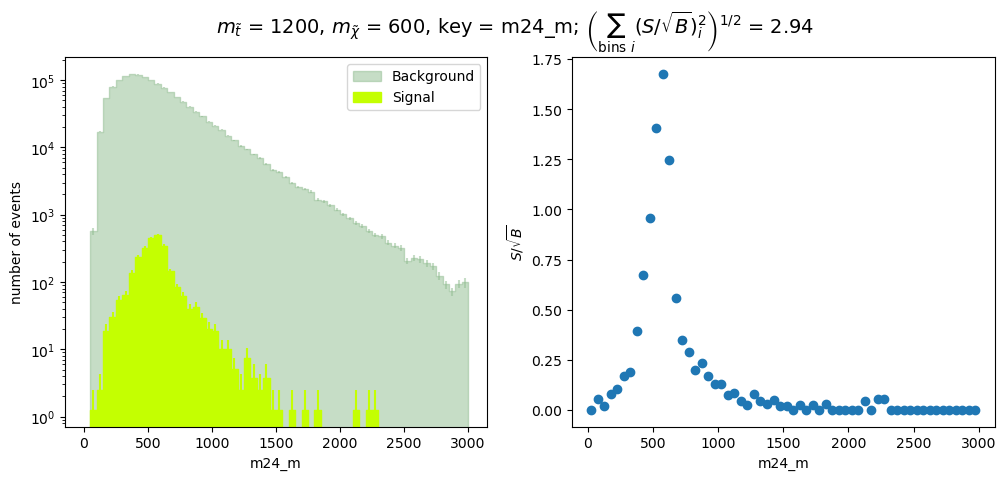

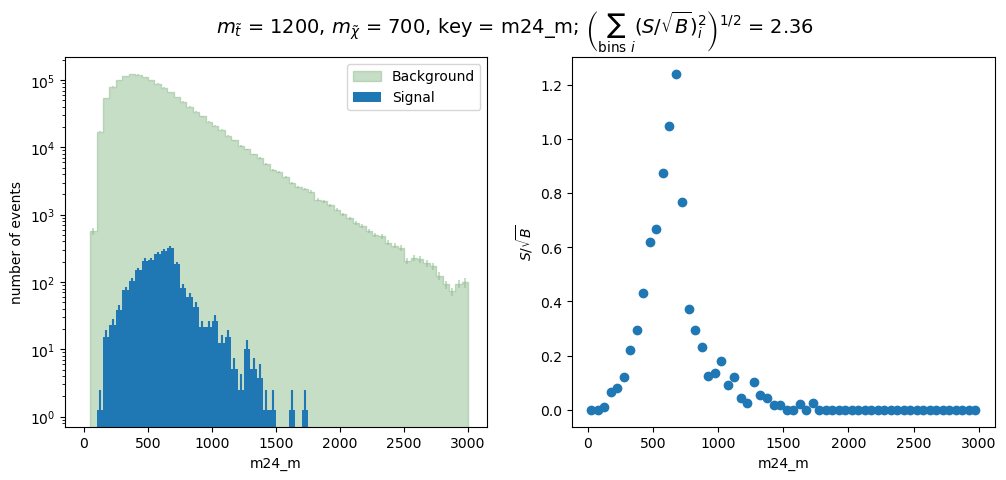

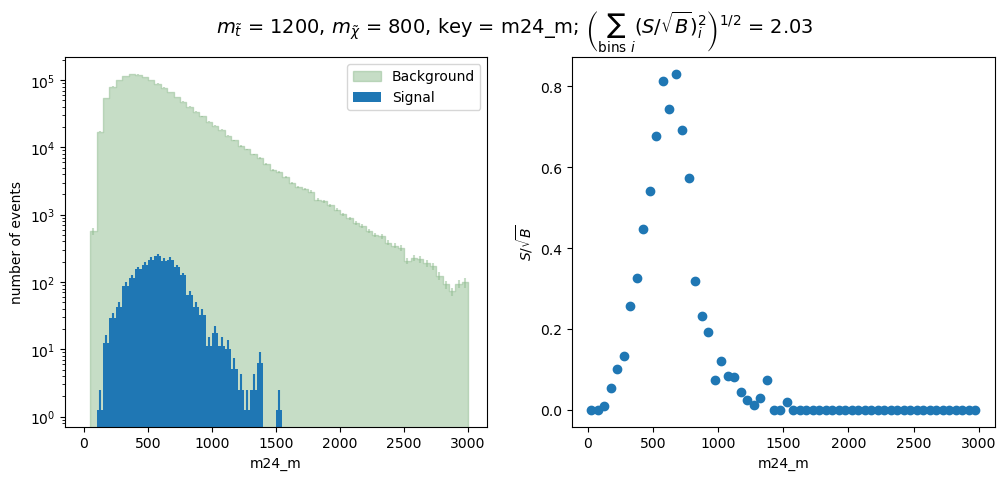

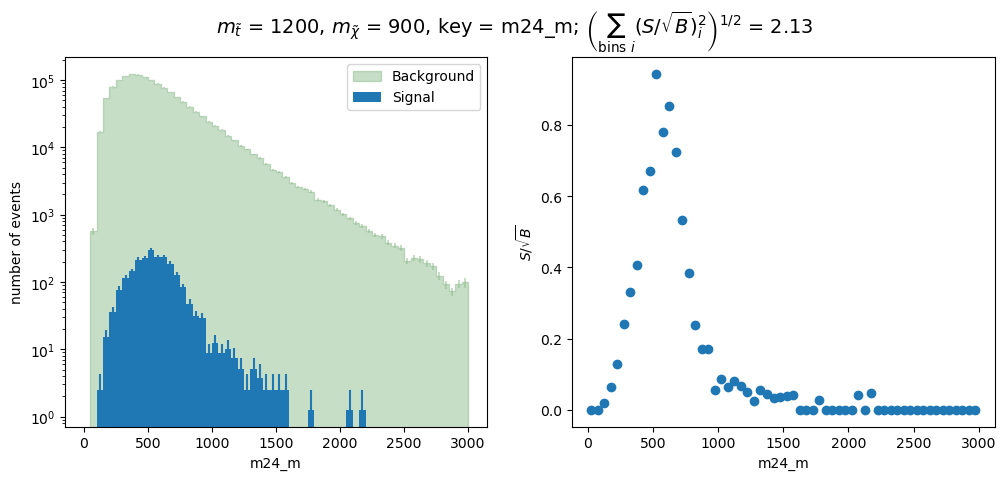

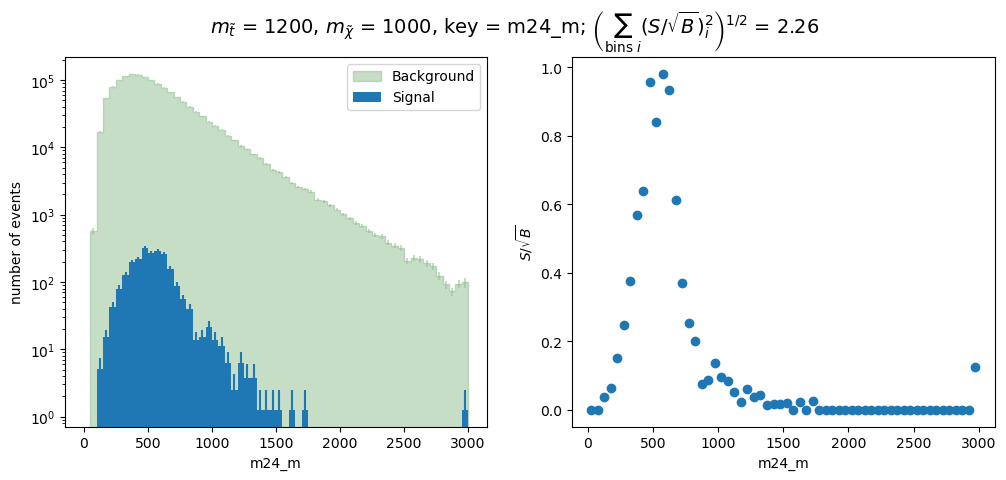

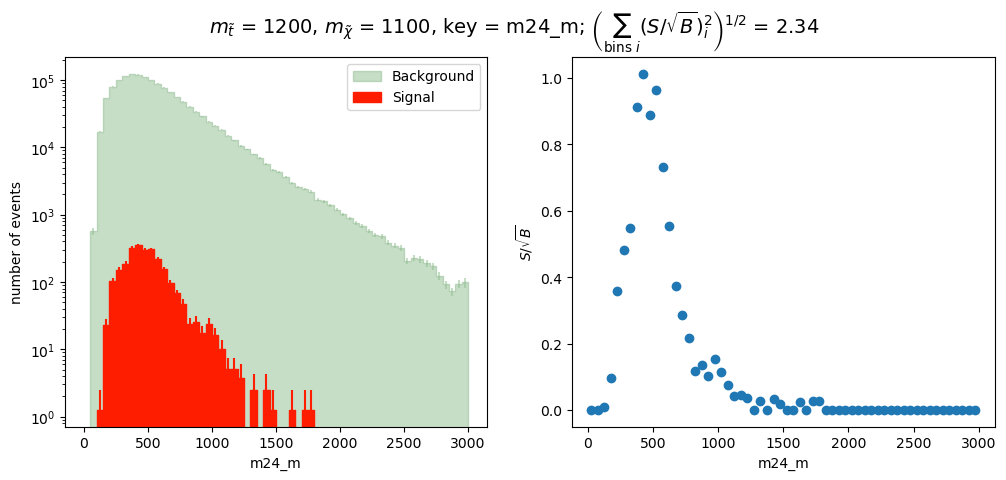

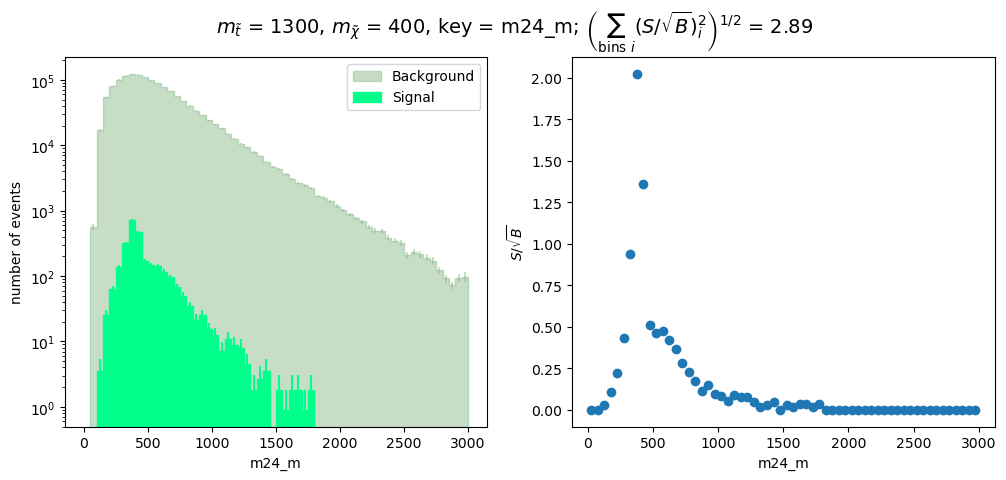

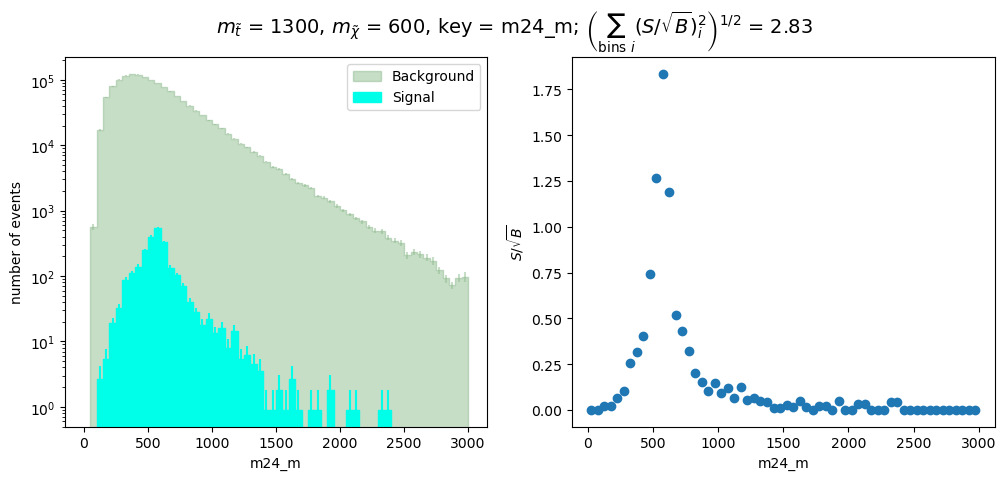

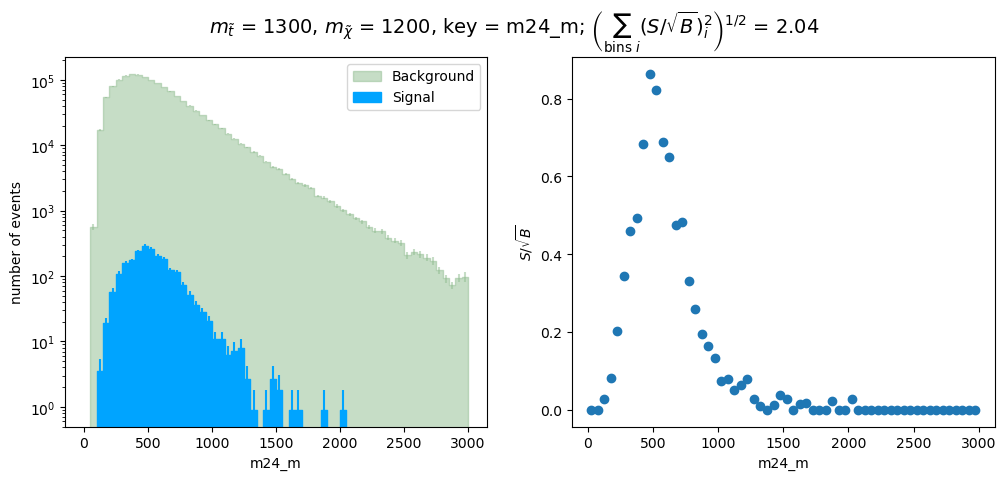

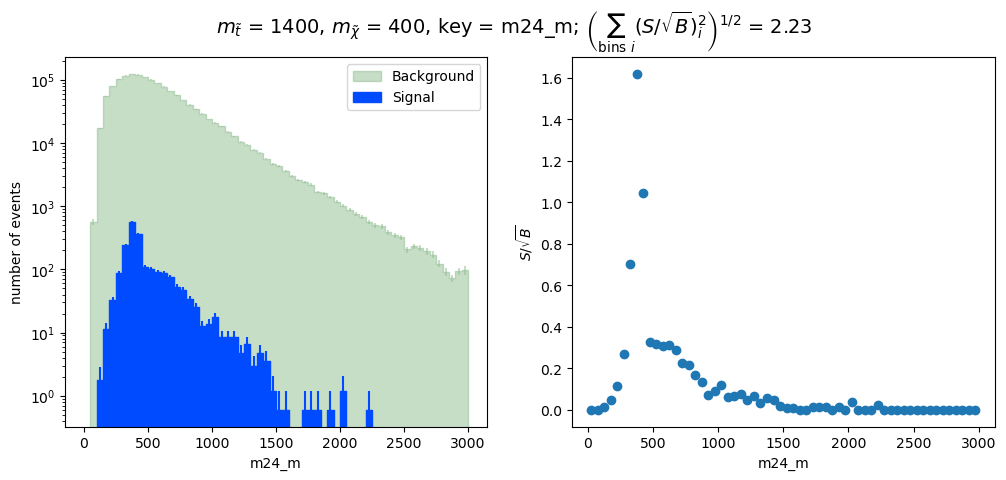

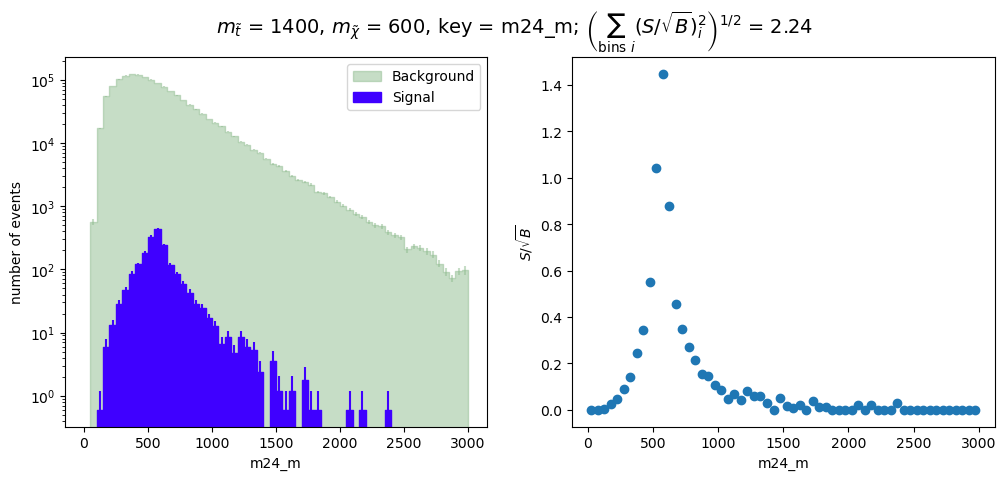

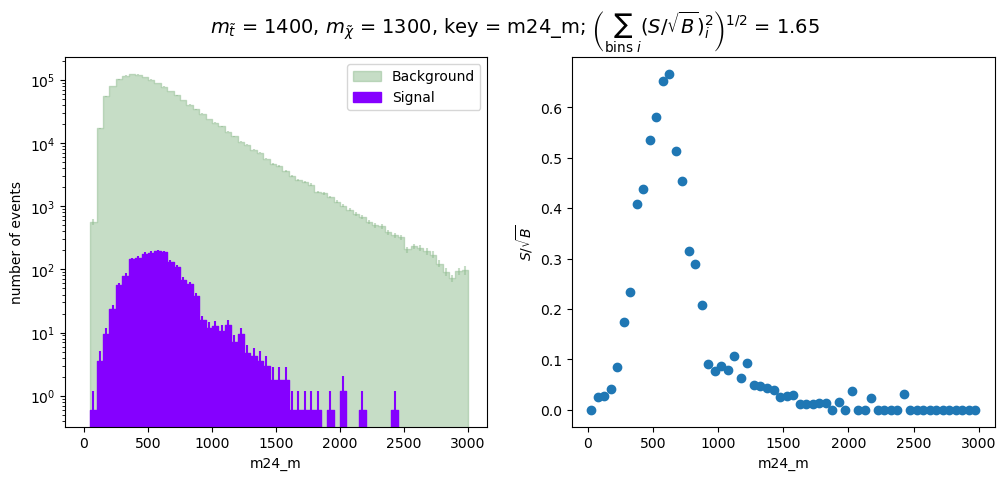

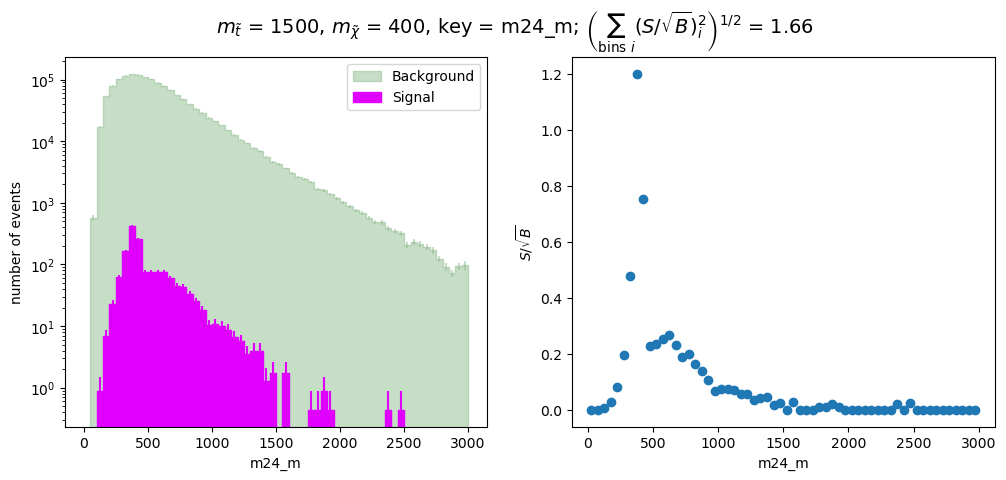

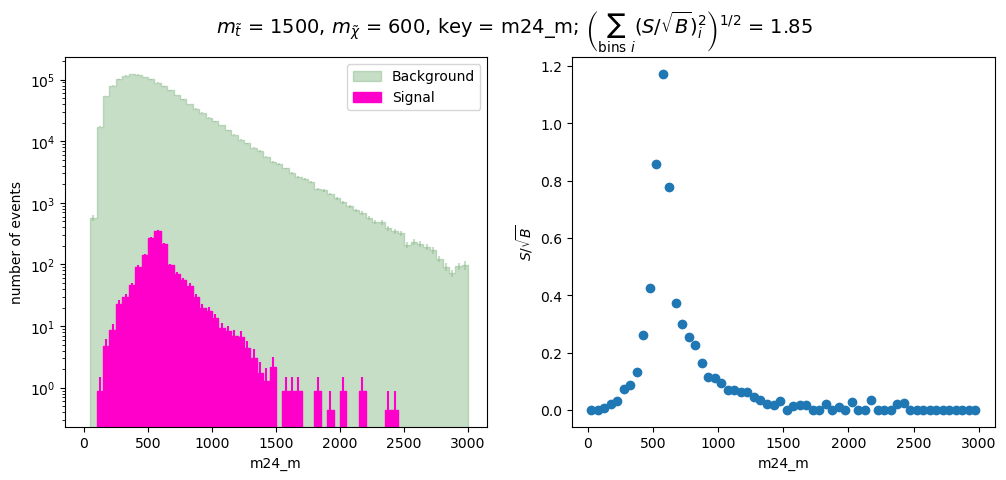

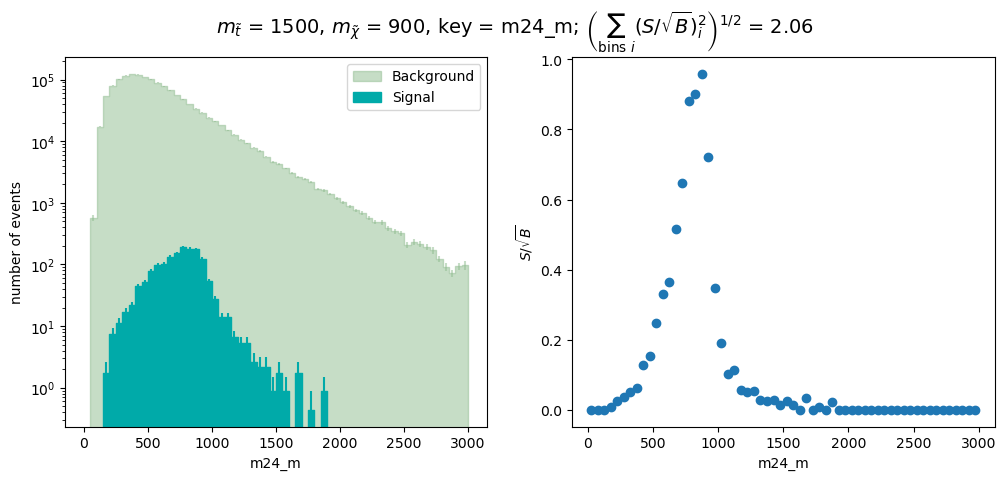

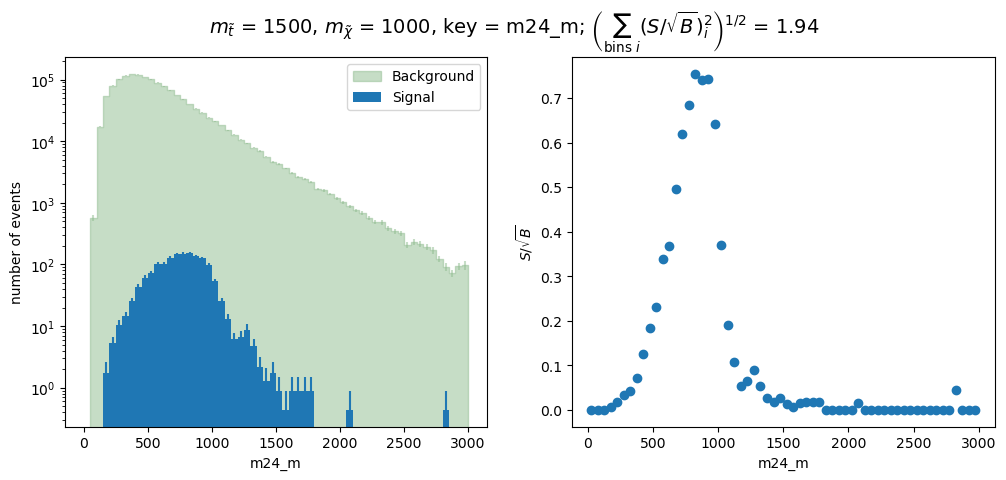

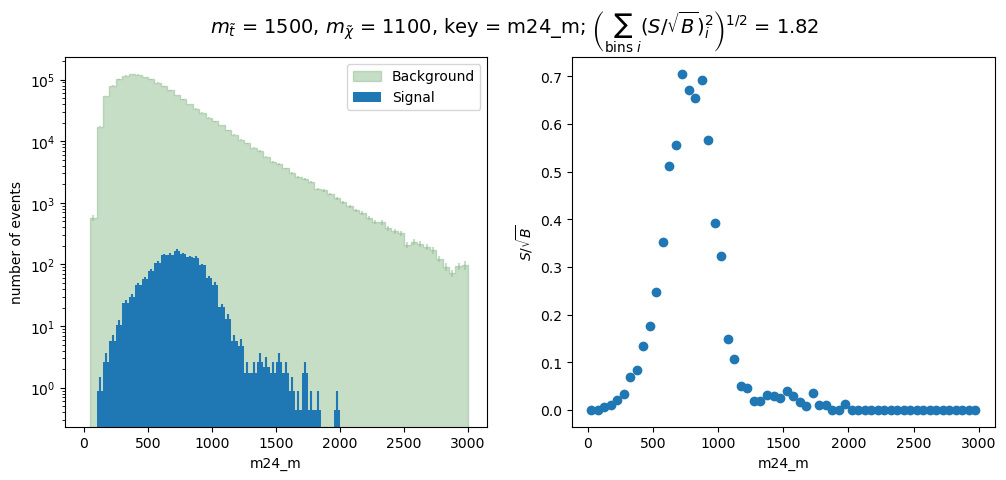

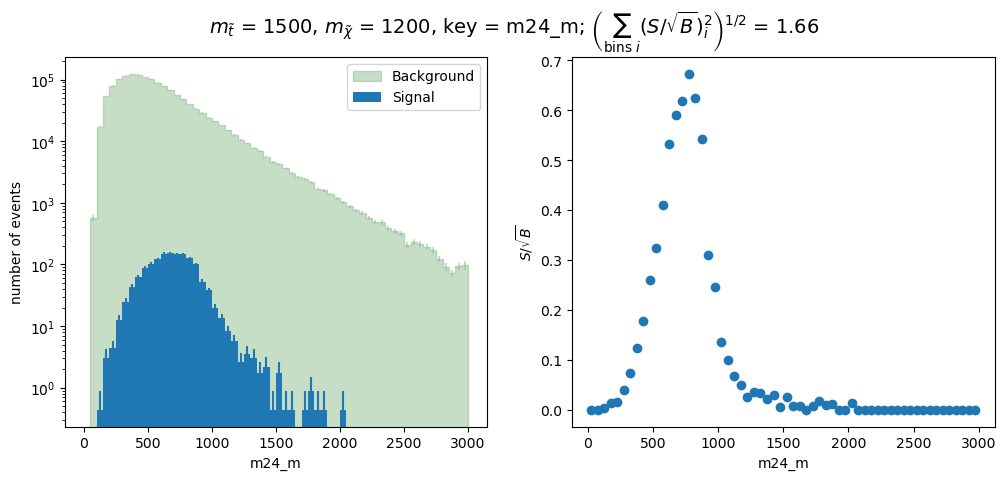

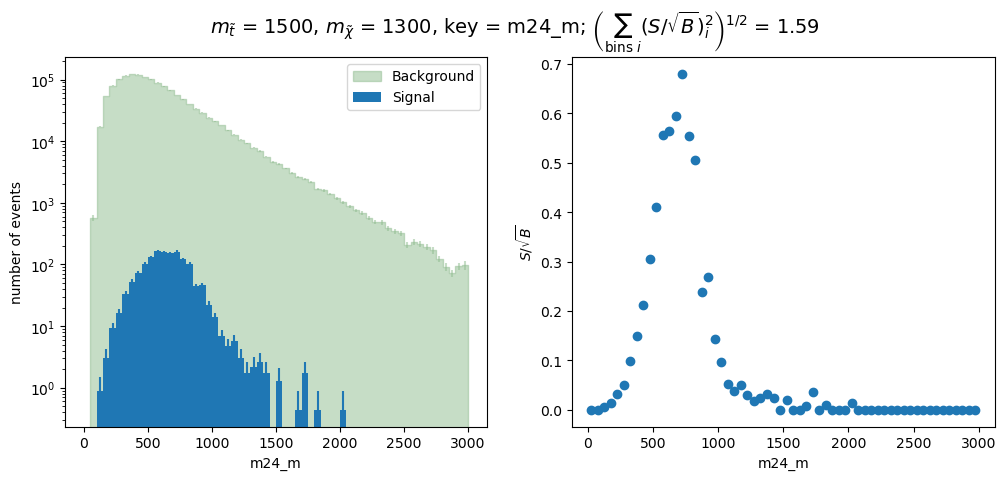

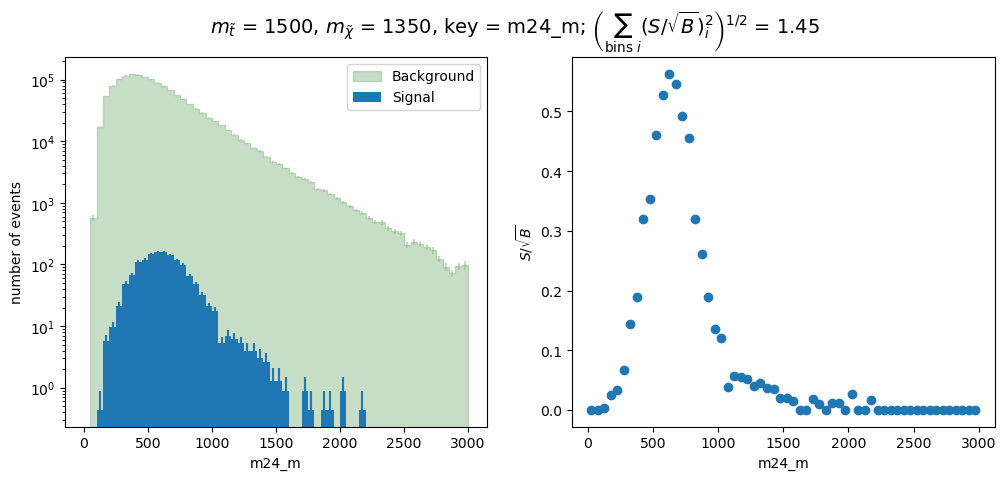

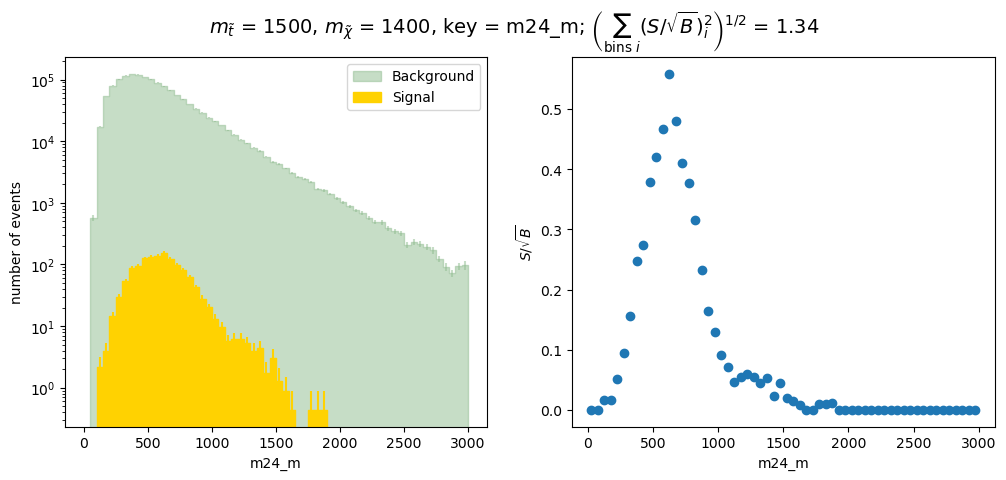

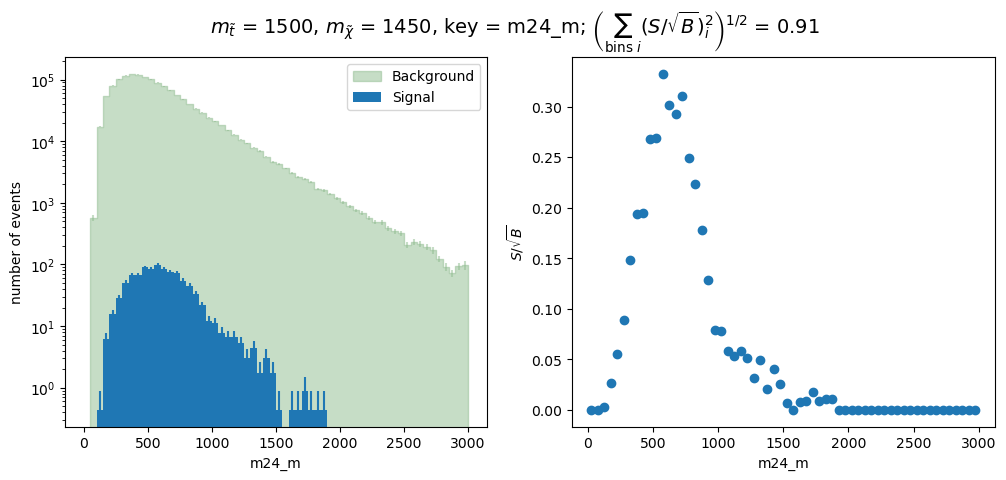

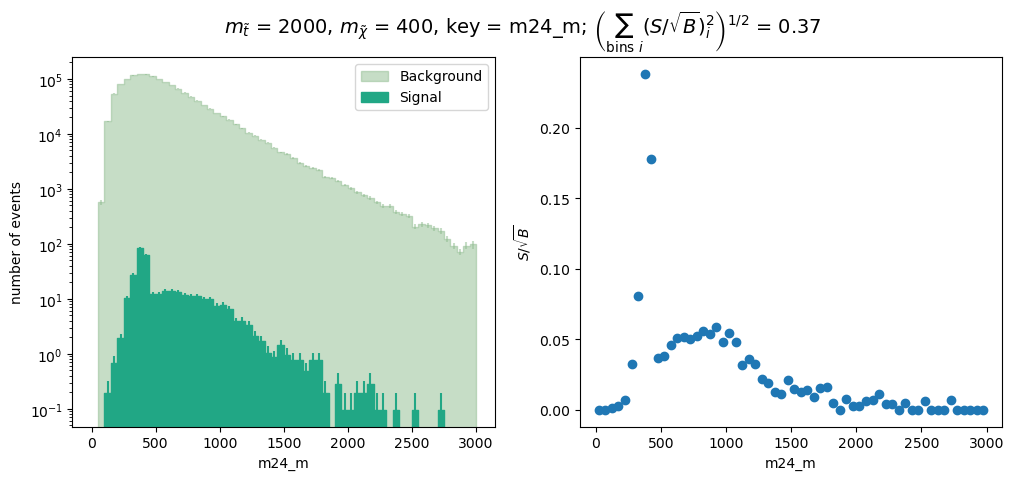

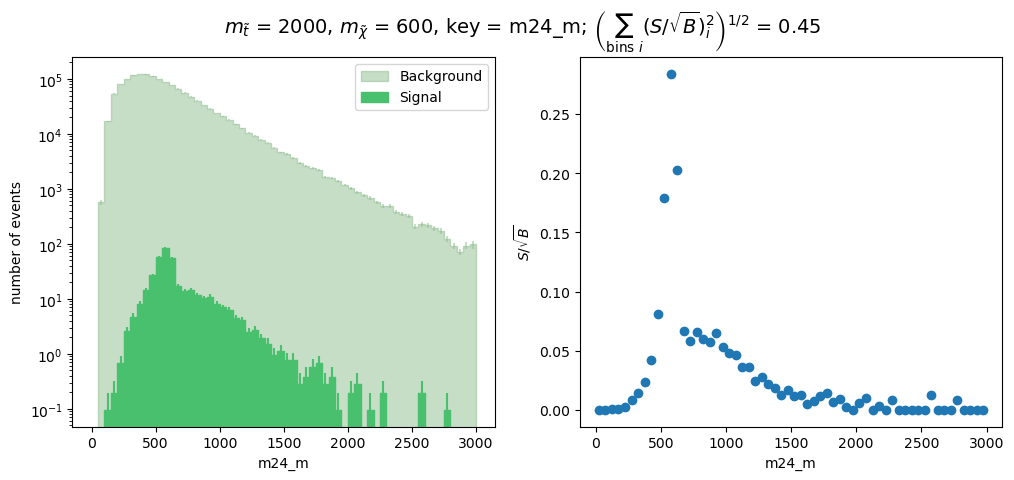

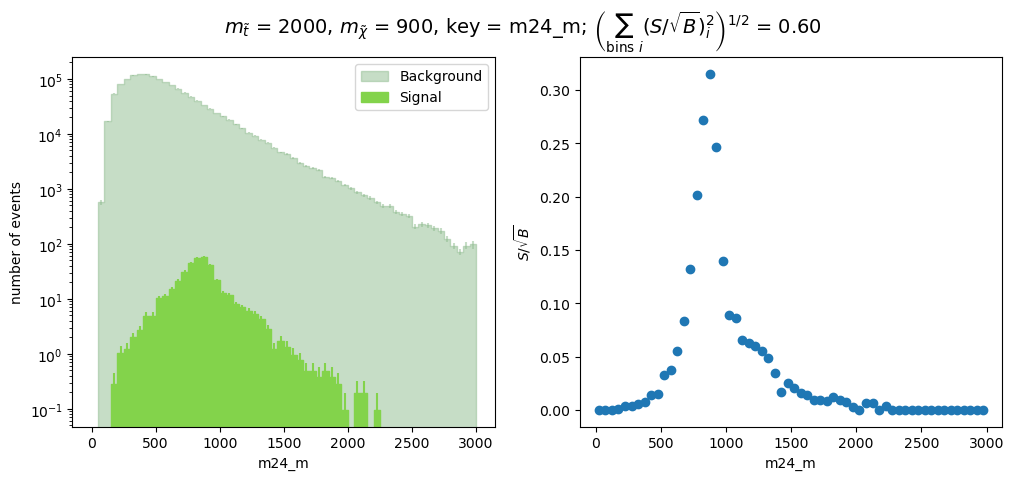

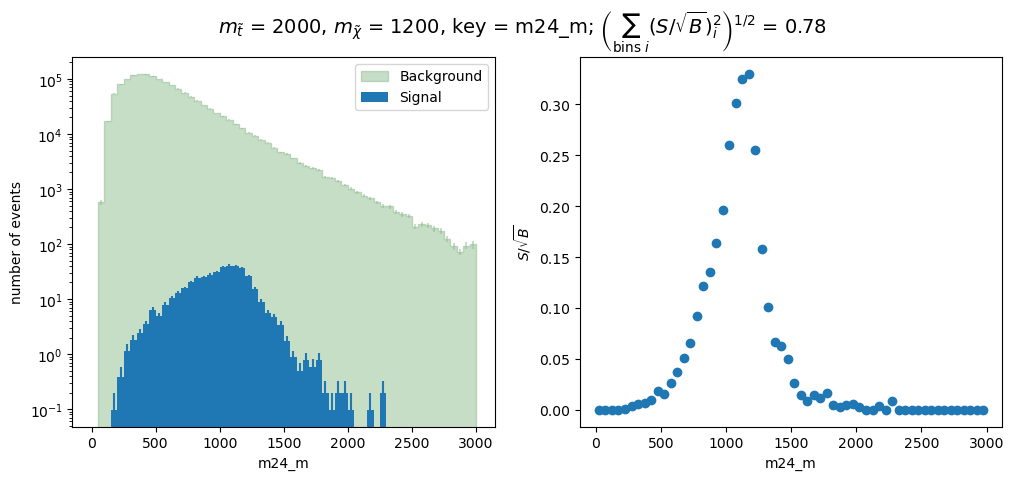

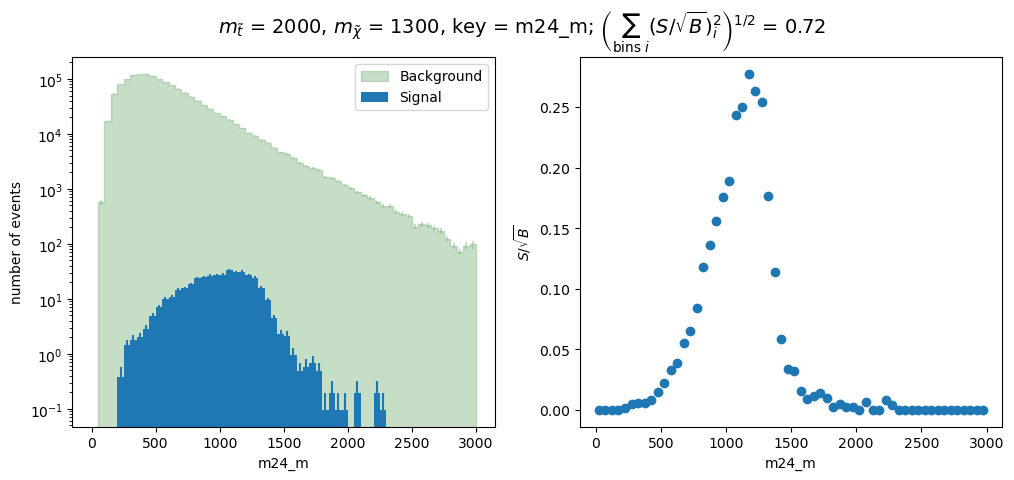

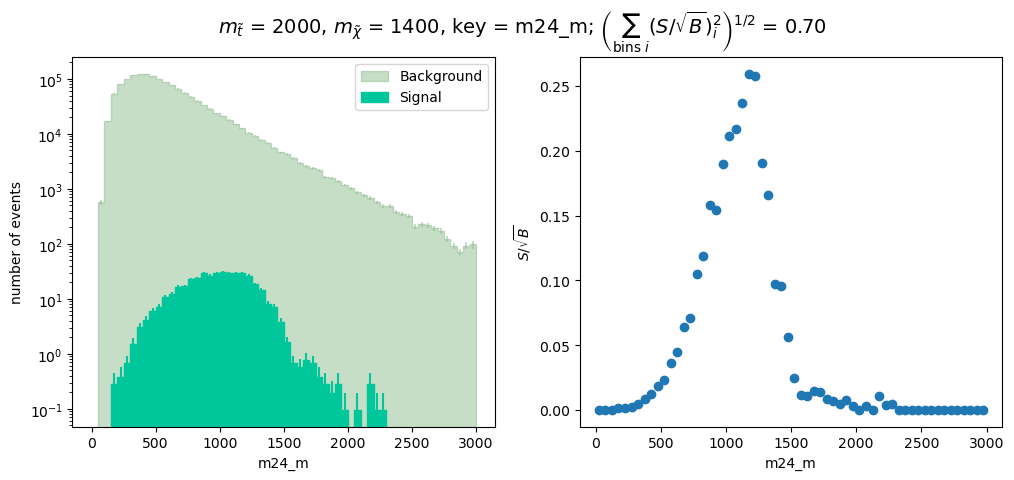

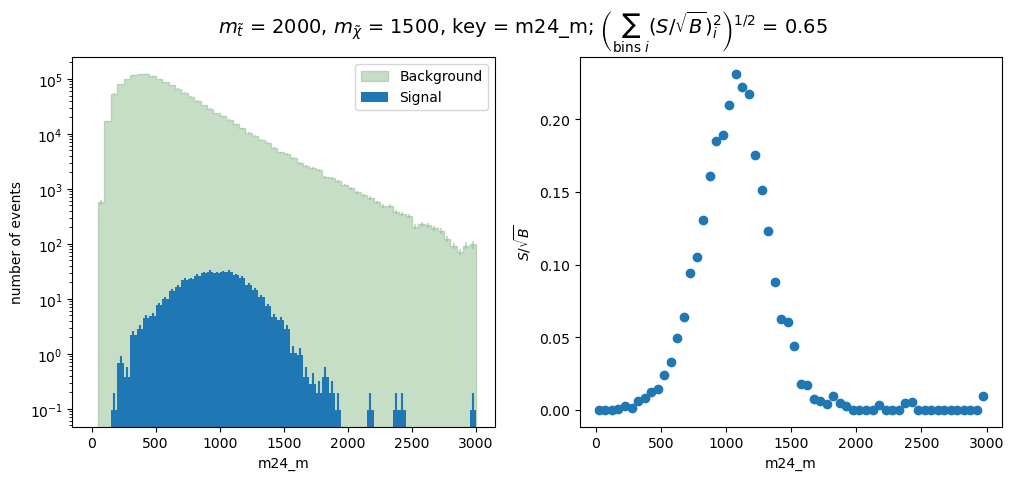

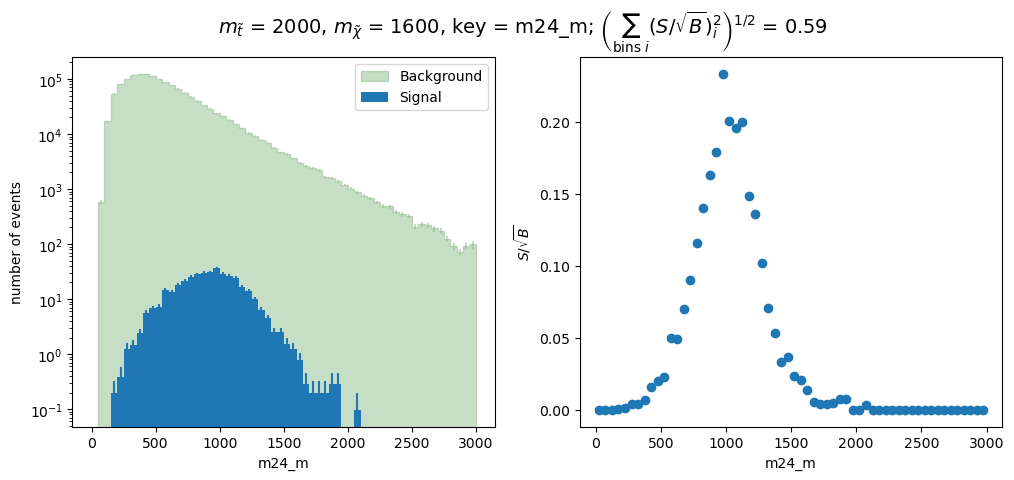

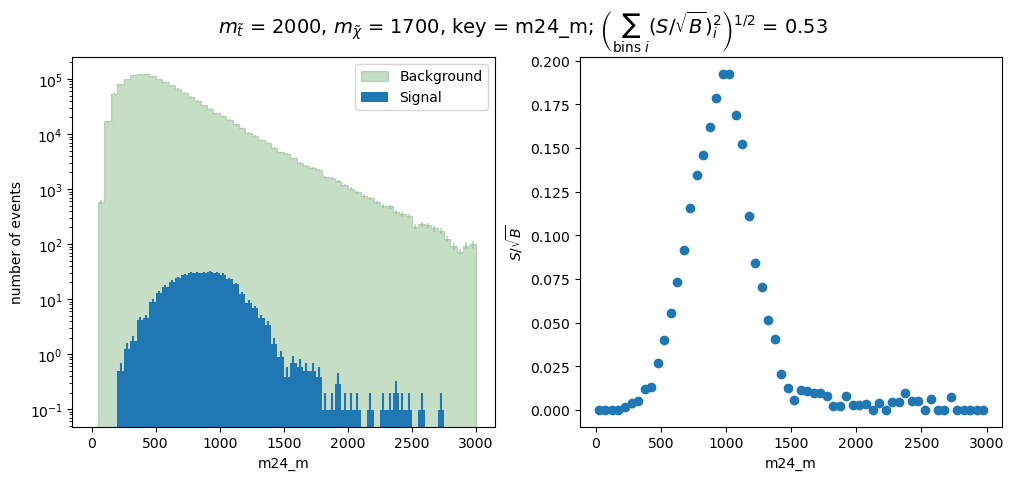

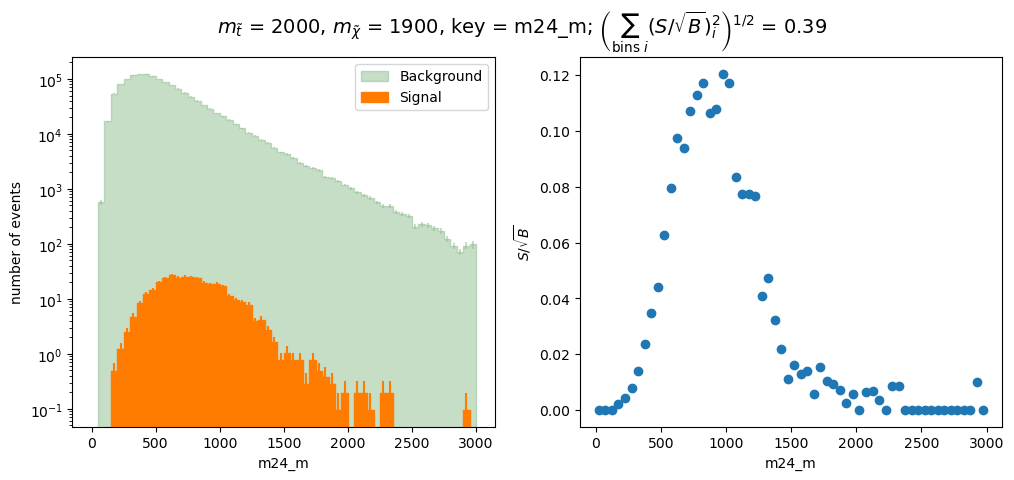

In [8]:
xvar = 'm24_m'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi)

    m24_m_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\left(\sum_{{\\text{{bins }} i}} (S/\sqrt{{B}})_i^2\\right)^{{1/2}}$ = {s_over_root_b:.2f}", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    # ax[0].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, 1000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    # ax[1].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    # ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")


In [5]:
xvar = 'm14_vs_m13'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b_2D(hists, bg_hists, xvar, true_mchi)

    m24_m_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj_2d = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj_2d = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\left(\sum_{{\\text{{bins }} i}} (S/\sqrt{{B}})_i^2\\right)^{{1/2}}$ = {s_over_root_b:.2f}", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    # ax[0].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, 1000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    # ax[1].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    # ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")


ValueError: too many values to unpack (expected 2)

/tmp/ipykernel_2140116/3735693531.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


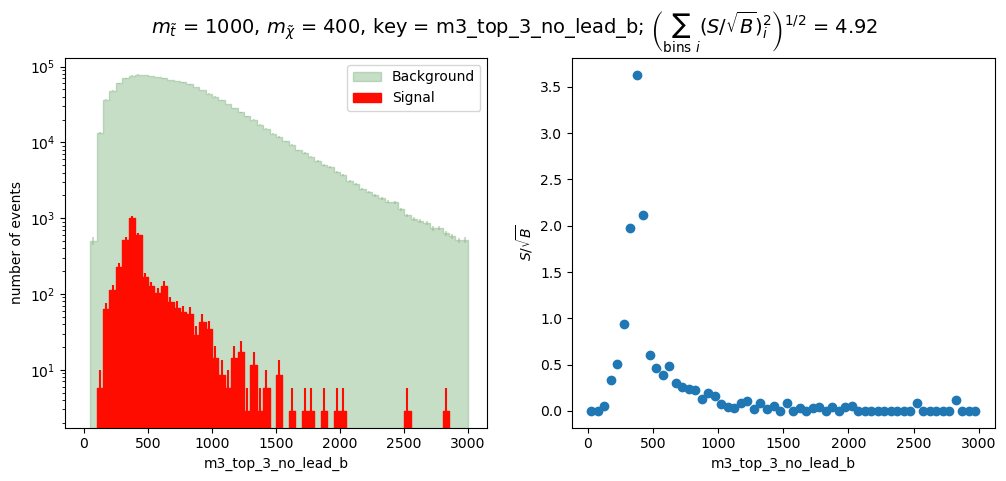

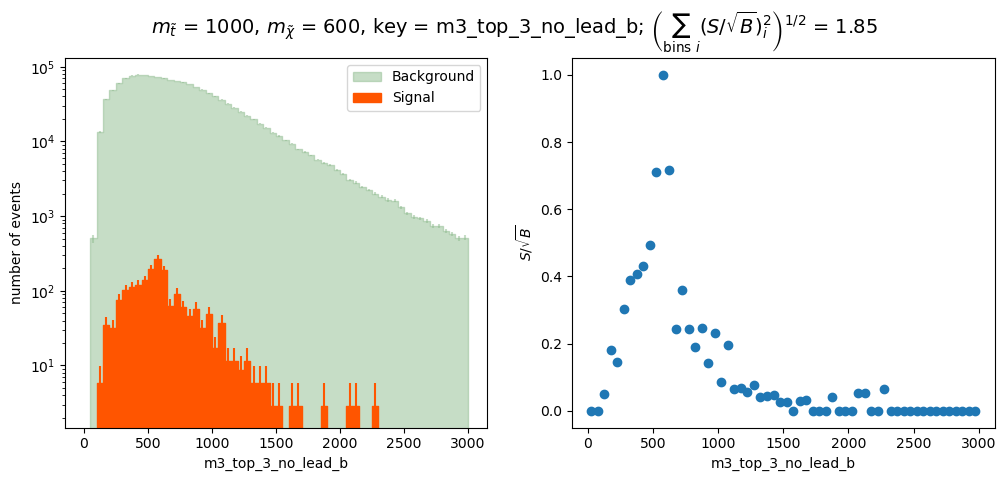

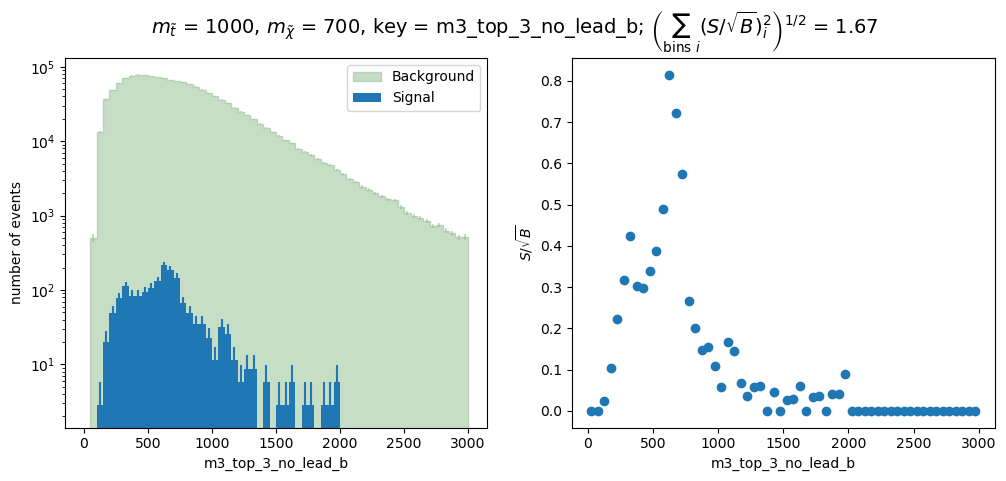

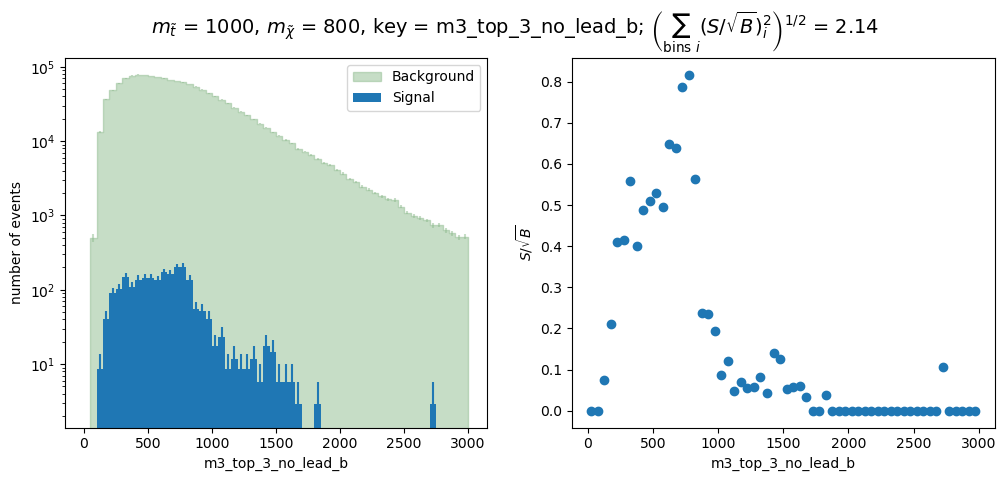

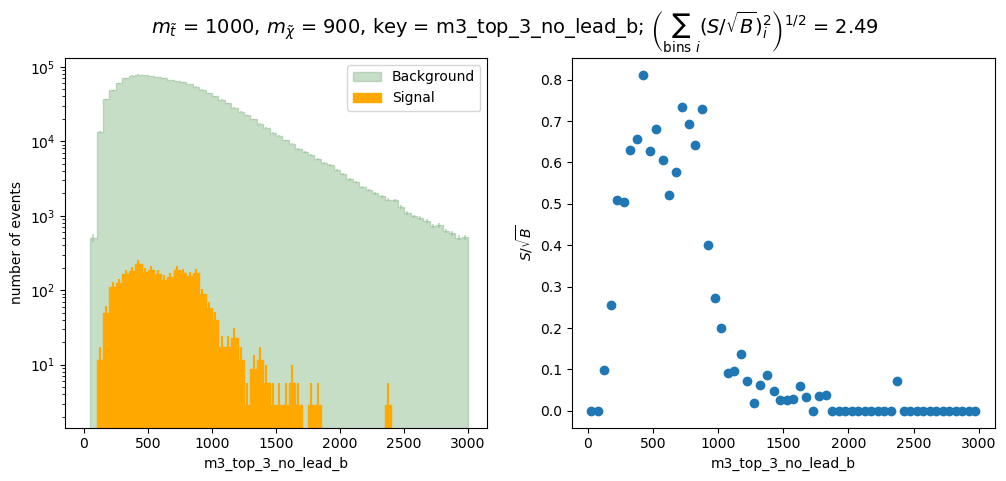

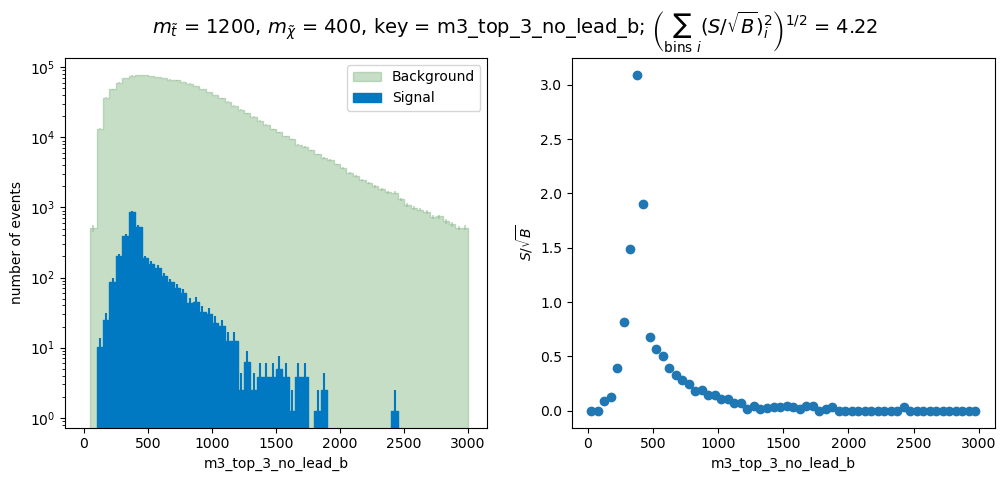

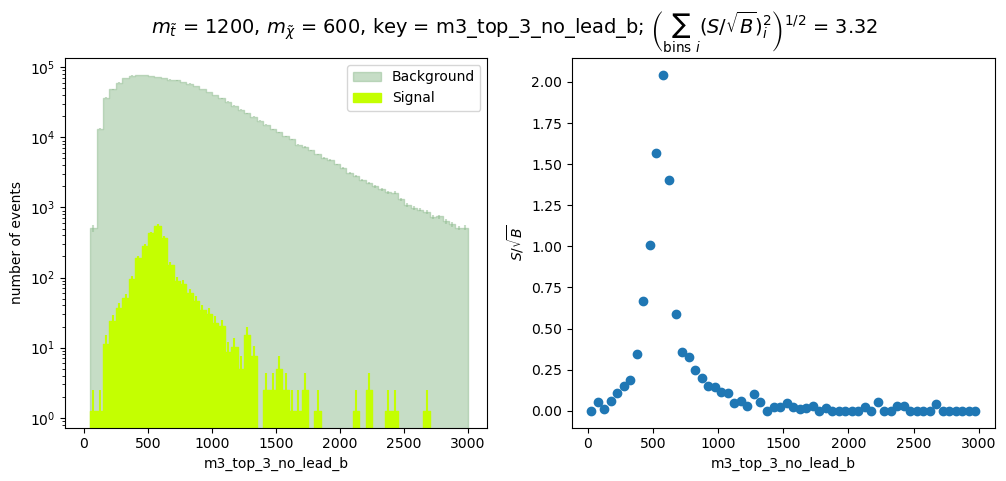

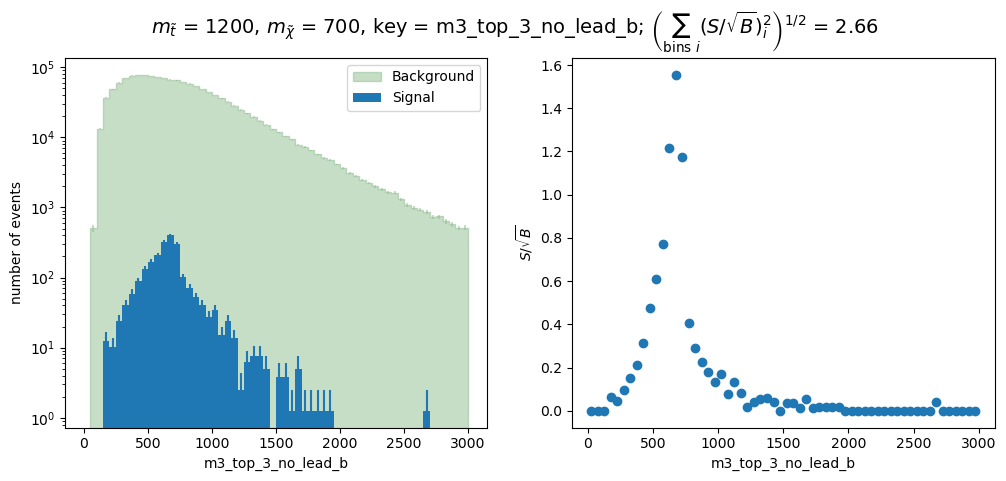

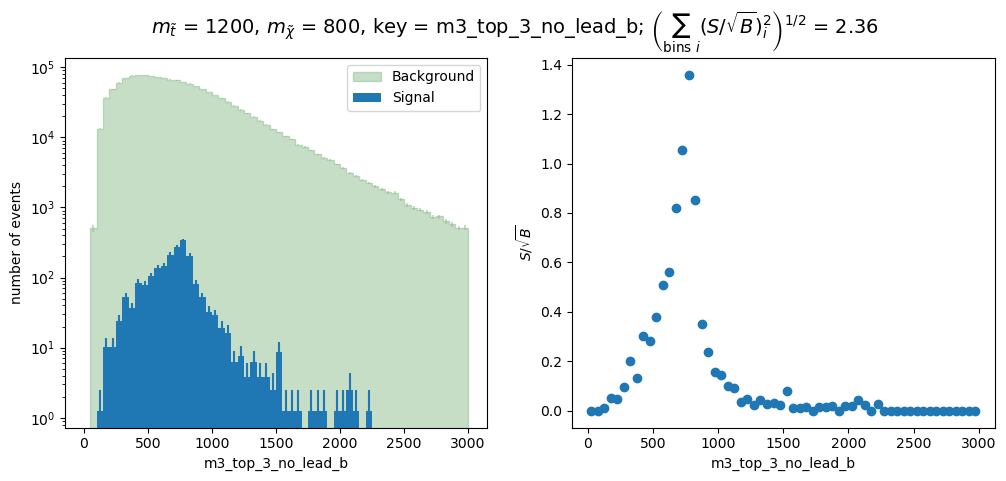

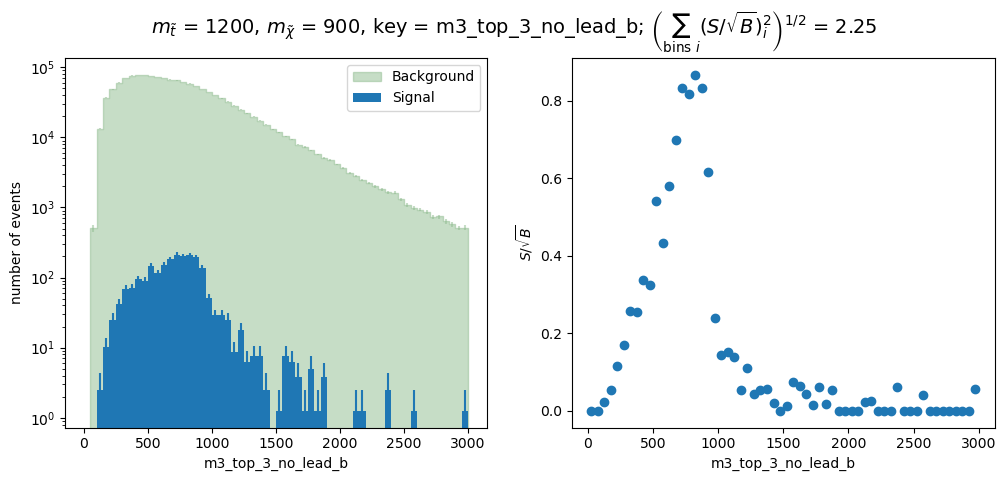

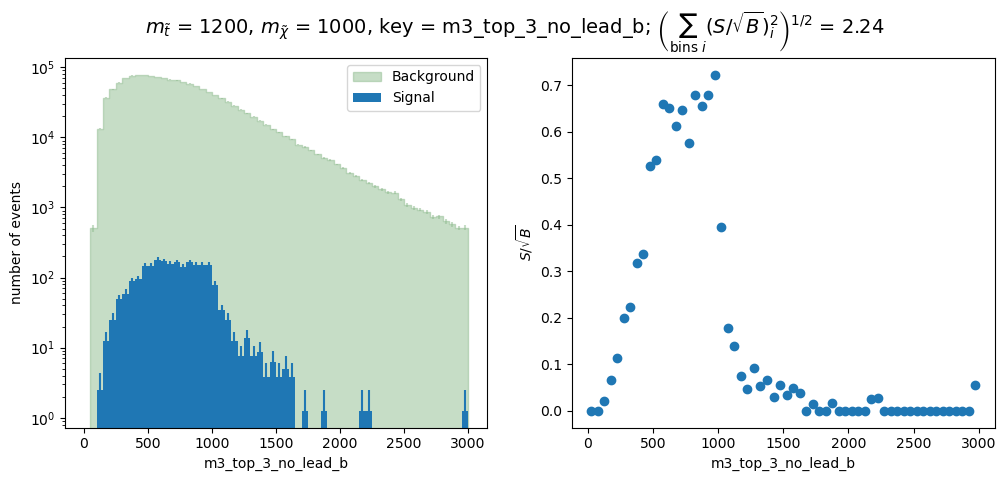

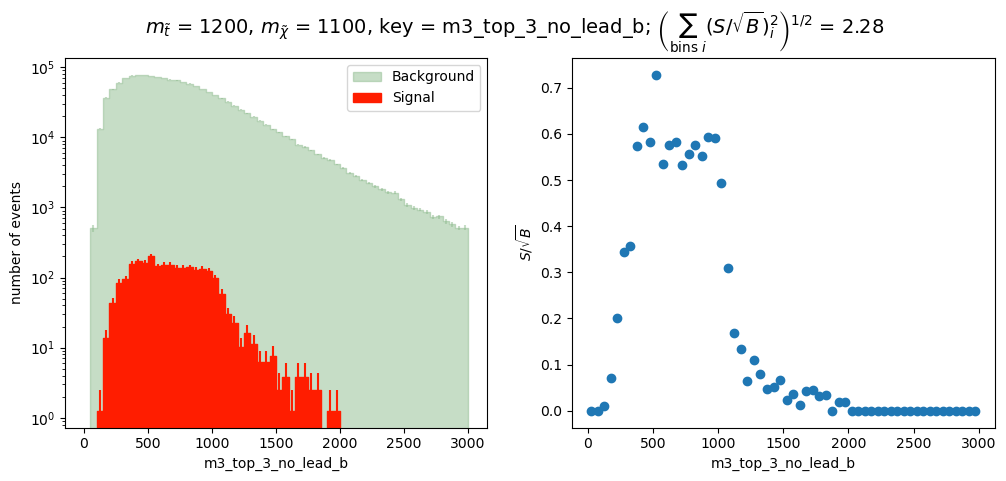

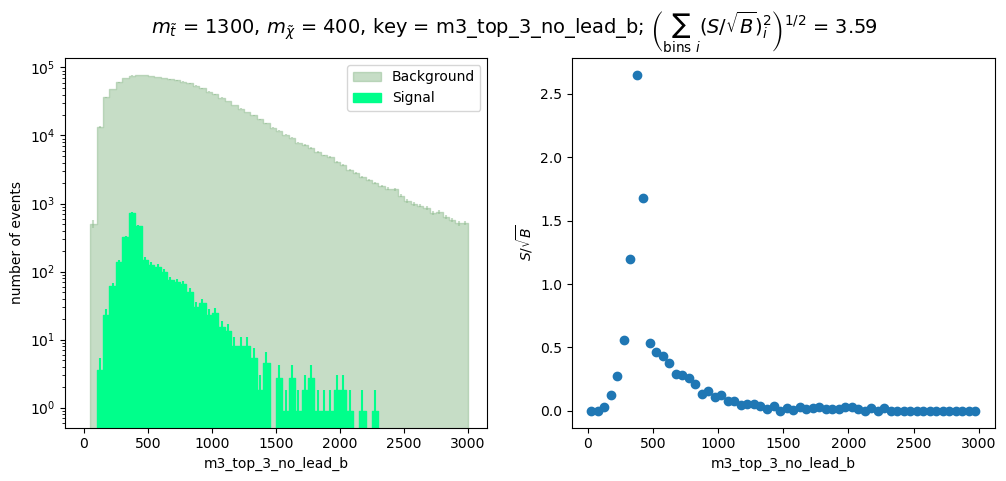

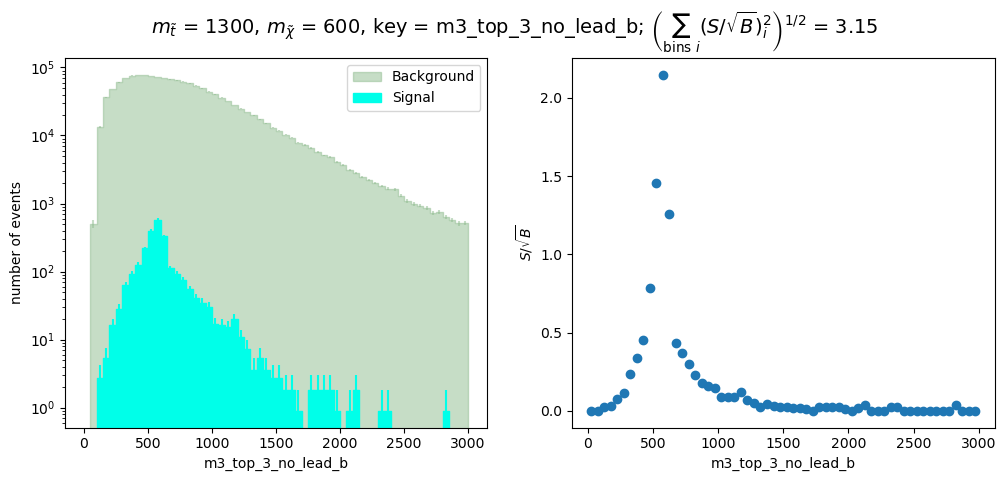

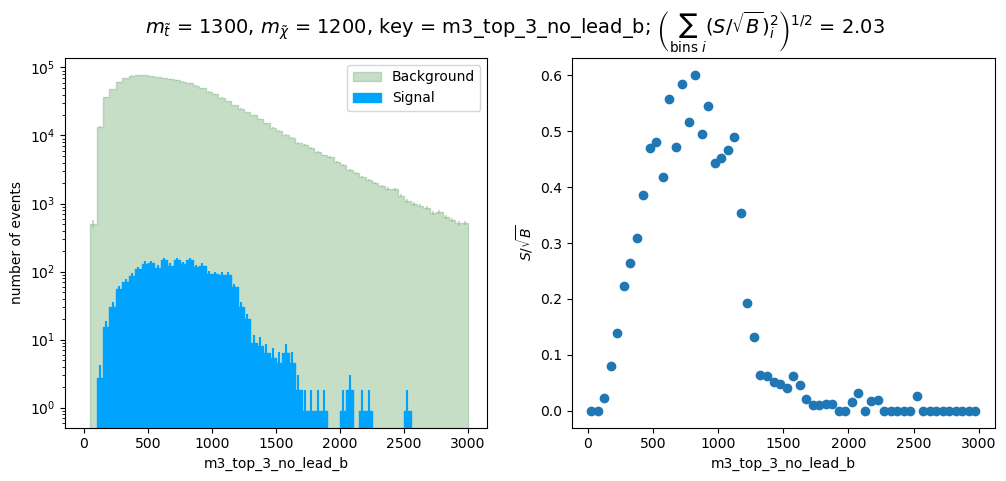

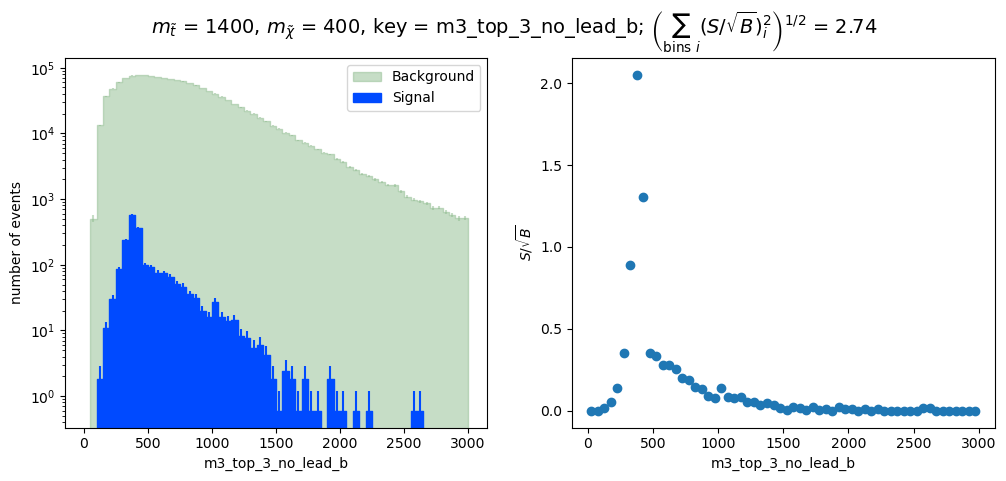

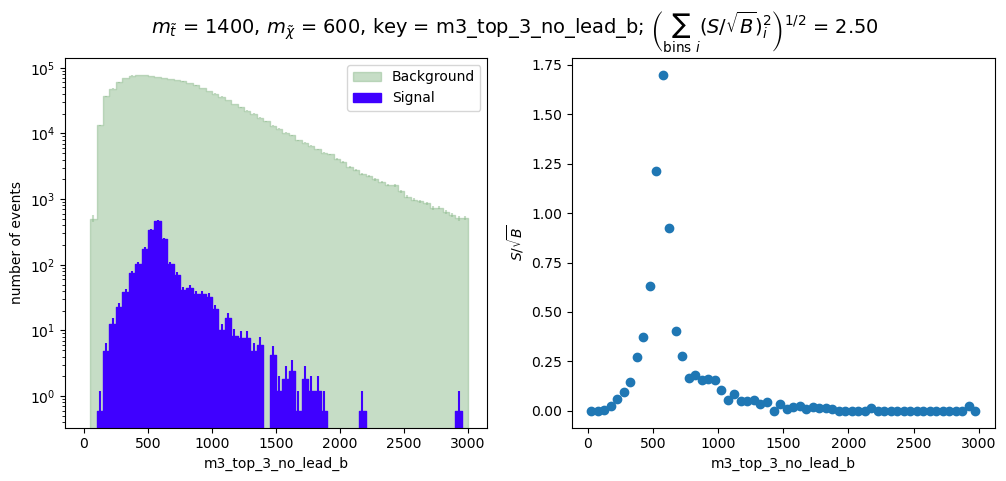

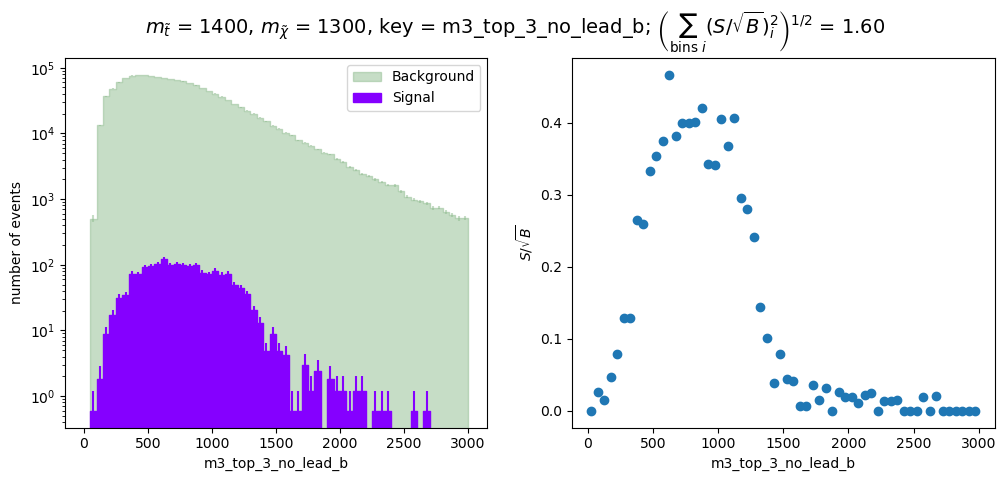

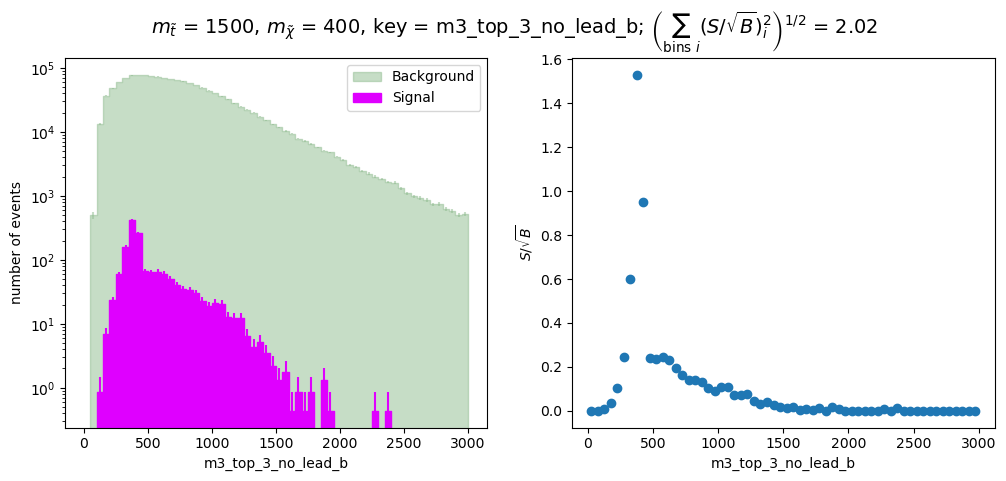

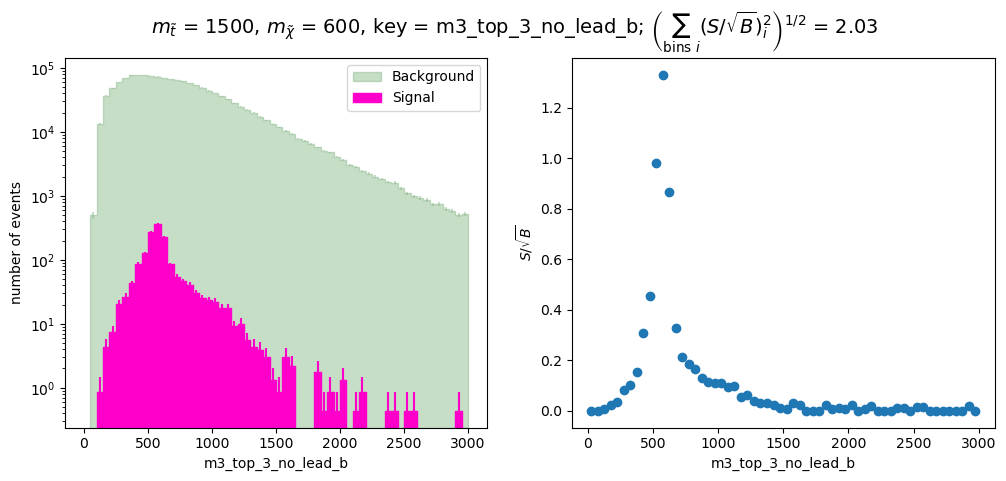

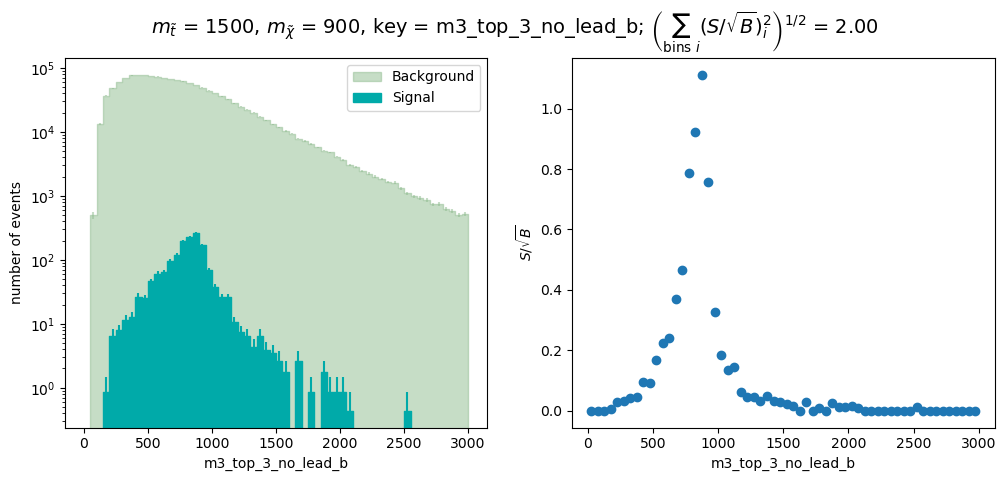

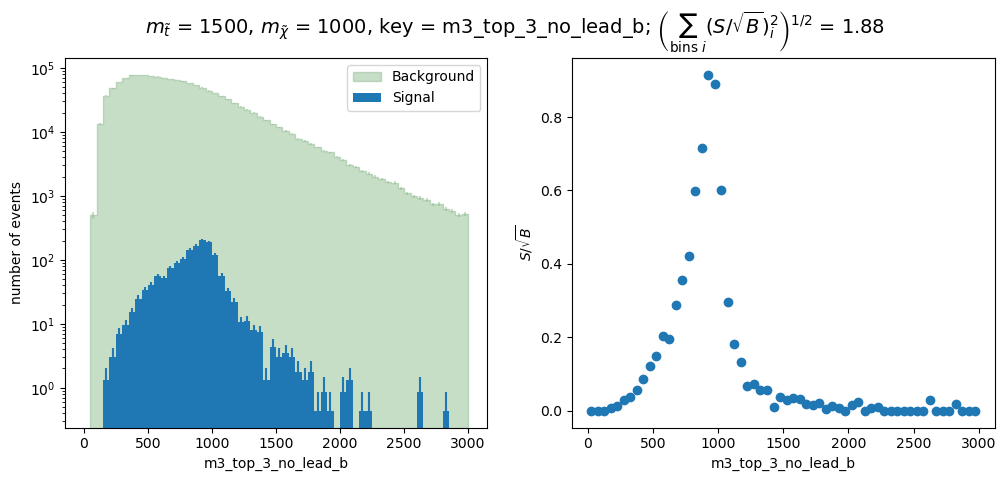

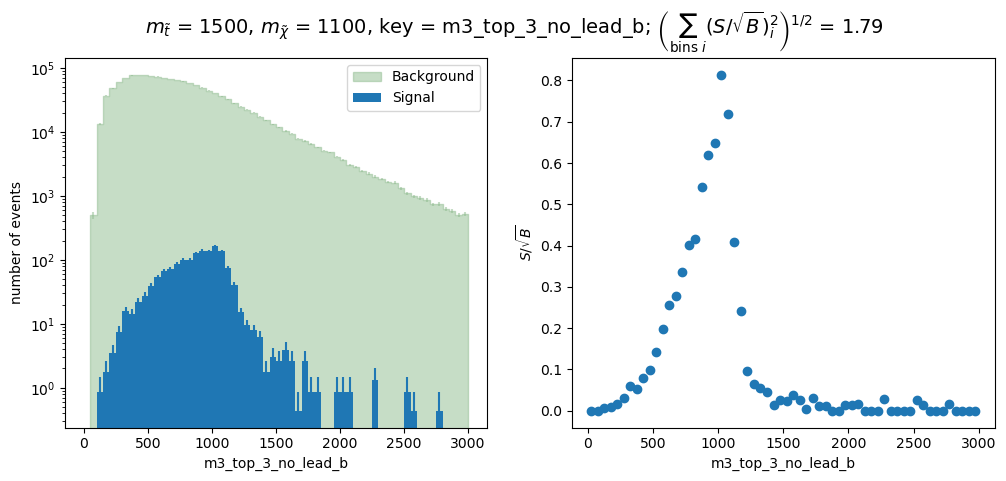

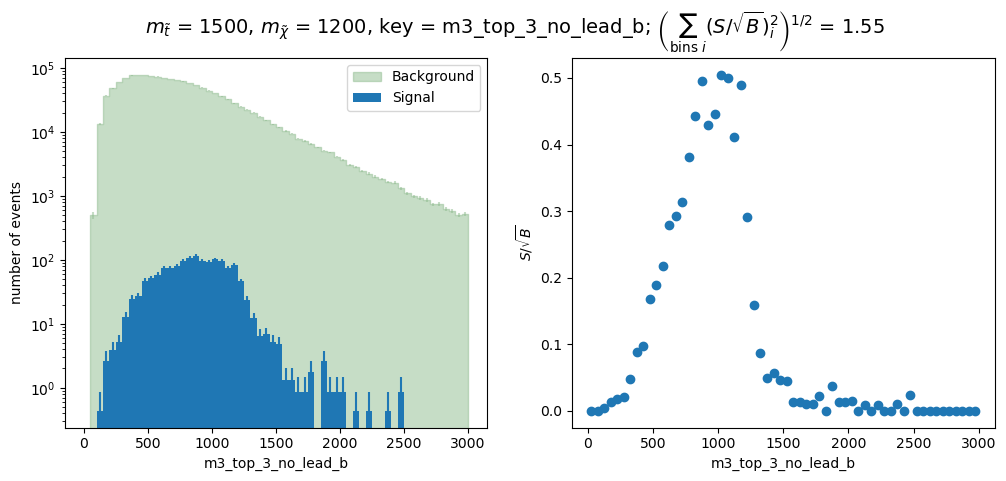

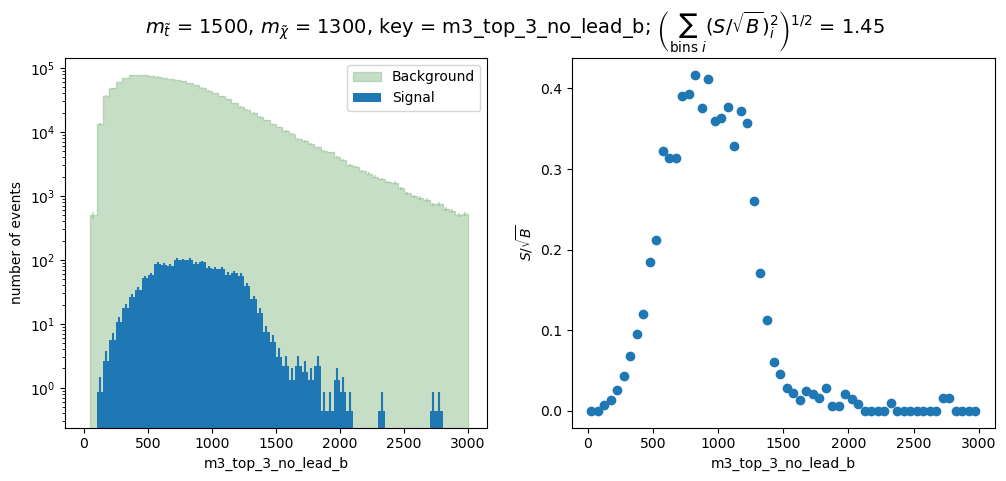

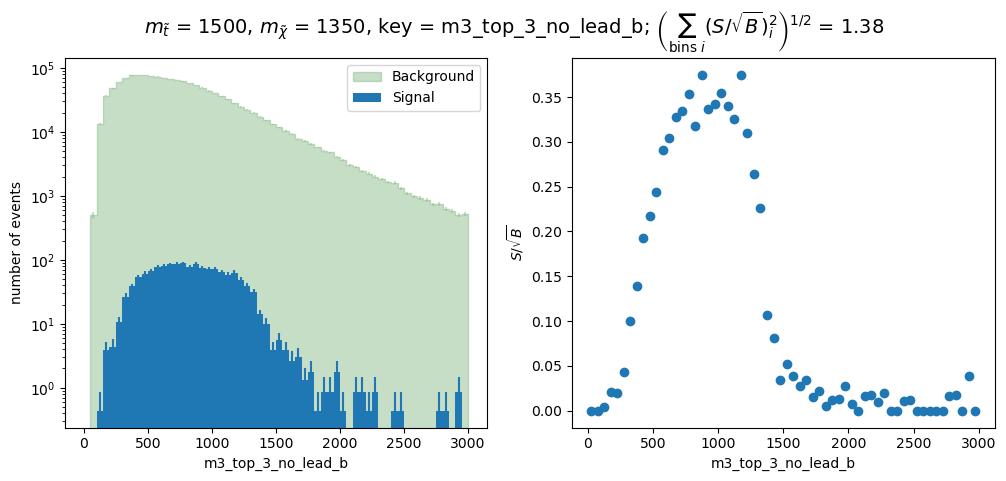

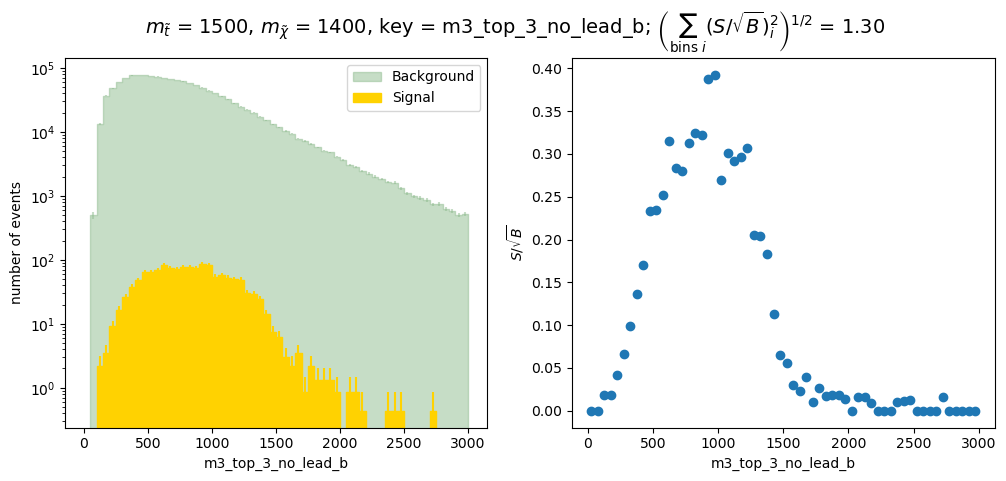

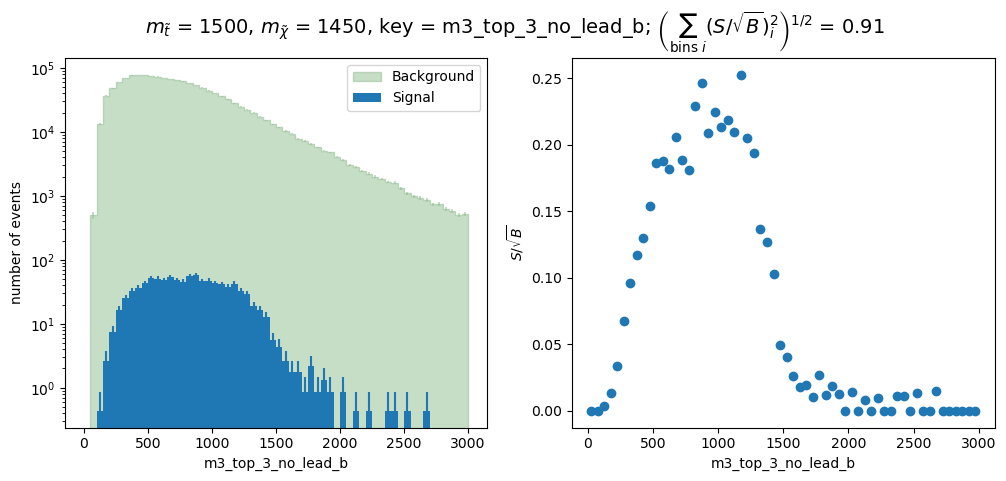

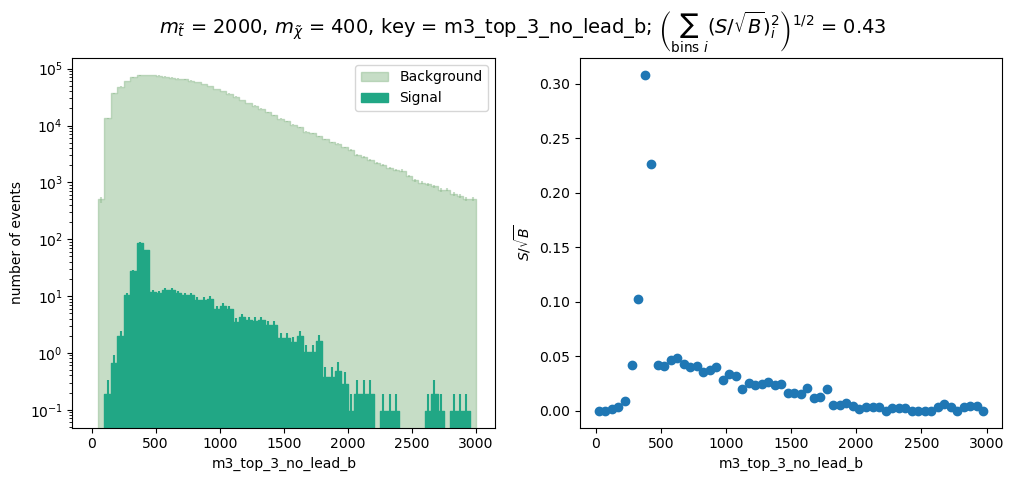

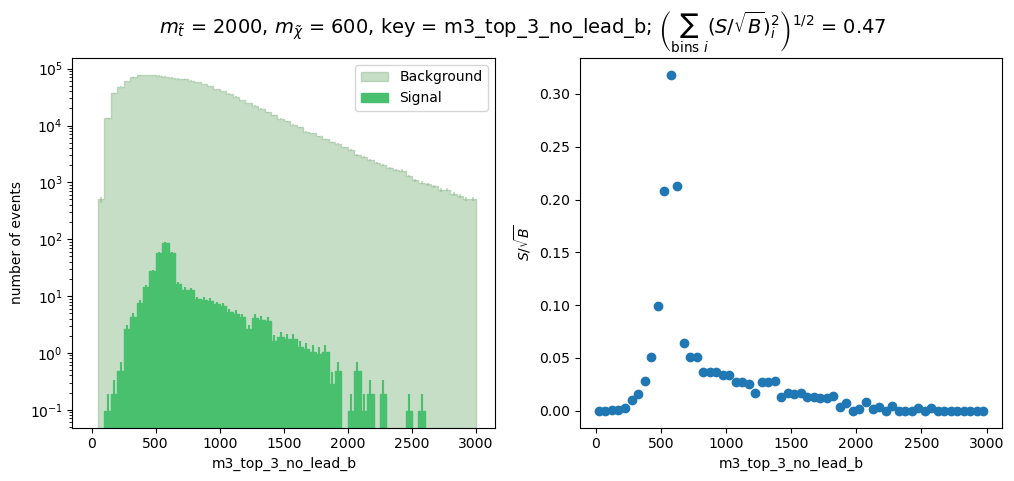

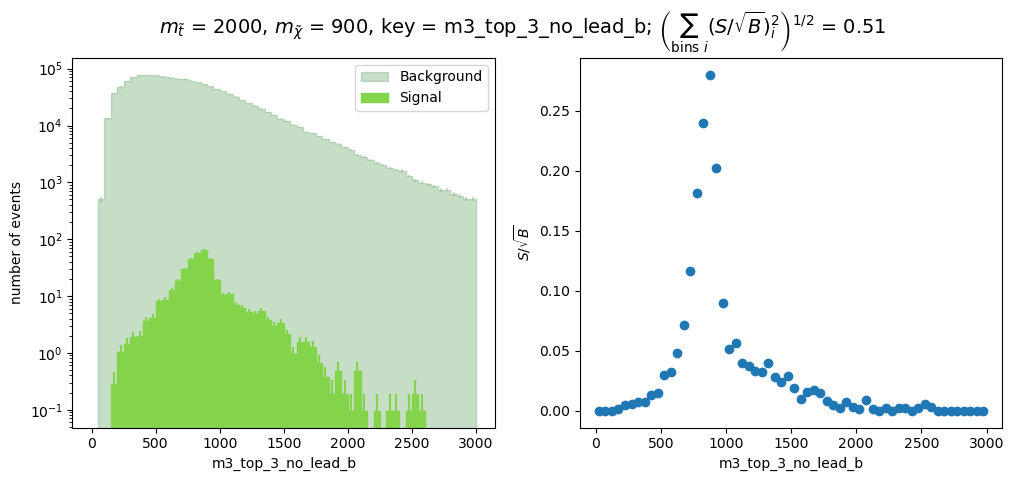

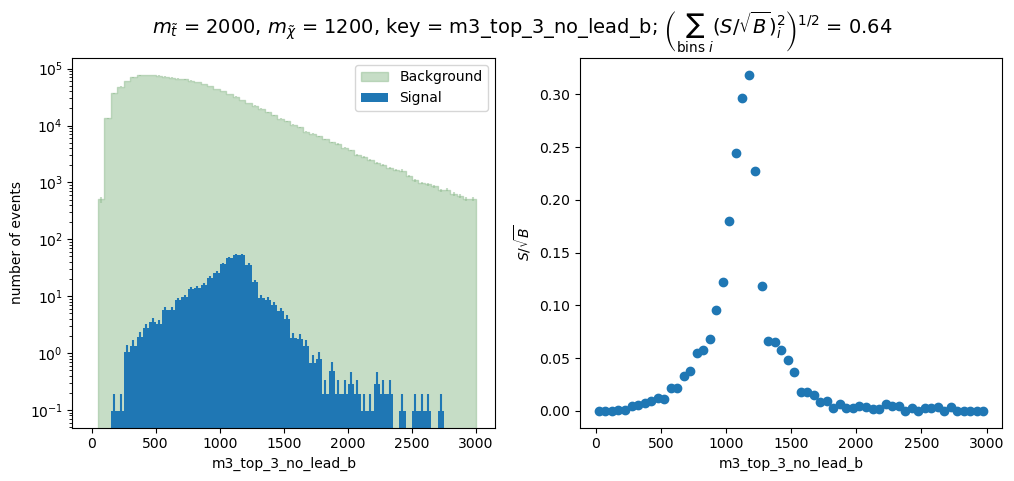

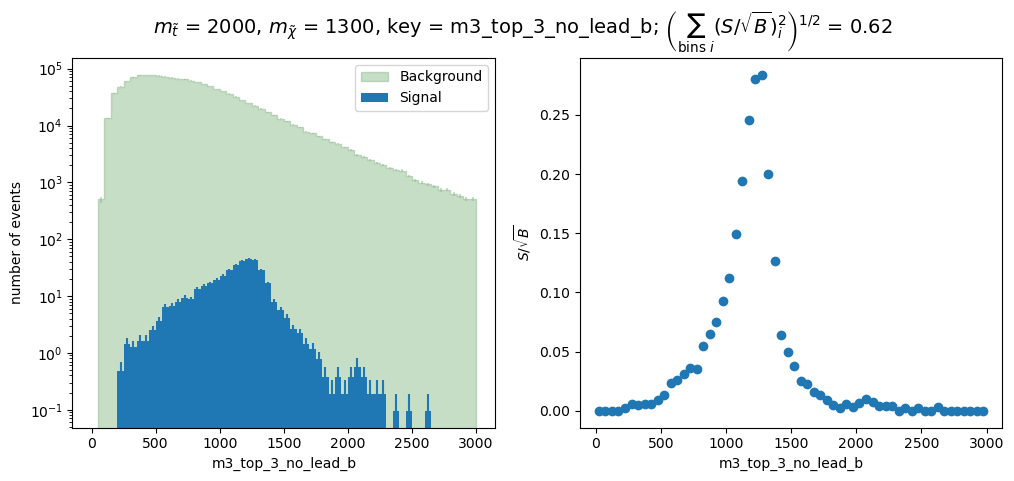

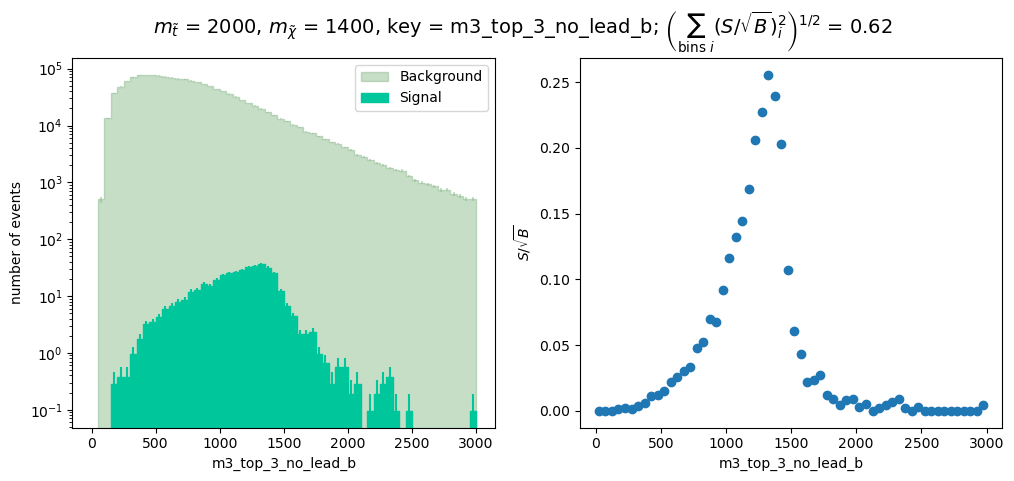

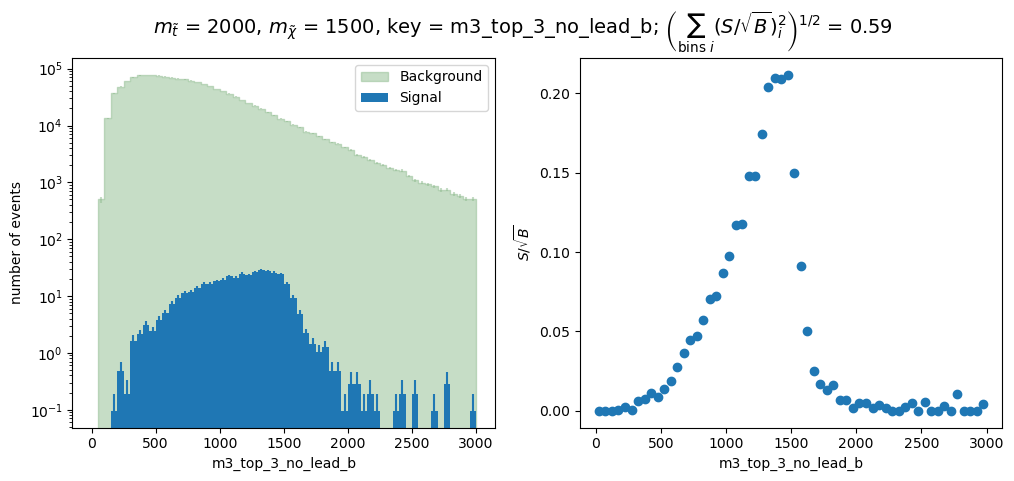

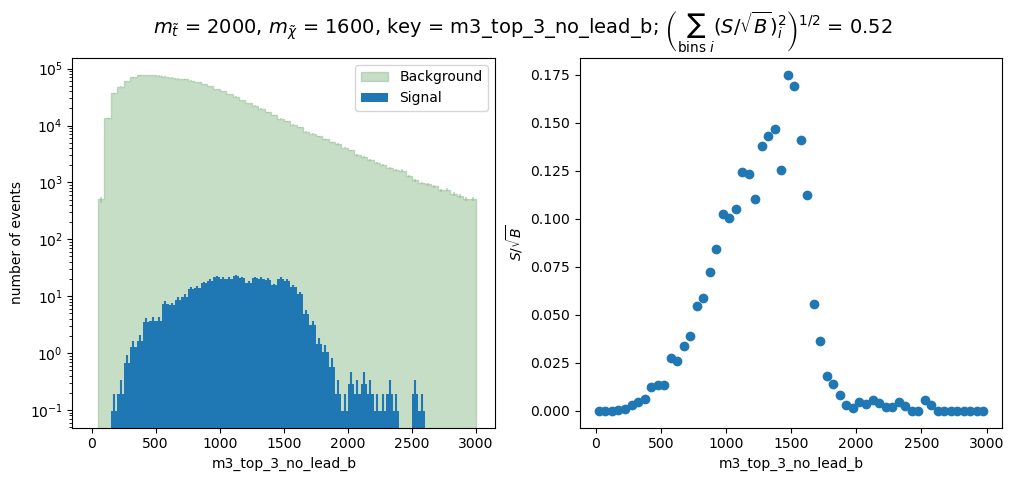

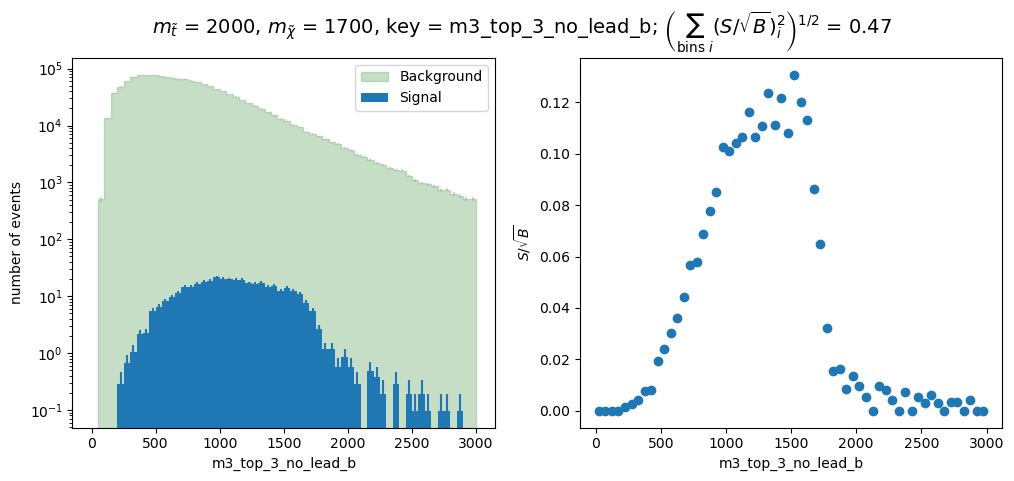

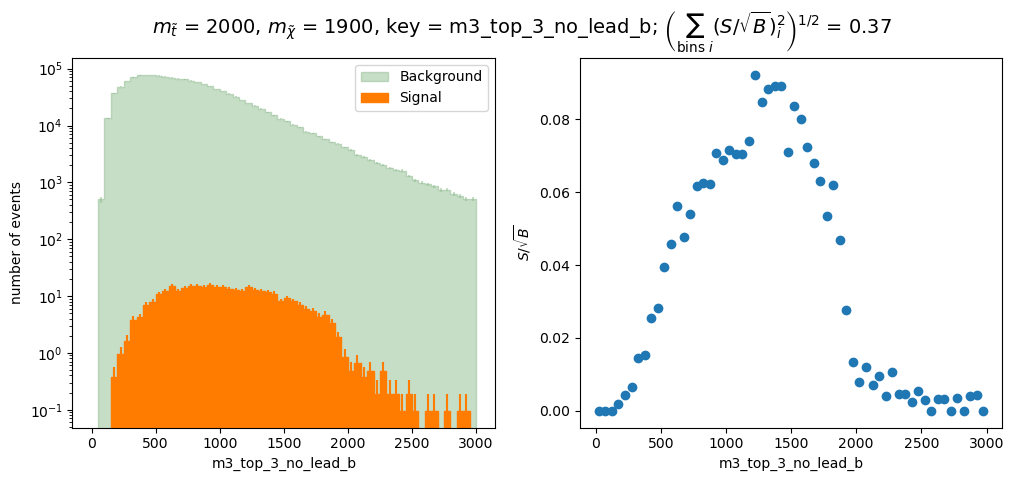

In [9]:
xvar = 'm3_top_3_no_lead_b'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi)

    m3_top_3_no_lead_b_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\left(\sum_{{\\text{{bins }} i}} (S/\sqrt{{B}})_i^2\\right)^{{1/2}}$ = {s_over_root_b:.2f}", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    # ax[0].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, 1000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    # ax[1].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    # ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")

/tmp/ipykernel_2130491/1591784348.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


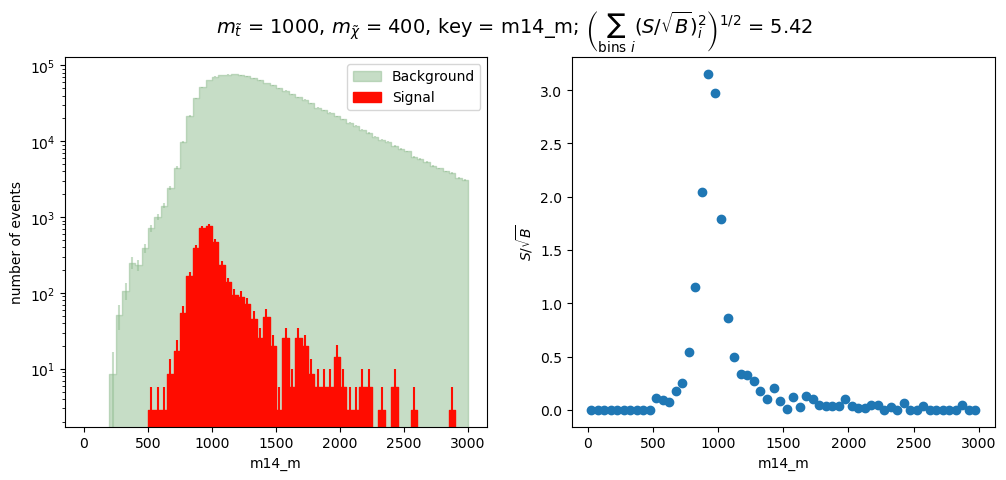

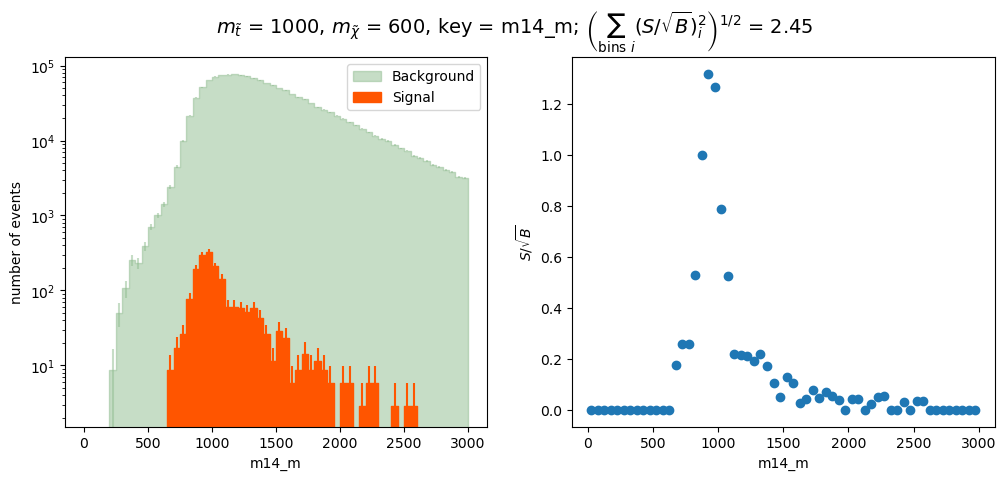

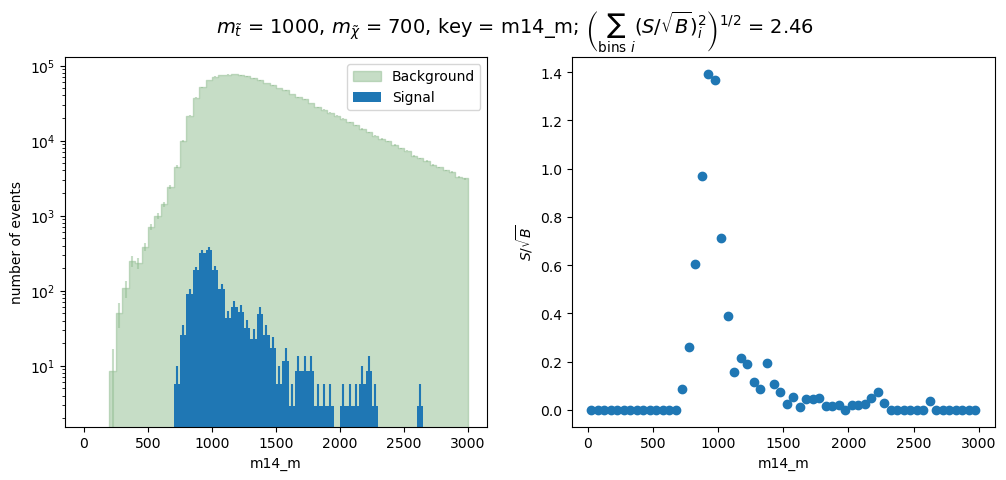

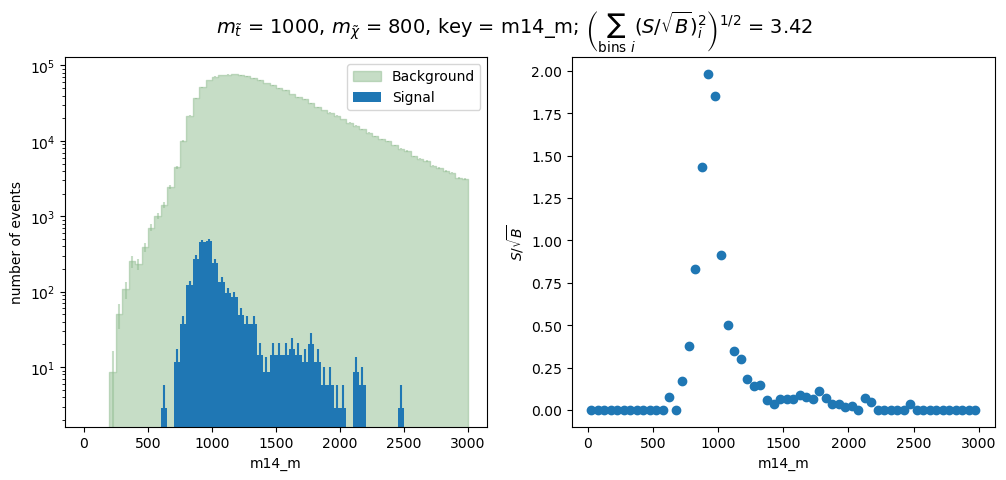

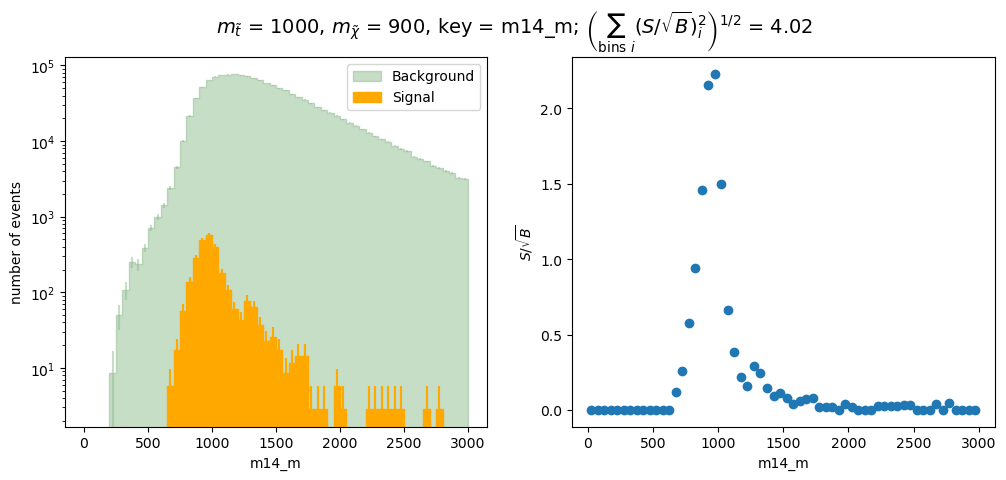

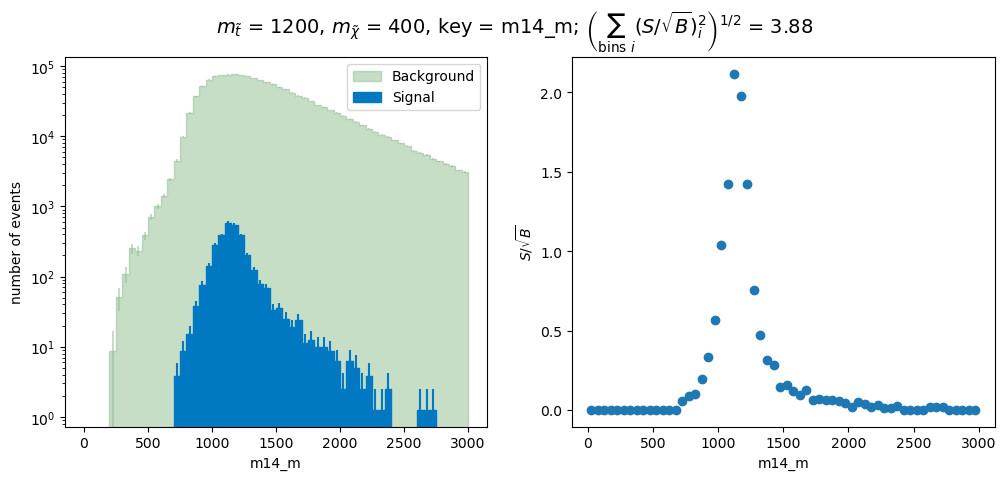

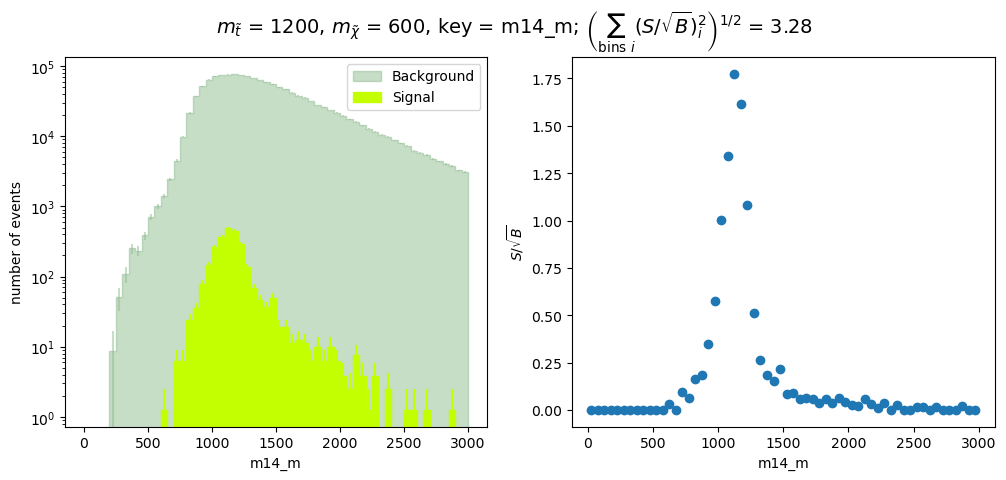

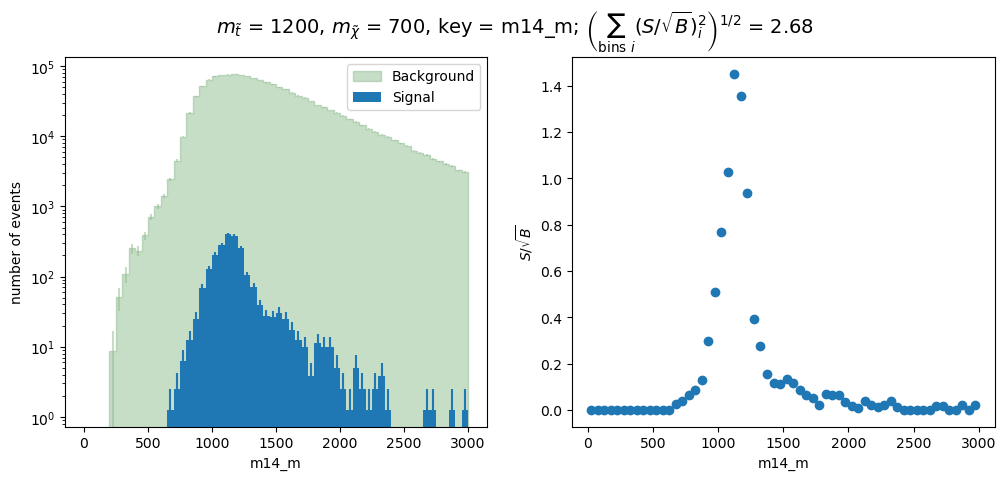

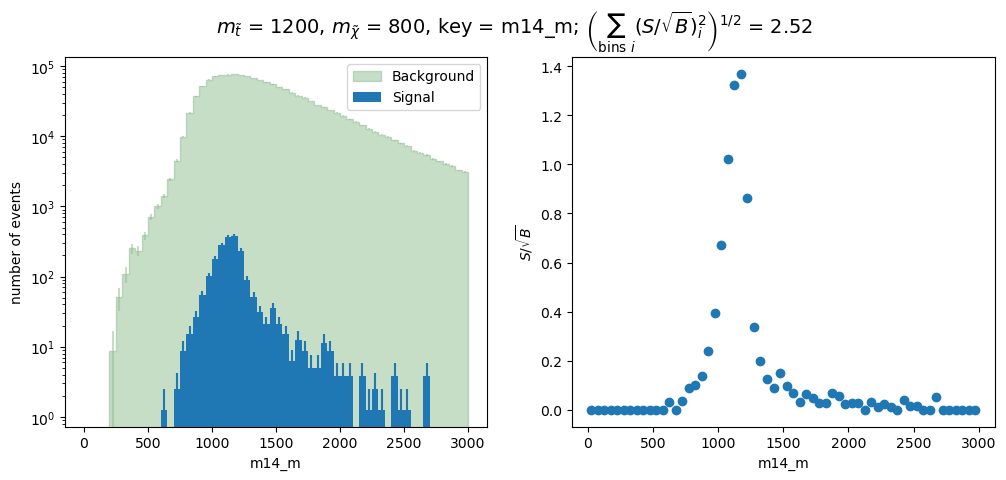

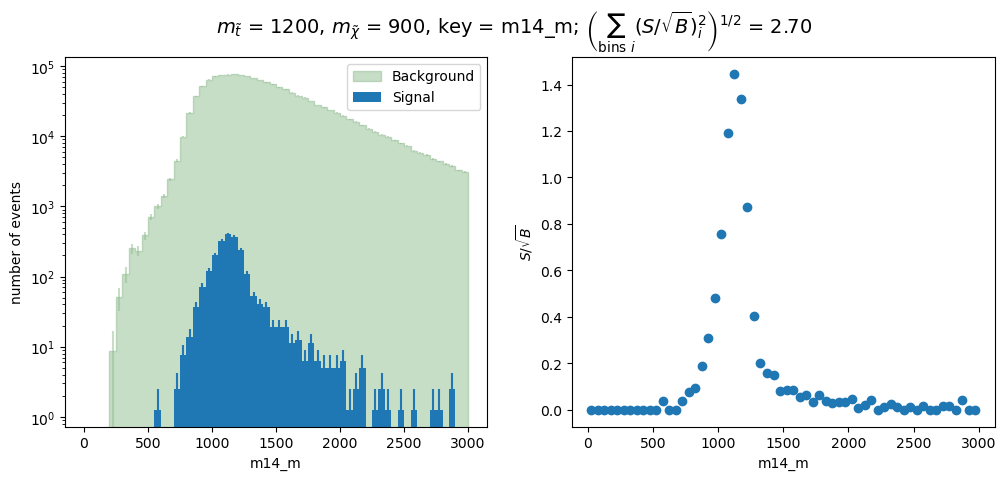

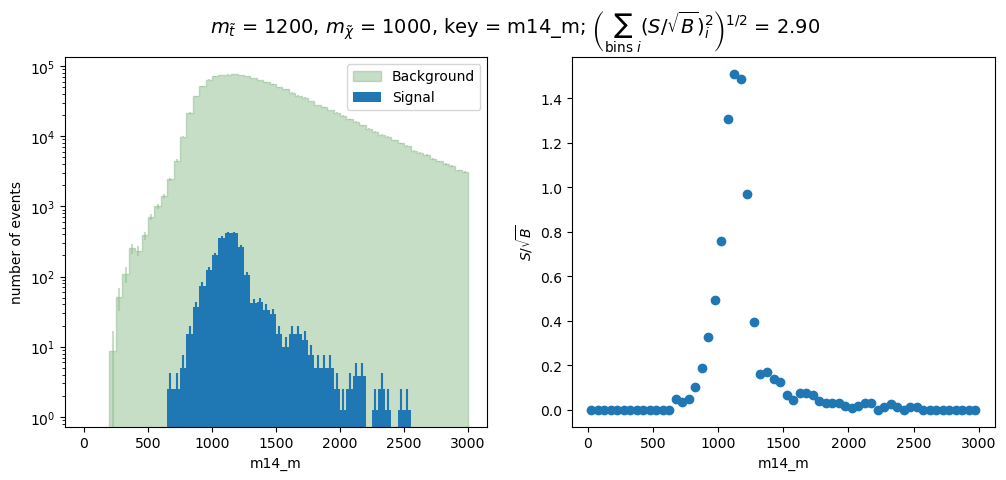

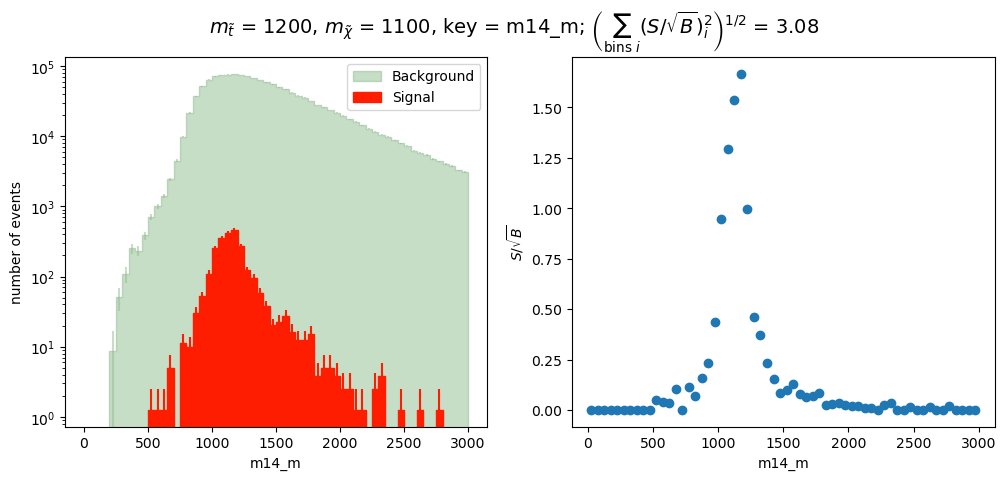

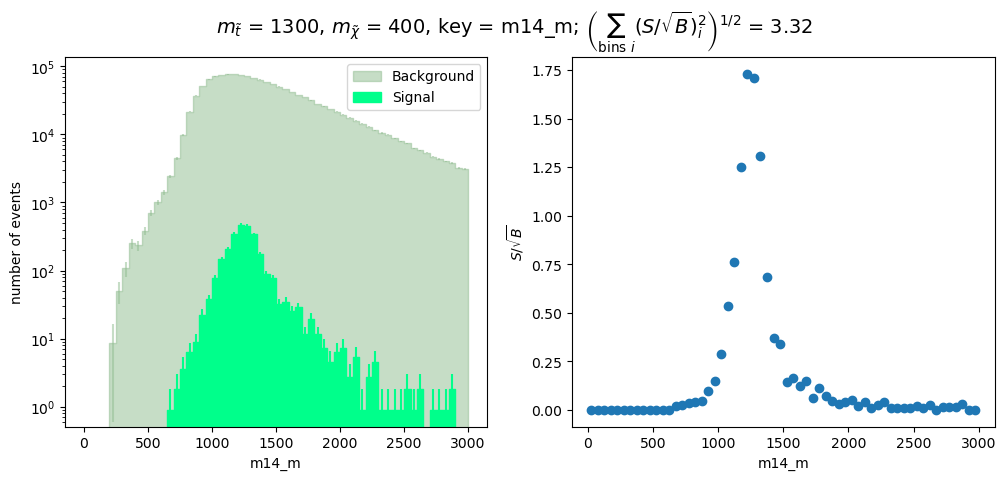

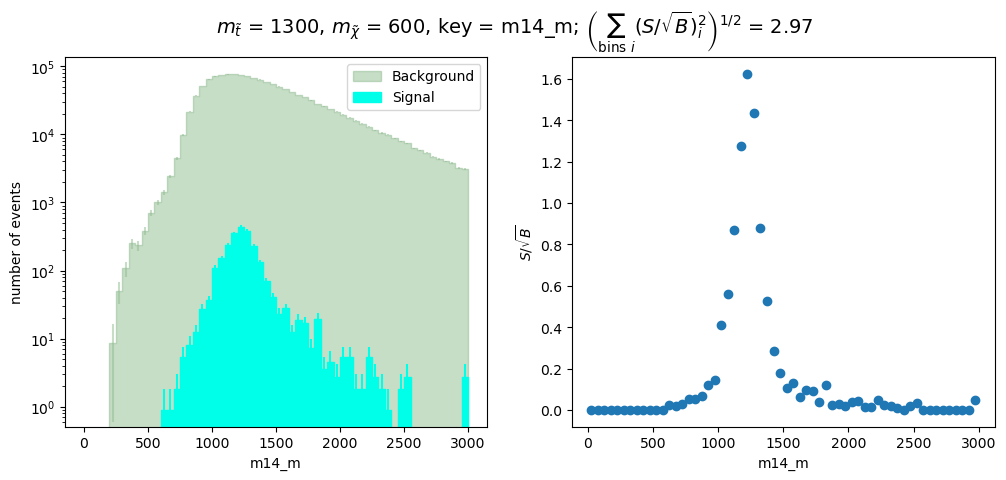

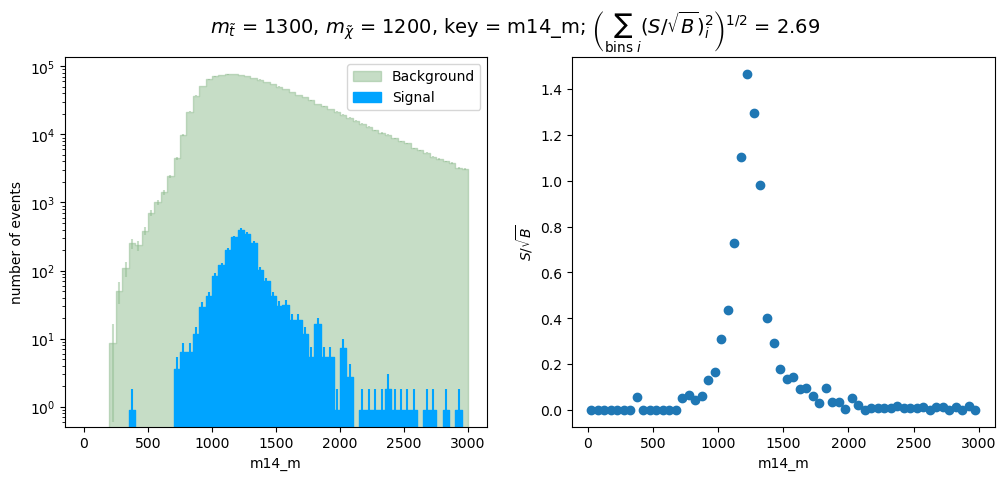

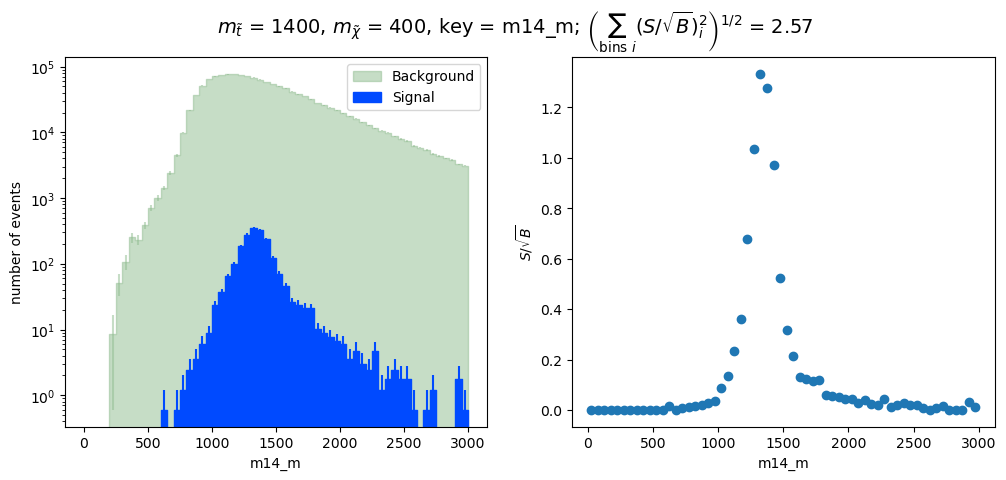

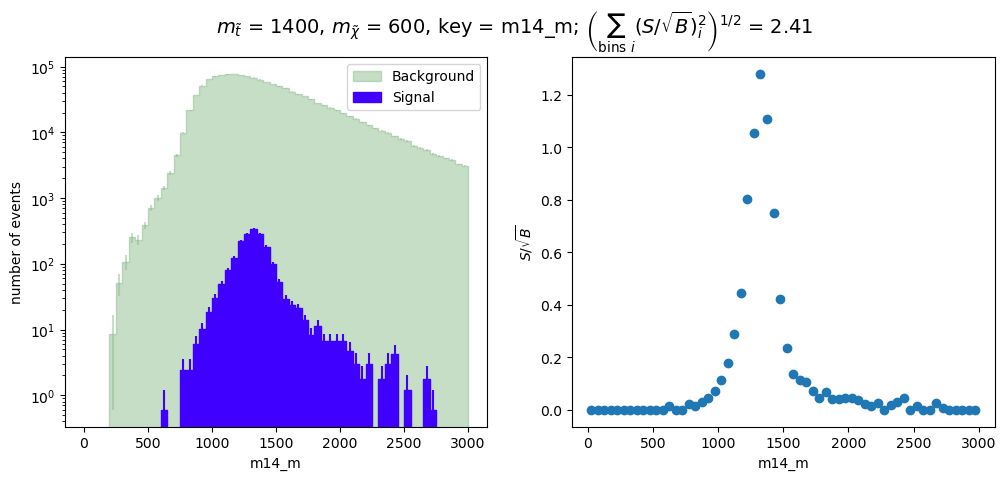

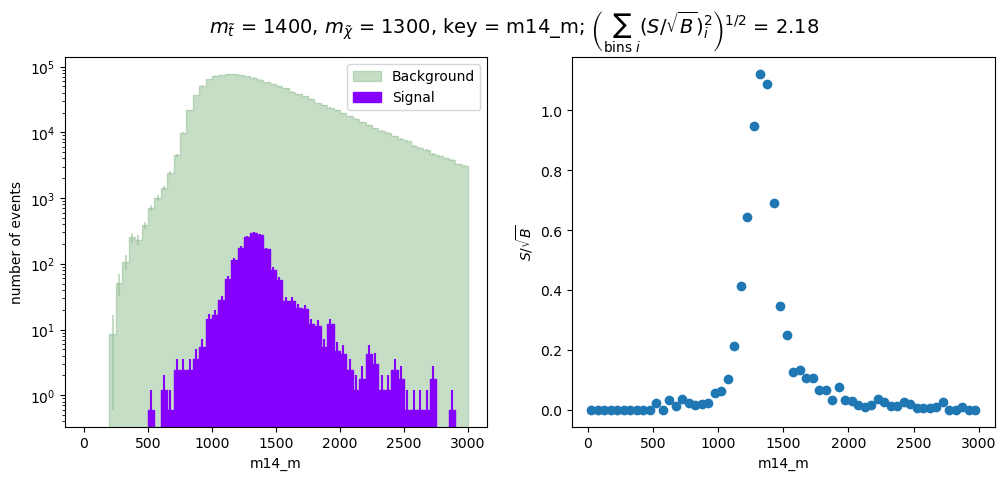

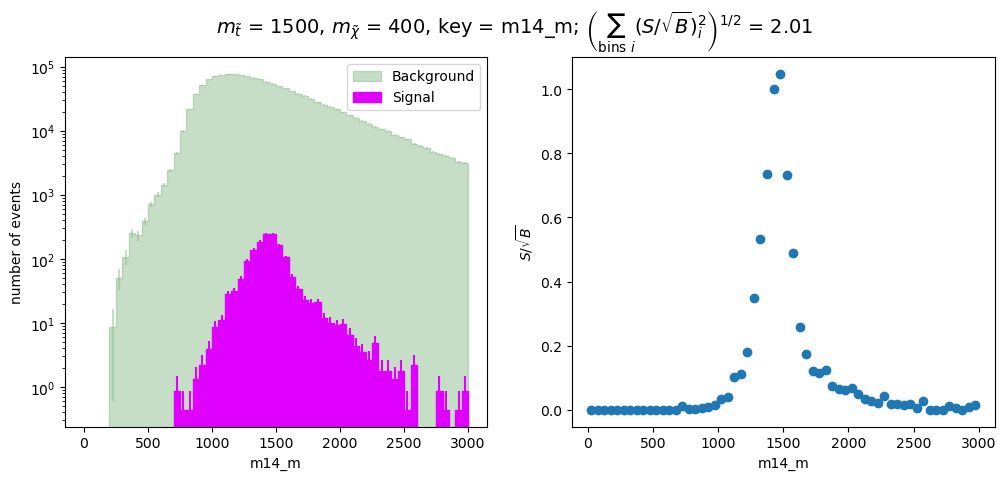

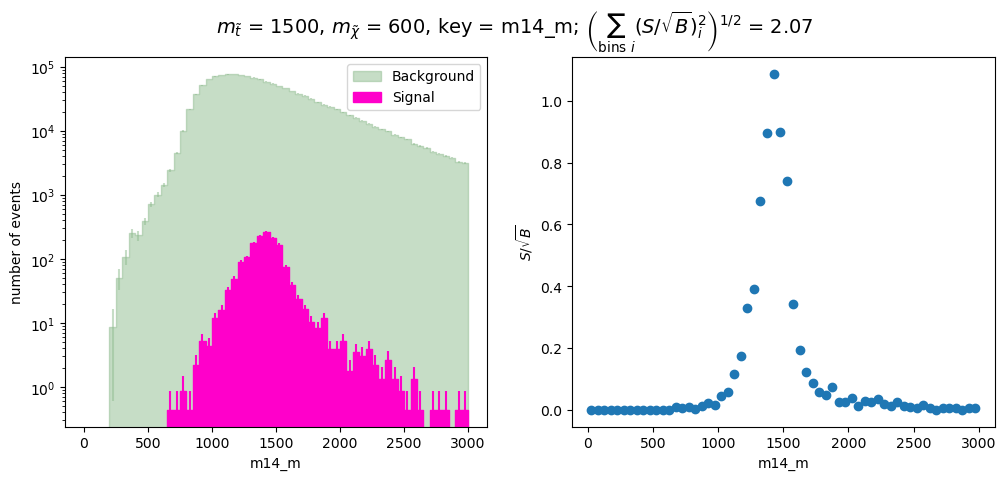

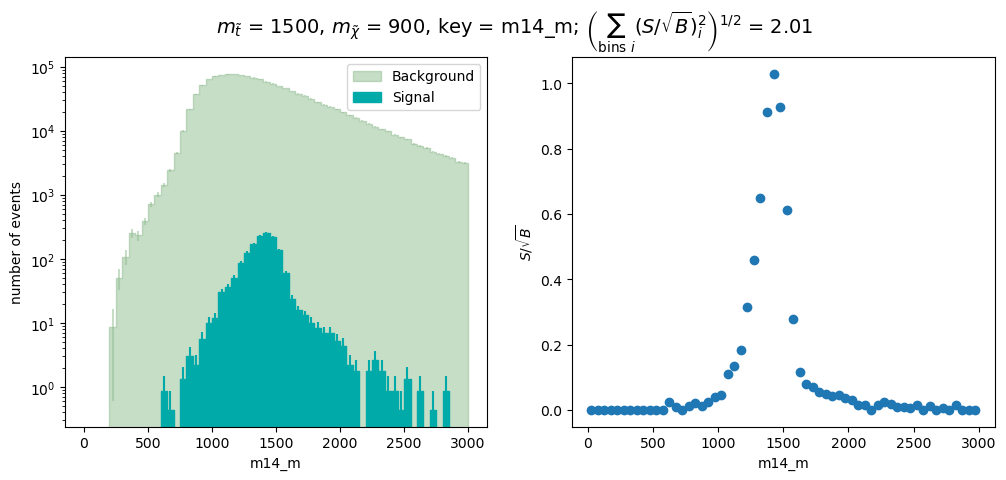

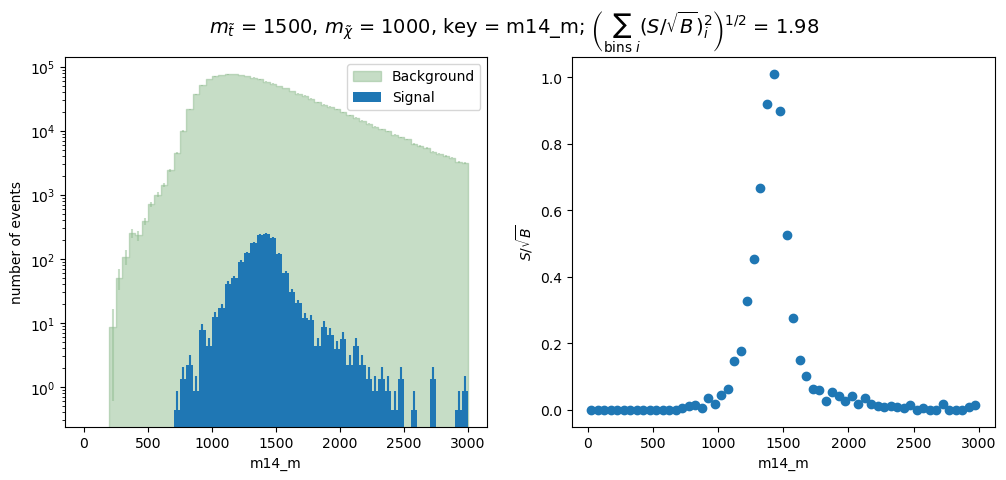

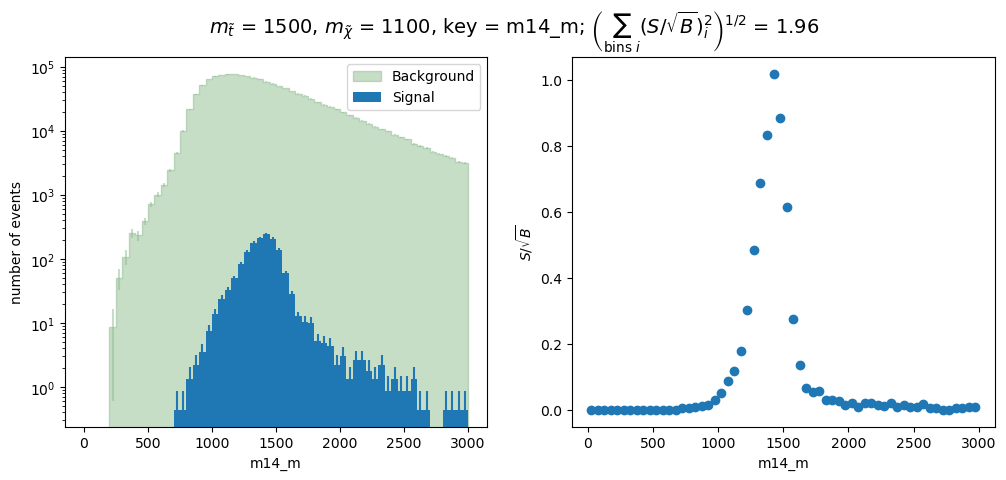

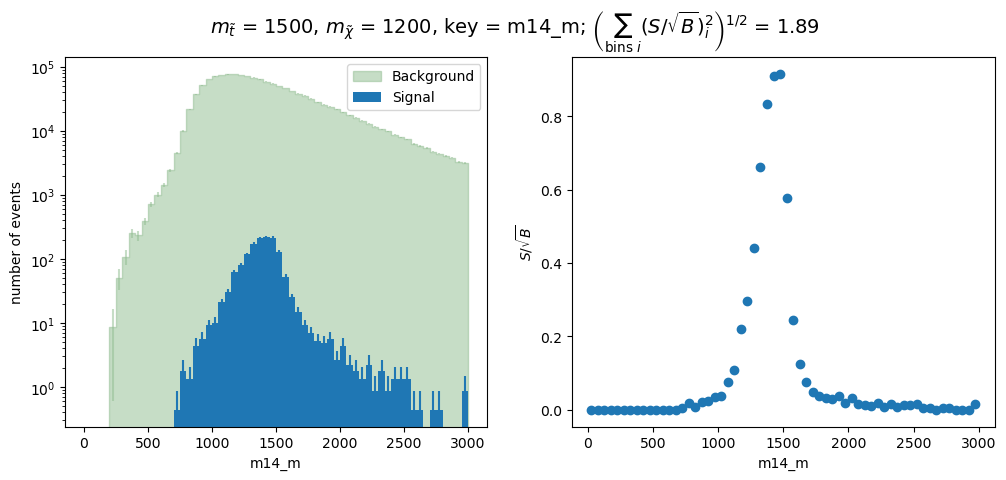

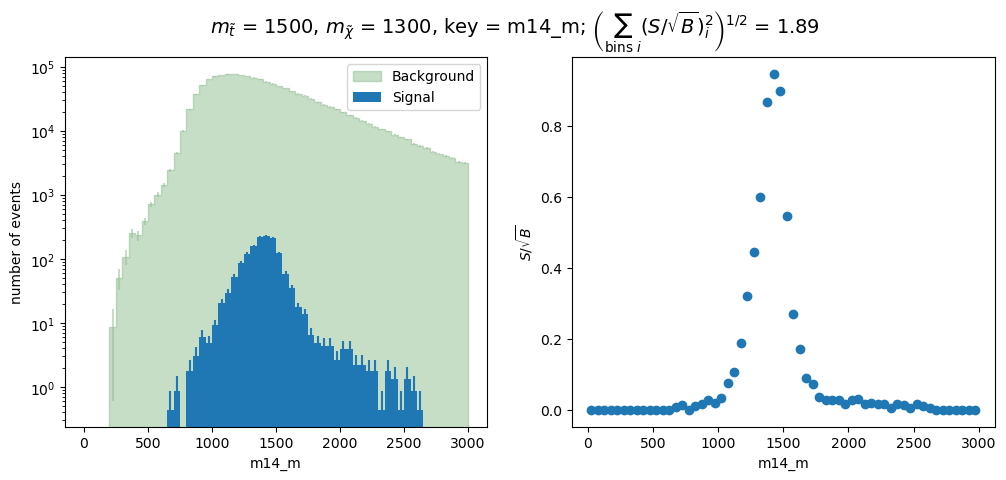

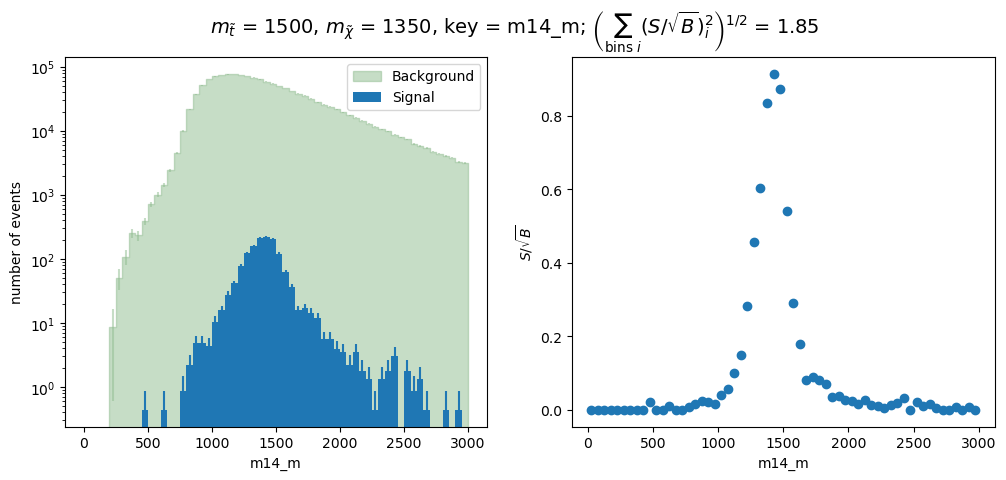

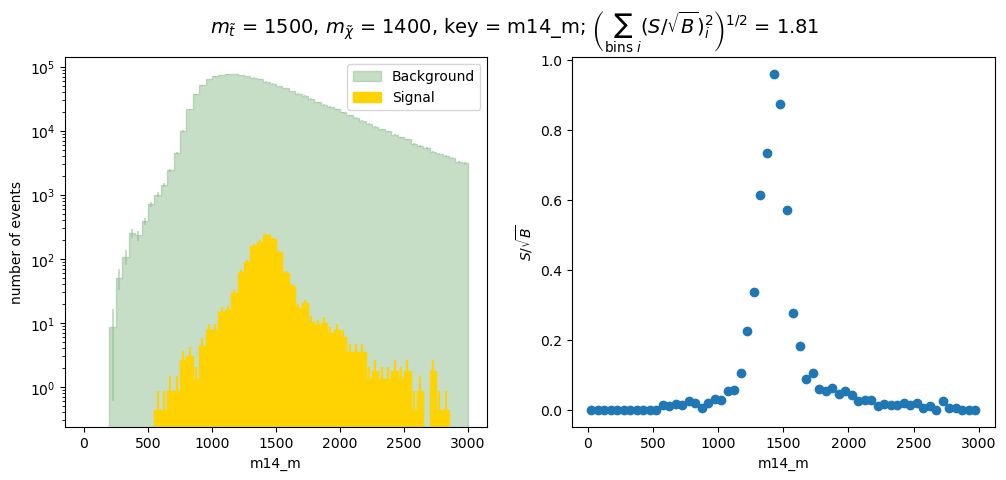

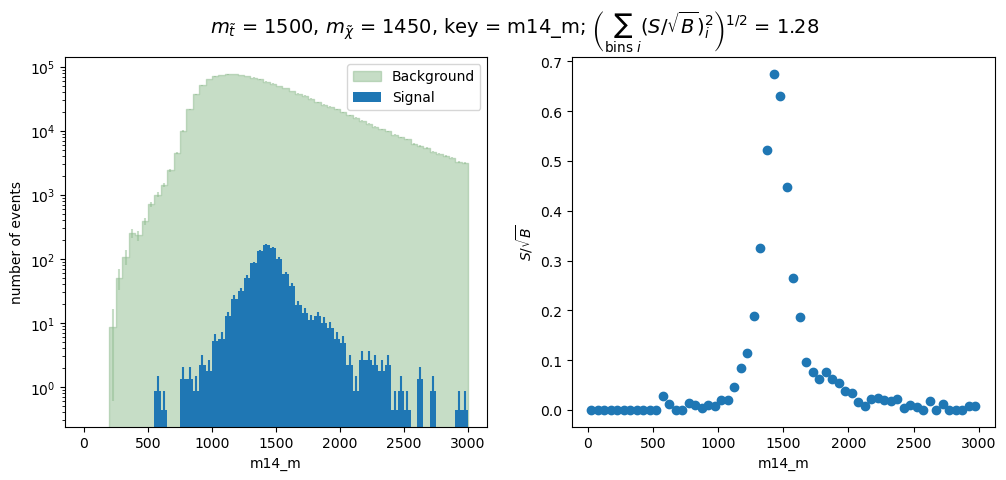

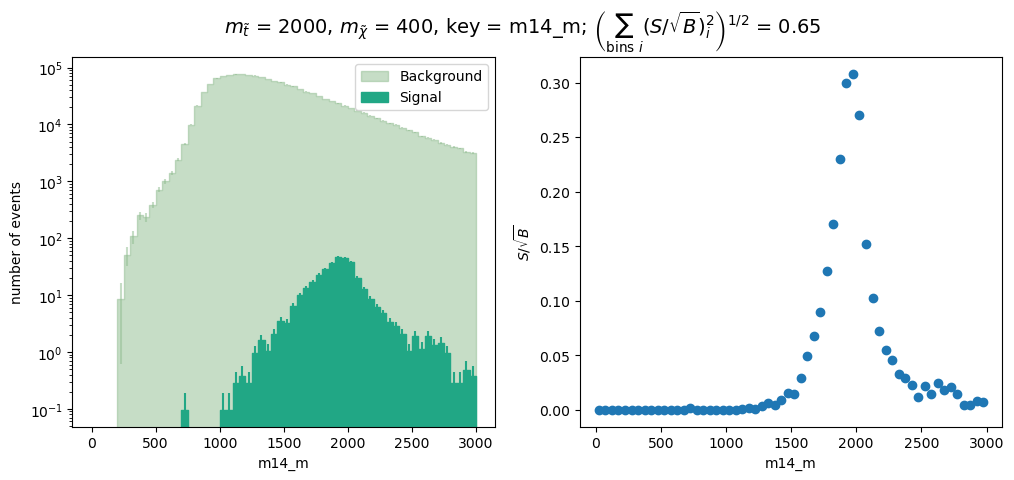

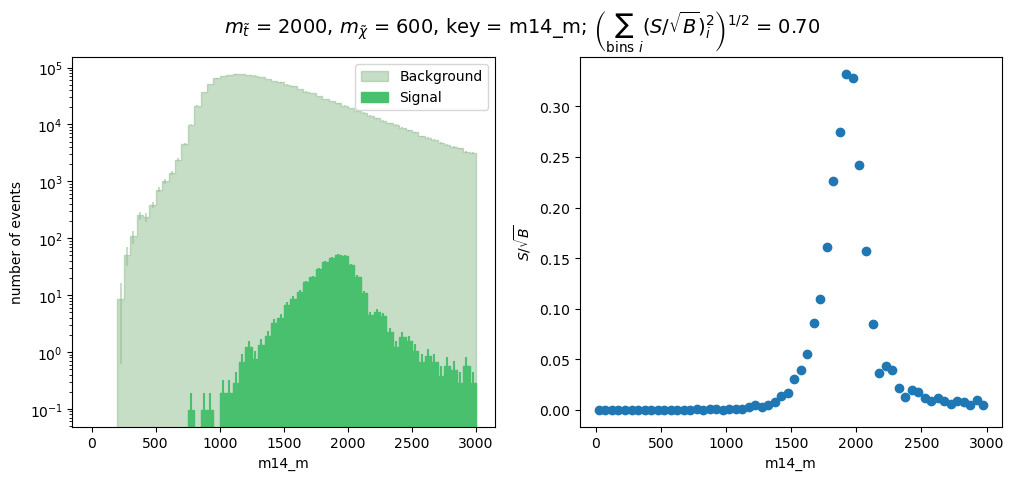

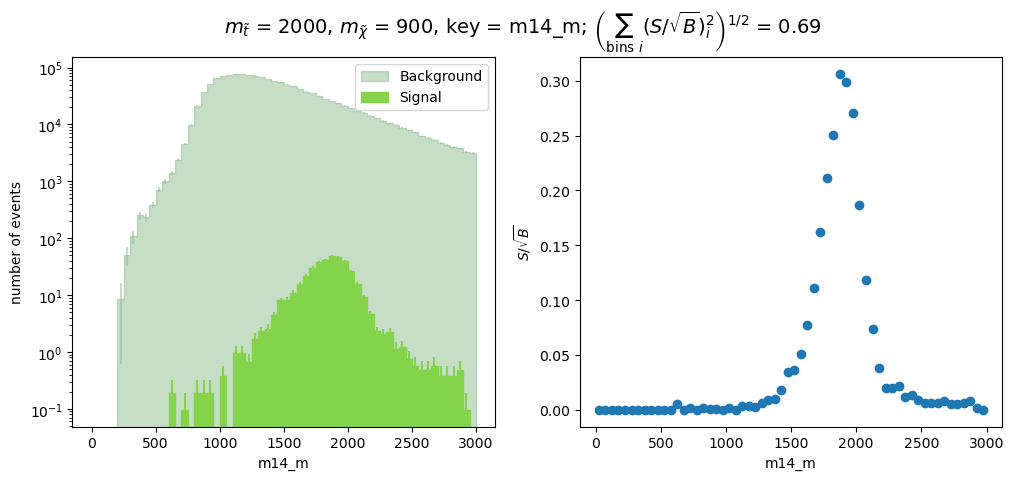

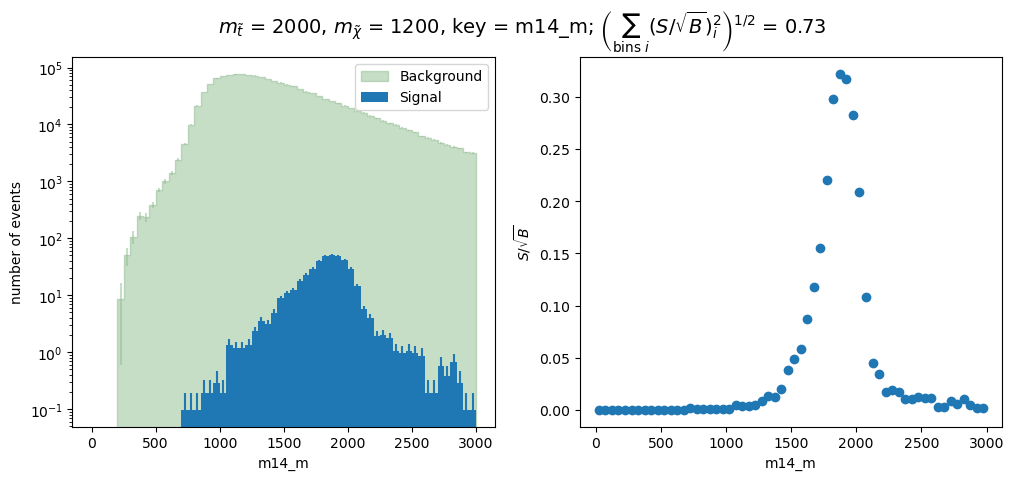

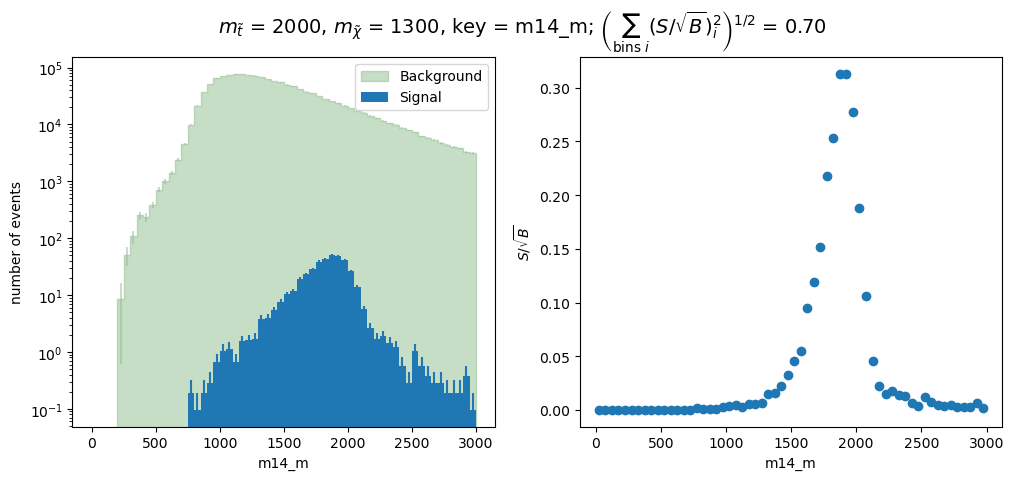

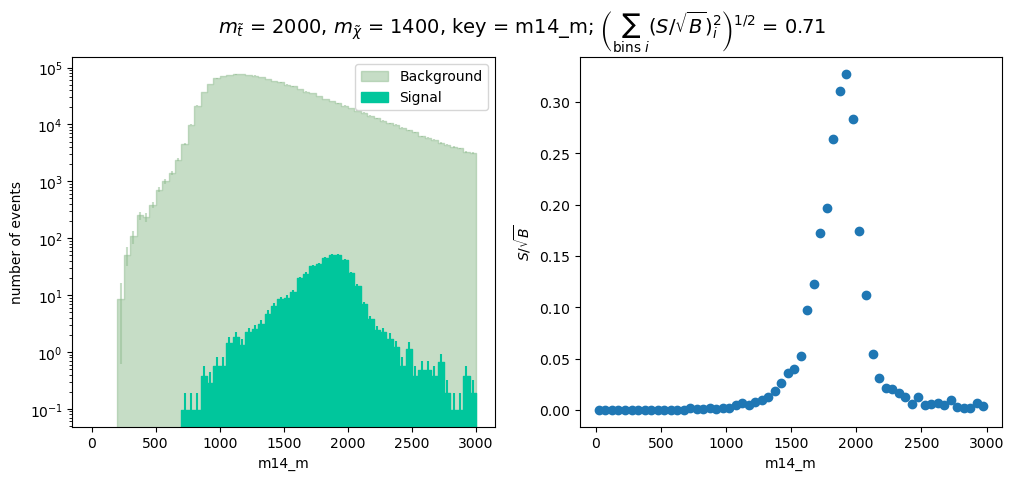

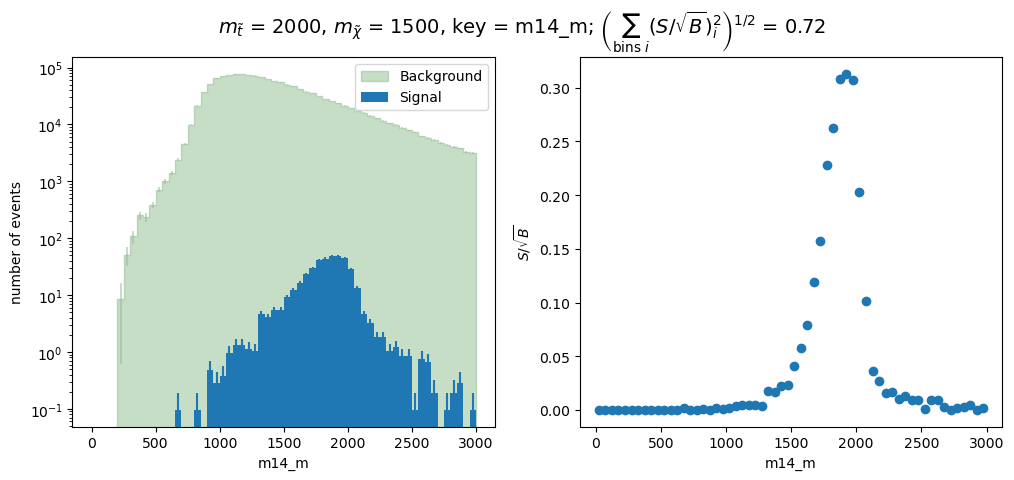

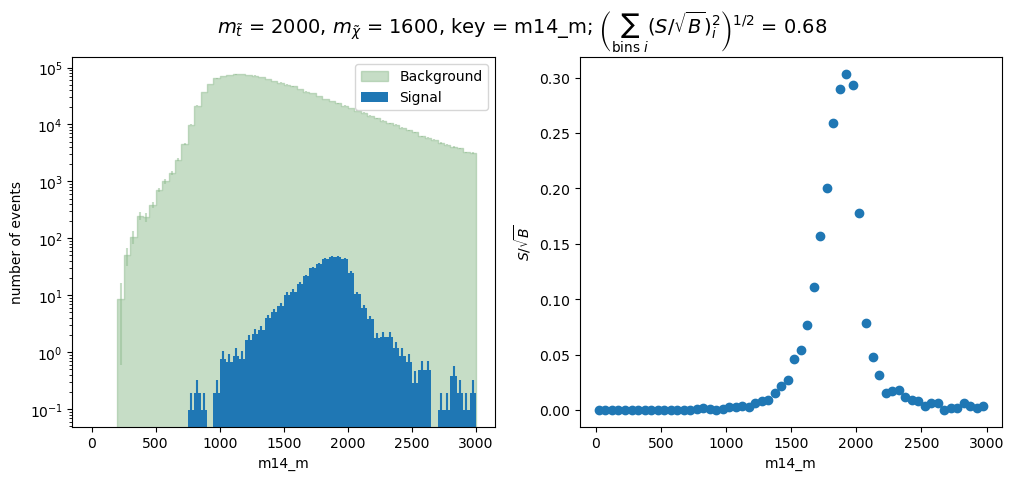

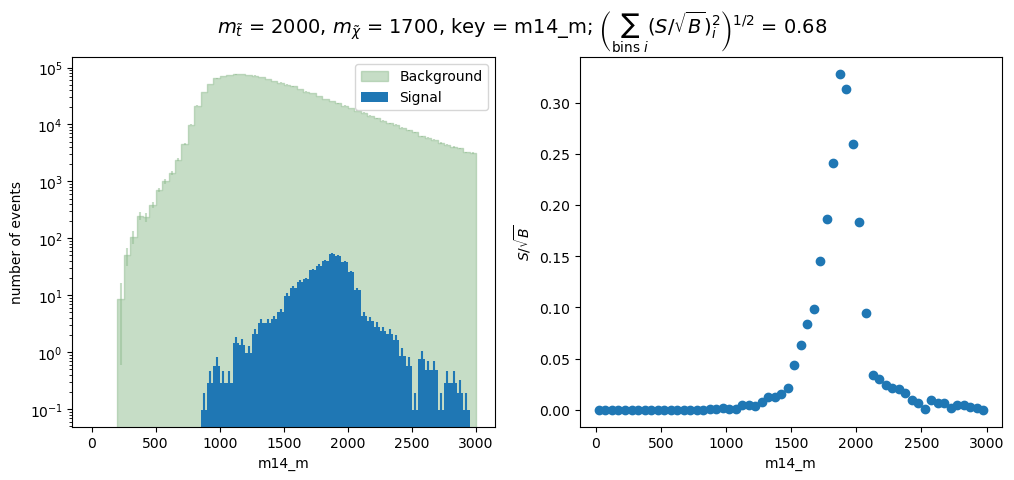

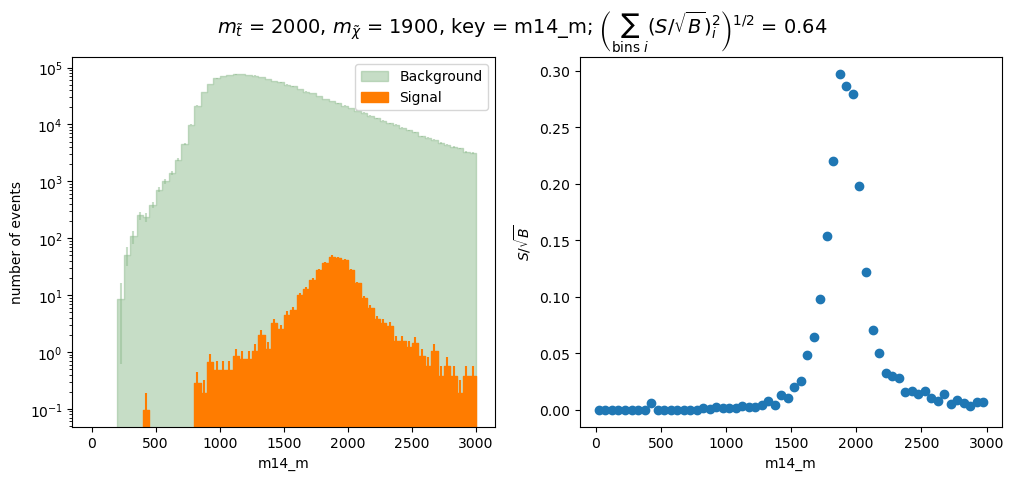

In [10]:
xvar = 'm14_m'
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])

    # if mchi/mtop >~ 0.7, we're in the compressed signal region
    s_over_root_b, bin_centers, points = pq.s_over_root_b(hists, bg_hists, xvar, true_mchi)

    m14_m_points.append([true_mtop, true_mchi, s_over_root_b])

    signal_style = s.getSet(signal).style
    signal_obj = PlotObject.fromHist(hists[xvar], style=signal_style, title='Signal')
    background_obj = PlotObject.fromHist(bg_hists[xvar], style=background_style, title='Background')

    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"$m_\\tilde{{t}}$ = {true_mtop}, $m_\\tilde{{\chi}}$ = {true_mchi}, key = {xvar}; $\left(\sum_{{\\text{{bins }} i}} (S/\sqrt{{B}})_i^2\\right)^{{1/2}}$ = {s_over_root_b:.2f}", fontsize=14)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale("log")
    ax[1].set_xlabel(xvar)
    ax[1].set_ylabel("$S/\sqrt{B}$")
    # ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    drawAs1DHist(ax[0], signal_obj)
    # ax[0].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, 1000, colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    # ax[1].vlines([max(0, true_mchi-window_width/2), true_mchi+window_width/2], 0, max(points), colors='orange', linestyles='dashed', label=f'$m_{{\\tilde{{\chi}}}} \pm {round(window_width/2)}$')
    ax[1].scatter(bin_centers, points)
    ax[0].legend()
    # ax[1].legend()
    # print(f"m_t = {true_mtop}, m_chi = {true_mchi}, s/sqrt(b) summed in quadrature around m_chi = {s_over_root_b}")


In [10]:
m13_m_points = np.array(m13_m_points)
m24_m_points = np.array(m24_m_points)
m3_top_3_no_lead_b_points = np.array(m3_top_3_no_lead_b_points)
m14_m_points = np.array(m14_m_points)

In [43]:
a.results['signal_312_1000_400']

DatasetRunResult(dataset_preprocessed=DatasetPreprocessed(dataset_input=AnalyzerInput(dataset_name='signal_312_1000_400', fill_name='signal_312_1000_400', coffea_dataset={'signal_312_1000_400': {'files': {'/local/cms/user/ckapsiak/SingleStop/datafiles/NANOAOD-ALL/NANOAOD-1000_400.root': 'Events'}}}, lumi_json=None), coffea_dataset_split={'files': {'/local/cms/user/ckapsiak/SingleStop/datafiles/NANOAOD-ALL/NANOAOD-1000_400.root': {'object_path': 'Events', 'steps': [[0, 10000]], 'num_entries': 10000, 'uuid': '9e859212-a430-11ed-90e6-6abde183beef'}}, 'form': None, 'metadata': None}), histograms={'m3_top_3_no_lead_b': Hist(Regular(60, 0, 3000, name='mass of jets 1-3 without leading b'), storage=Weight()) # Sum: WeightedSum(value=1230, variance=1230), 'm14_vs_m3_top_3_no_lead_b': Hist(
  Regular(60, 0, 3000, name='$m_{14}$'),
  Regular(60, 0, 3000, name='$m_{3 (no b)}$'),
  storage=Weight()) # Sum: WeightedSum(value=1228, variance=1228) (WeightedSum(value=1230, variance=1230) with flow), 'm

In [ ]:
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, None)
    m14_data, edges = hists["m14_m"].to_numpy()
    m13_data = hists["m13_m"]
    m24_data = hists["m24_m"].to_numpy()[0]
    m3_top_3_no_lead_b_data = hists["m3_top_3_no_lead_b"].to_numpy()[0]
    bin_centers = (edges[:-1] + edges[1:])/2

    hist2d = analyzer.H(f"m{p1_1+1}{p1_2}_vs_m{p2_1+1}{p2_2}", 
            [
                analyzer.makeAxis(
                    60, 0, 3000, "$m_{{14}}$", unit="GeV", append_name="1"
                ),
                analyzer.makeAxis(
                    60, 0, 3000, "$m_{{13}}$", unit="GeV", append_name="2"
                ),
            ],
            [a.events., masses[p2]],
            name="what"
        )

# m14_m13_hist_np = np.histogram2d(m14_data, m13_data, bins=100, range=[[0, 3000], [0, 3000]])

In [ ]:
h = (
    Hist.new.Reg(50, -5, 5, name="S", label="s [units]", flow=False)
    .Reg(50, -5, 5, name="W", label="w [units]", flow=False)
    .Double()
)

In [35]:
m13_data

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.09568,  0.     ,  0.     ,  0.     ,  0.     ,  0.09568,
        0.     ,  0.     ,  0.38272,  0.28704,  0.4784 ,  0.86112,
        0.66976,  0.86112,  1.05248,  1.4352 ,  1.33952,  2.00928,
        2.8704 ,  3.92288,  4.49696,  6.41056,  8.1328 , 10.0464 ,
       13.10816, 14.92608, 21.0496 , 24.20704, 31.096  , 39.99424,
       44.68256, 44.0128 , 31.19168, 15.21312,  7.08032,  2.48768,
        1.33952,  1.05248,  0.86112,  1.14816,  0.76544,  0.4784 ,
        0.9568 ,  0.28704,  0.19136,  0.09568,  0.19136,  0.38272,
        0.     ,  0.09568,  0.19136,  0.09568,  0.     ,  0.     ])

In [33]:
m14_m13_hist_np

(array([[54.,  2.,  0., ...,  0.,  0.,  0.],
        [ 1.,  3.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([   0.,   30.,   60.,   90.,  120.,  150.,  180.,  210.,  240.,
         270.,  300.,  330.,  360.,  390.,  420.,  450.,  480.,  510.,
         540.,  570.,  600.,  630.,  660.,  690.,  720.,  750.,  780.,
         810.,  840.,  870.,  900.,  930.,  960.,  990., 1020., 1050.,
        1080., 1110., 1140., 1170., 1200., 1230., 1260., 1290., 1320.,
        1350., 1380., 1410., 1440., 1470., 1500., 1530., 1560., 1590.,
        1620., 1650., 1680., 1710., 1740., 1770., 1800., 1830., 1860.,
        1890., 1920., 1950., 1980., 2010., 2040., 2070., 2100., 2130.,
        2160., 2190., 2220., 2250., 2280., 2310., 2340., 2370., 2400.,
        2430., 2460., 2490., 2520., 2550., 2580., 2610., 2640., 2670.,
     

In [ ]:
PlotObject()

In [26]:
m14_m13_hist_hist = PlotObject.fromNumpy(m14_m13_hist_np)

In [30]:
m14_m13_hist_hist.axes

(Axis([[0.],[3000.]], bins=100, title="None" ),)

ValueError: not enough values to unpack (expected 2, got 1)

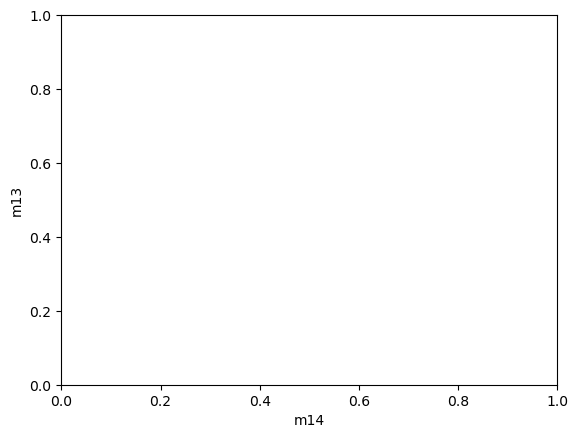

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel("m14")
ax.set_ylabel("m13")
# ax.set_title("Scatter plot of S/sqrt(B)")
drawAs2DHist(ax, m14_m13_hist_hist)

In [12]:
m14_m13_hist = np.histogram2d(m14_m_points[0], m13_m_points, bins=100, range=[0, 3000])

ValueError: too many values to unpack (expected 2)

In [11]:
m13_m_good_points = m13_m_points[m13_m_points[:, 2] >= 1]
m13_m_bad_points = m13_m_points[m13_m_points[:, 2] < 1]
m24_m_good_points = m24_m_points[m24_m_points[:, 2] >= 1]
m24_m_bad_points = m24_m_points[m24_m_points[:, 2] < 1]
m3_top_3_no_lead_b_good_points = m3_top_3_no_lead_b_points[m24_m_points[:, 2] >= 1]
m3_top_3_no_lead_b_bad_points = m3_top_3_no_lead_b_points[m24_m_points[:, 2] < 1]

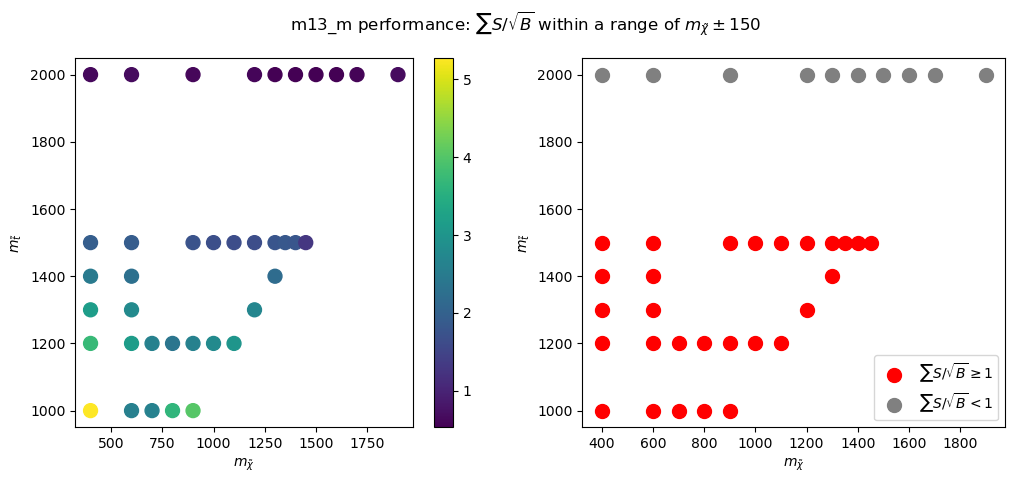

In [12]:
fig, ax = plt.subplots(1,2)
scatterplot = ax[0].scatter(m13_m_points[:, 1], m13_m_points[:, 0], c=[m13_m_points[:, 2]], s=100)
fig.set_figwidth(12)

ax[1].scatter(m13_m_good_points[:, 1], m13_m_good_points[:, 0], c='red', s=100, label='$\sum S/\sqrt{{B}} \\geq 1$')
ax[1].scatter(m13_m_bad_points[:, 1], m13_m_bad_points[:, 0], c='gray', s=100, label='$\sum S/\sqrt{{B}} < 1$')

plt.set_cmap("Reds")
plt.colorbar(scatterplot)
fig.suptitle(f"m13_m performance: $\sum S/\sqrt{{B}}$ within a range of $m_\\tilde{{\chi}} \\pm {window_width//2}$")
ax[0].set_xlabel("$m_\\tilde{{\chi}}$")
ax[0].set_ylabel("$m_\\tilde{{t}}$")
ax[1].set_xlabel("$m_\\tilde{{\chi}}$")
ax[1].set_ylabel("$m_\\tilde{{t}}$")
ax[1].legend()
plt.show()

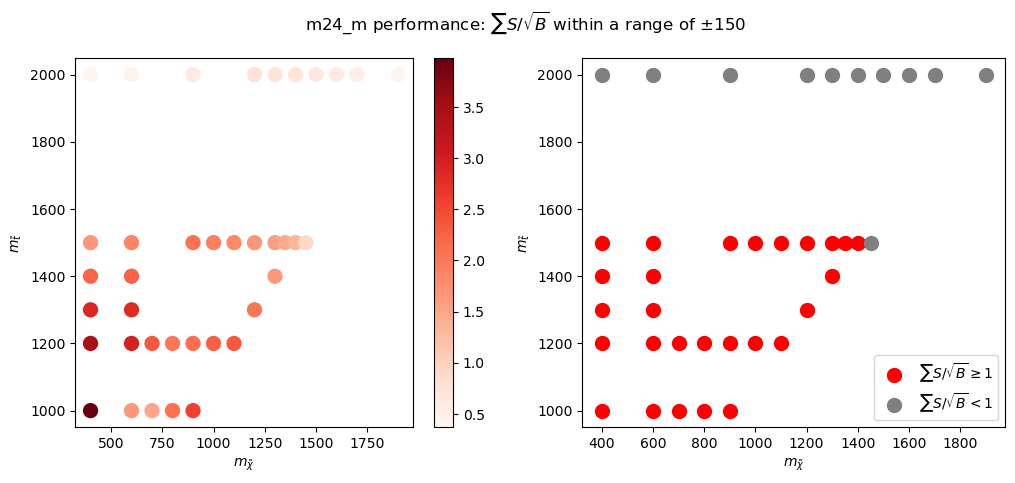

In [15]:
fig, ax = plt.subplots(1,2)
scatterplot = ax[0].scatter(m24_m_points[:, 1], m24_m_points[:, 0], c=[m24_m_points[:, 2]], s=100)
fig.set_figwidth(12)

ax[1].scatter(m24_m_good_points[:, 1], m24_m_good_points[:, 0], c='red', s=100, label='$\sum S/\sqrt{{B}} \\geq 1$')
ax[1].scatter(m24_m_bad_points[:, 1], m24_m_bad_points[:, 0], c='gray', s=100, label='$\sum S/\sqrt{{B}} < 1$')

plt.set_cmap("Reds")
plt.colorbar(scatterplot)
fig.suptitle(f"m24_m performance: $\sum S/\sqrt{{B}}$ within a range of $\\pm {window_width//2}$")
ax[0].set_xlabel("$m_\\tilde{{\chi}}$")
ax[0].set_ylabel("$m_\\tilde{{t}}$")
ax[1].set_xlabel("$m_\\tilde{{\chi}}$")
ax[1].set_ylabel("$m_\\tilde{{t}}$")
ax[1].legend()
plt.show()

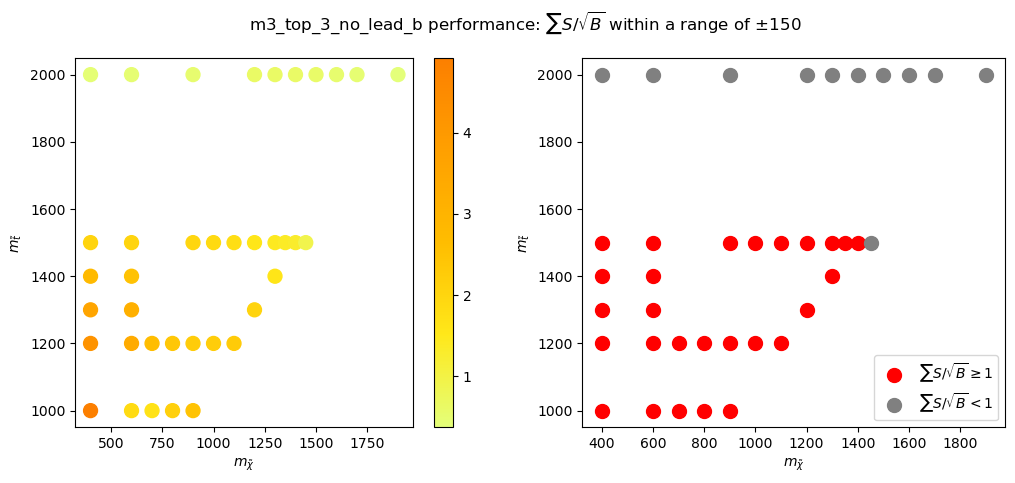

In [29]:
fig, ax = plt.subplots(1,2)
scatterplot = ax[0].scatter(m3_top_3_no_lead_b_points[:, 1], m3_top_3_no_lead_b_points[:, 0], c=[m3_top_3_no_lead_b_points[:, 2]], s=100)
fig.set_figwidth(12)

ax[1].scatter(m3_top_3_no_lead_b_good_points[:, 1], m3_top_3_no_lead_b_good_points[:, 0], c='red', s=100, label='$\sum S/\sqrt{{B}} \\geq 1$')
ax[1].scatter(m3_top_3_no_lead_b_bad_points[:, 1], m3_top_3_no_lead_b_bad_points[:, 0], c='gray', s=100, label='$\sum S/\sqrt{{B}} < 1$')

plt.set_cmap("Reds")
plt.colorbar(scatterplot)
fig.suptitle(f"m3_top_3_no_lead_b performance: $\sum S/\sqrt{{B}}$ within a range of $\\pm {window_width//2}$")
ax[0].set_xlabel("$m_\\tilde{{\chi}}$")
ax[0].set_ylabel("$m_\\tilde{{t}}$")
ax[1].set_xlabel("$m_\\tilde{{\chi}}$")
ax[1].set_ylabel("$m_\\tilde{{t}}$")
ax[1].legend()
plt.show()

<Figure size 640x480 with 0 Axes>

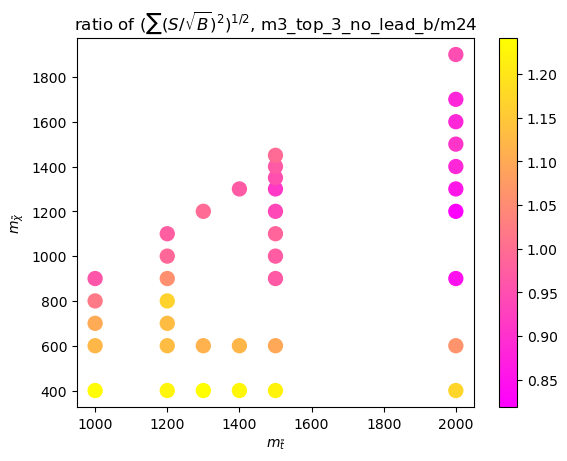

In [33]:
plt.set_cmap("spring")

fig, ax = plt.subplots()
scatterplot = ax.scatter( m3_top_3_no_lead_b_points[:, 0], m3_top_3_no_lead_b_points[:, 1], c=[m3_top_3_no_lead_b_points[:, 2]/m24_m_points[:, 2]], s=100)

plt.colorbar(scatterplot)
ax.set_title(f"ratio of $(\sum (S/\sqrt{{B}})^2)^{{1/2}}$, m3_top_3_no_lead_b/m24")
ax.set_xlabel("$m_\\tilde{{t}}$")
ax.set_ylabel("$m_\\tilde{{\chi}}$")
plt.show()